https://www.kaggle.com/code/neomatrix369/everything-you-can-do-with-a-time-series-stocks

# Credits

**This notebook is a fork of [the original notebook](https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series), hence all credits to the original author ([SIDDHARTH YADAV ](https://www.kaggle.com/thebrownviking20/) aka [@thebrownviking20](https://www.kaggle.com/thebrownviking20/)). Hence most of the content from the original author is preserved and in the same person as that written originally - great work and an inspiration to all.**

# Why this notebook

I noticed a few opportunities to improve the content and hence I'm forking it with the improvisations. A summary of the changes you will notice in this notebook as compared to [the original one]((https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series):
- Using stocks data for all the examples, instead of a mix of stocks and humidity/pressure data
- Showing this using stocks like [ORCL](https://finance.yahoo.com/quote/ORCL/) and [AAPL](https://finance.yahoo.com/quote/AAPL)
- Using an additional stocks dataset
- Made the comparisons between the two stocks uniform across the notebook
- Minor tweaks to fix data and visualisation issues
- Notebook updated regularly to reflect latest prices of the stocks

# Related notebooks

- **[The original notebook](https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series)**
- **[Everything you can do with a time series (cryptos)](https://www.kaggle.com/neomatrix369/everything-you-can-do-with-a-time-series-cryptos)**
- **[Everything you can do with a time series (metals)](https://www.kaggle.com/neomatrix369/everything-you-can-do-with-a-time-series-metals)**

# Aim
Since my first week on this platform, I have been fascinated by the topic of **time series analysis.** This kernel is prepared to be a container of many broad topics in the field of time series analysis. My motive is to make this the ultimate reference to time series analysis for beginners and experienced people alike.

# Some important things
1. This kernel **is a work in progress so every time you see on your home feed and open it, you will surely find fresh content.**
2. I am doing this only after completing various courses in this field. I continue to study more advanced concepts to provide more knowledge and content.
3. If there is any suggestion or any specific topic you would like me to cover, kindly mention that in the comments.
4. **If you like my work, be sure to upvote** (press the like button) this kernel so it looks more relevant and meaningful to the community.

In [1]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

from datetime import datetime, timedelta

rcParams['figure.figsize'] = 11, 9

print(os.listdir("../input"))

['the-winton-stock-market-challenge', 'price-volume-data-for-all-us-stocks-etfs', 'stock-time-series-20050101-to-20171231', 'g-research-crypto-forecasting']


This code imports various libraries that will be used in a data analysis project. Imported libraries include:


OS: allows access to operating system-dependent functionality, such as reading and writing files

Code execution may result in warnings, which can be ignored

Numpy is used for numerical computations and array manipulation

Analyzing and manipulating data with Pandas

Data visualization using Matplotlib

Pylab provides an interface to matplotlib and numpy in a single namespace, mainly used to plot data

Using plotly, you can create interactive and dynamic visualizations

Time series data are modeled and analyzed with statsmodels

Numpy does not include mathematical functions

Also, the code configures the plot size and style parameters. The last step is to print the list of files in the directory "../input".

In [2]:
%%bash
# https://pypi.org/project/yahoofinancials/
pip install yahoofinancials

  Running setup.py bdist_wheel for yahoofinancials: started
  Running setup.py bdist_wheel for yahoofinancials: finished with status 'done'
  Stored in directory: /root/.cache/pip/wheels/b5/ca/00/1d609947b70b1cb533d66439a49e6fca62f01964a74f1fcdc1
Successfully built yahoofinancials
  Found existing installation: requests 2.18.4
    Uninstalling requests-2.18.4:
      Successfully uninstalled requests-2.18.4


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
mxnet 1.3.0.post0 has requirement numpy<1.15.0,>=1.8.2, but you'll have numpy 1.15.1 which is incompatible.
mxnet 1.3.0.post0 has requirement requests<2.19.0,>=2.18.4, but you'll have requests 2.27.1 which is incompatible.
kmodes 0.9 has requirement scikit-learn<0.20.0,>=0.19.0, but you'll have scikit-learn 0.21.dev0 which is incompatible.
kmeans-smote 0.1.0 has requirement imbalanced-learn<0.4,>=0.3.1, but you'll have imbalanced-learn 0.4.0.dev0 which is incompatible.
kmeans-smote 0.1.0 has requirement numpy<1.15,>=1.13, but you'll have numpy 1.15.1 which is incompatible.
kmeans-smote 0.1.0 has requirement scikit-learn<0.20,>=0.19.0, but you'll have scikit-learn 0.21.dev0 which is incompatible.
keras 2.2.2 has requirement keras-applications==1.0.4, but you'll have keras-applications 1.0.5 which is incompatible.
keras 2.2.2 has requirement keras-preprocessing==1.0.2, but you'll have keras-preprocessing 1.0.3 which is in

The code is written in Jupyter Notebook or Google Colaboratory cell using the "bash" kernel. The Python package "yahoofinancials" is installed from the Python Package Index (PyPI) using the pip command.

yahoofinancials is a Python wrapper around the Yahoo Finance API that provides a simple interface for retrieving stock prices and other financial data.

It installs the "yahoofinancials" package in the current Python environment, making it available for use in subsequent code cells.

In [3]:
from yahoofinancials import YahooFinancials
from joblib import Memory

TMPDIR = '/tmp'
memory = Memory(TMPDIR, verbose=0)

The code imports the YahooFinancials class from the yahoofinancials package and the Memory class from the joblib package.

YahooFinancials provides a simple interface for fetching stock prices and other financial data from Yahoo Finance using a Python wrapper around the Yahoo Finance API. A YahooFinancials instance is created, which can then be used to fetch financial data for a particular stock or set of stocks.

A function call's results are cached using the Memory class from the joblib package. It is used to cache the results of YahooFinancials API requests, which can be time-consuming and resource-intensive. Memory is initialized with a temporary directory path (TMPDIR) where the cached results will be stored.

With caching, subsequent calls to the same YahooFinancials API request can be fetched from the cache instead of making a new request.

In [4]:
@memory.cache
def get_ticker_data(ticker: str, param_start_date, param_end_date) -> dict:
    raw_data = YahooFinancials(ticker)
    return raw_data.get_historical_price_data(param_start_date, param_end_date, "daily").copy()

def fetch_ticker_data(ticker: str, start_date, end_date) -> pd.DataFrame:
    date_range = pd.bdate_range(start=start_date, end=end_date)
    values = pd.DataFrame({'Date': date_range})
    values['Date'] = pd.to_datetime(values['Date'])
    raw_data = get_ticker_data(ticker, start_date, end_date)
    return pd.DataFrame(raw_data[ticker]["prices"])[['date', 'open', 'high', 'low', 'adjclose', 'volume']]    

Using Yahoo Finance API, this code retrieves historical stock ticker data from a stock ticker symbol and converts it into a Pandas DataFrame using two functions, get_ticker_data() and fetch_ticker_data().

There are three arguments to the get_ticker_data() function:

A string that represents the ticker symbol of the stock to be fetched
Parameter_start_date: a string representing the data's start date in "YYYY-MM-DD" format
The parameter_end_date represents the end date in "YYYY-MM-DD" format for the data to be retrieved
First, the function creates an instance of the YahooFinancials class with the given ticker symbol. To get historical price data for the given ticker symbol, it calls the get_historical_price_data() method on this object. As a Python dictionary, the function returns the price data.

Three arguments are passed to fetch_ticker_data():

Stock ticker symbol: a string representing the stock ticker symbol
Start_date: a string representing the start date in "YYYY-MM-DD" format for the data to be fetched
The end date for the data to be retrieved must be represented in the format "YYYY-MM-DD"
Using the pd.bdate_range() method, the function generates a list of business dates between the start_date and end_date arguments. A Pandas DataFrame is then created with the Date column containing the date range. In order to retrieve historical price data for a ticker symbol and date range, the get_ticker_data() function is called. From the fetched data, the function creates a new DataFrame with the relevant columns.

@memory.cache caches the results of the get_ticker_data() function, reducing API calls and improving performance. Instead of making a new API request if the function is called again with the same arguments, the decorator returns the cached result.

- <a href='#1'>1. Introduction to date and time</a>
    - <a href='#1.1'>1.1 Importing time series data</a>
    - <a href='#1.2'>1.2 Cleaning and preparing time series data</a>
    - <a href='#1.3'>1.3 Visualizing the datasets</a>
    - <a href='#1.4'>1.4 Timestamps and Periods</a>
    - <a href='#1.5'>1.5 Using date_range</a>
    - <a href='#1.6'>1.6 Using to_datetime</a>
    - <a href='#1.7'>1.7 Shifting and lags</a>
    - <a href='#1.8'>1.8 Resampling</a>
- <a href='#2'>2. Finance and Statistics</a>
    - <a href='#2.1'>2.1 Percent change</a>
    - <a href='#2.2'>2.2 Stock returns</a>
    - <a href='#2.3'>2.3 Absolute change in successive rows</a>
    - <a href='#2.4'>2.4 Comparing two or more time series</a>
    - <a href='#2.5'>2.5 Window functions</a>
    - <a href='#2.6'>2.6 OHLC charts</a>
    - <a href='#2.7'>2.7 Candlestick charts</a>
    - <a href='#2.8'>2.8 Autocorrelation and Partial Autocorrelation</a>
- <a href='#3'>3. Time series decomposition and Random Walks</a>
    - <a href='#3.1'>3.1 Trends, Seasonality and Noise</a>
    - <a href='#3.2'>3.2 White Noise</a>
    - <a href='#3.3'>3.3 Random Walk</a>
    - <a href='#3.4'>3.4 Stationarity</a>
- <a href='#4'>4. Modelling using statsmodels</a>
    - <a href='#4.1'>4.1 AR models</a>
    - <a href='#4.2'>4.2 MA models</a>
    - <a href='#4.3'>4.3 ARMA models</a>
    - <a href='#4.4'>4.4 ARIMA models</a>
    - <a href='#4.5'>4.5 VAR models</a>
    - <a href='#4.6'>4.6 State space methods</a>
        - <a href='#4.6.1'>4.6.1 SARIMA models</a>
        - <a href='#4.6.2'>4.6.2 Unobserved components</a>
        - <a href='#4.6.3'>4.6.3 Dynamic Factor models</a>

# <a id='1'>1. Introduction to date and time</a>

## <a id='1.1'>1.1 Importing time series data</a>

### How to import data?
First, we import all the datasets needed for this kernel. The required time series column is imported as a datetime column using **parse_dates** parameter and is also selected as index of the dataframe using **index_col** parameter. 
#### Data being used:-
1. Oracle  Stocks Data
2. Apple  Stocks Data

In [5]:
DATASET_SOURCE = 'LIVE' # or 'COMPETITION_DATASET'
start_date = '2006-01-01'
end_date = datetime.now().strftime('%Y-%m-%d')

The code defines three variables: DATASET_SOURCE, start_date, and end_date.

DATASET_SOURCE can be either 'LIVE' or 'COMPETITION_DATASET'. The source of the dataset for analysis is specified here. It will be fetched from Yahoo Finance API if it is set to 'LIVE', while it will be fetched from a predefined dataset if it is set to 'COMPETITION_DATASET'.

The start_date variable is set to '2006-01-01', which is the start date for fetching data from the Yahoo Finance API.

Using the strftime() method, the end_date variable is formatted in "YYYY-MM-DD" format using the current date and time obtained via the datetime.now() method. Yahoo Finance API data will be fetched until this date.

Data for the specified period will be fetched later in the code using these variables.

In [6]:
%%time
if DATASET_SOURCE == 'LIVE':
    oracle = fetch_ticker_data('ORCL', start_date, end_date)
    oracle.columns = ['DateTime', 'Open', 'High', 'Low', 'Close', 'Volume']
    oracle['DateTime'] = oracle['DateTime'].apply(lambda x: datetime.fromtimestamp(x))
    oracle = oracle.fillna(method="ffill", axis=0)
    oracle = oracle.fillna(method="bfill", axis=0)
    oracle = oracle.set_index('DateTime')    
else:
    oracle = pd.read_csv('../input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/orcl.us.txt', index_col='Date', parse_dates=['Date'])
    oracle = oracle['2006':]

oracle['Name'] = 'ORCL'
oracle.head()

CPU times: user 366 ms, sys: 6.91 ms, total: 373 ms
Wall time: 479 ms


Using the fetch_ticker_data() function defined earlier in the code, this code fetches the historical price data for Oracle Corporation (ORCL).

'ORCL' ticker symbol, start_date, and end_date variables are passed to the fetch_ticker_data() function if DATASET_SOURCE is set to 'LIVE'. An Oracle variable is created with the resulting DataFrame. 'DateTime', 'Open', 'High', 'Low', 'Close', and 'Volume' are renamed as 'DateTime', 'Open', 'High', and 'Low', respectively. A Python datetime object is created from the 'DateTime' column using datetime.fromtimestamp(). Using the forward fill (fillna(method="ffill")) and back fill (fillna(method="bfill")) methods, any missing values are filled into the DataFrame. The 'DateTime' column is set as the DataFrame index.

Using the pd.read_csv() method, data is read from a predefined dataset if DATASET_SOURCE is set to 'COMPETITION_DATASET'. Oracle variables are assigned to the resulting DataFrame. Using the oracle['2006':] syntax, only data from the year 2006 and later is retained in the DataFrame.

To indicate the stock name, a new column 'Name' is added to the DataFrame with the value 'ORCL'. To display the first few rows of data, the head() method is called on the resulting DataFrame.

To measure the execution time of this code block, use the %%time magic command.

In [7]:
if DATASET_SOURCE == 'LIVE':
    apple = fetch_ticker_data('AAPL', start_date, end_date)
    apple.columns = ['DateTime', 'Open', 'High', 'Low', 'Close', 'Volume']
    apple['DateTime'] = apple['DateTime'].apply(lambda x: datetime.fromtimestamp(x))
    apple = apple.fillna(method="ffill", axis=0)
    apple = apple.fillna(method="bfill", axis=0)
    apple = apple.set_index('DateTime')     
else:
    apple = pd.read_csv('../input/stock-time-series-20050101-to-20171231/AAPL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
apple['Name'] = 'AAPL'
apple.head()

Open      High  ...      Volume  Name
DateTime                                 ...                  
2006-01-03 14:30:00  2.585000  2.669643  ...   807234400  AAPL
2006-01-04 14:30:00  2.683214  2.713571  ...   619603600  AAPL
2006-01-05 14:30:00  2.672500  2.675000  ...   449422400  AAPL
2006-01-06 14:30:00  2.687500  2.739286  ...   704457600  AAPL
2006-01-09 14:30:00  2.740357  2.757143  ...   675040800  AAPL

[5 rows x 6 columns]

This code retrieves historical price data for Apple Inc. (AAPL) stock using the fetch_ticker_data() function.

When DATASET_SOURCE is set to 'LIVE', the fetch_ticker_data() function is called with the 'AAPL' ticker symbol, start_date, and end_date variables. Apple is assigned the resulting DataFrame. The columns of the DataFrame are renamed as 'DateTime', 'Open', 'High', 'Low', 'Close', and 'Volume'. Using the datetime.fromtimestamp() method, the 'DateTime' column is converted to a Python datetime object. The DataFrame is then filled with missing values using the forward fill (fillna(method="ffill")) and back fill (fillna(method="bfill")) methods. DataFrame's index is set to the 'DateTime' column.

When DATASET_SOURCE is set to 'COMPETITION_DATASET', the data is read from a pre-defined dataset using pd.read_csv(). Apple is assigned the resulting DataFrame. A DataFrame is indexed by its 'Date' column.

To indicate the stock name, a new column 'Name' is added to the DataFrame with the value 'AAPL'. To display the first few rows of data, the head() method is called on the resulting DataFrame.

## <a id='1.2'>1.2 Cleaning and preparing time series data</a>

### How to prepare data?
Oracle or Apple stocks data doesn't have any missing values 

## <a id='1.3'>1.3 Visualizing the datasets</a>

In [8]:
oracle["Close"].asfreq('M').interpolate().plot() # asfreq method is used to convert a time series to a specified frequency. 
                                                 # Here it is monthly frequency. Also using interpolate() to fix the gaps between the timeseries
plt.title('Closing price of Oracle over time (Monthly frequency)')
plt.show()

This code plots the closing price of Oracle Corporation (ORCL) stock over time on a monthly basis. The first step is to select the 'Close' column of the Oracle DataFrame using square brackets (oracle["Close"]). This column is resampled to a monthly frequency using the asfreq() method with the argument 'M'. In order to fill in any missing values between the time series, the interpolate() method is called on the resampled data.

The plot() method is used to plot the resampled and interpolated data, and the title() method is used to set the plot's title. Lastly, the plot is displayed using the show() method from matplotlib.pyplot.

Over the selected period, the plot shows Oracle stock's closing price on a monthly basis, with missing data filled in using linear interpolation. Data can be visualized more clearly this way.

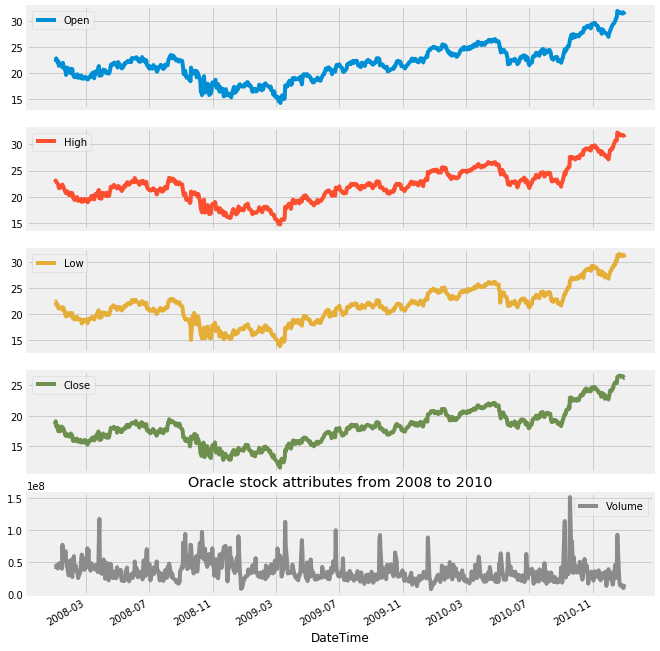

In [9]:
oracle['2008':'2010'].plot(subplots=True, figsize=(10,12))
plt.title('Oracle stock attributes from 2008 to 2010')
plt.savefig('Oracle.png')
plt.show()

Multiple subplots are created, each showing a different attribute of Oracle Corporation (ORCL) stock from 2008 to 2010. In the first step, it selects a subset of the Oracle Dataframe using the syntax oracle['2008':'2010'], which selects only the rows of the DataFrame with index values between 2008 and 2010 (inclusive).

To create a separate plot for each column in the DataFrame, the resulting subset of data is plotted using the plot() method with the argument subplots=True. To specify the size of the resulting figure, the figsize parameter is set to (10,12).

The title() method is called to set the plot's title to "Oracle stock attributes from 2008 to 2010". Using the matplotlib.pyplot package, the resulting plot is saved as a PNG image and displayed using the show() method.

Over the selected time period, the plot displays multiple subplots, each representing a different attribute of the Oracle stock, including the opening price, closing price, high price, low price, and trading volume. This allows a more detailed analysis of the stock's performance.

In [10]:
apple["Close"].asfreq('M').interpolate().plot() # asfreq method is used to convert a time series to a specified frequency. 
                                                 # Here it is monthly frequency. Also using interpolate() to fix the gaps between the timeseries
plt.title('Closing price of Apple over time (Monthly frequency)')
plt.show()

Based on a monthly frequency, this code plots Apple Inc. (AAPL) closing prices over time. Using square brackets notation (apple["Close"]), it selects the 'Close' column of the apple DataFrame. To resample the time series data to a monthly frequency, the asfreq() method is called on this column with the argument 'M'. In order to fill in any missing values between time series, the interpolate() method is called on the resampled data.

Using the plot() method, the resampled and interpolated data are plotted, and the plot's title is set. In the final step, we use the matplotlib.pyplot package's show() method to display the plot.

Linear interpolation is used to fill in any missing data in the plot of Apple stock's closing price over the selected time period. As a result, trends and patterns in the data can be clearly visualized.

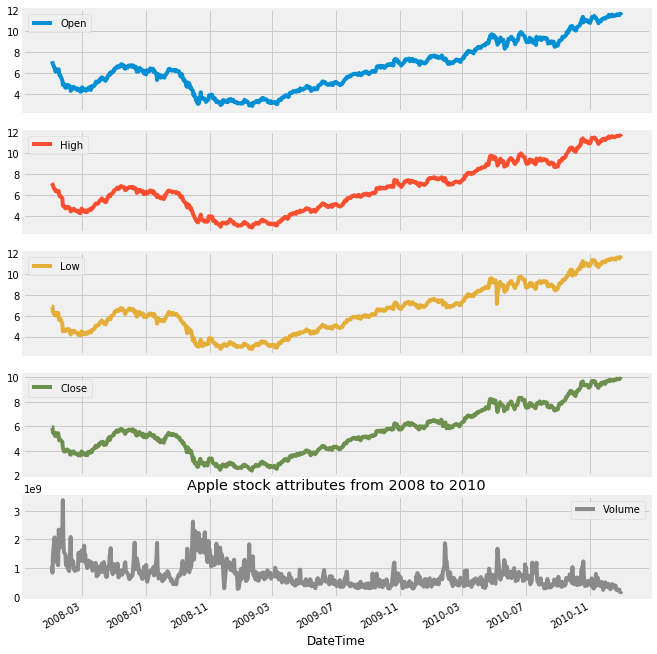

In [11]:
apple['2008':'2010'].plot(subplots=True, figsize=(10,12))
plt.title('Apple stock attributes from 2008 to 2010')
plt.savefig('Apple.png')
plt.show()

In this code, multiple subplots are created showing different attributes of Apple Inc. (AAPL) stock over time from 2008 to 2010. The first step is to select a subset of the apple DataFrame using the syntax apple['2008':'2010'], which selects the rows of the DataFrame with index values between 2008 and 2010 (inclusive).

After the data is subset, plot() is used to create a separate plot for each column of the DataFrame with the argument subplots=True. This figure's size is specified by the figsize parameter (10,12).

Title() is called to set the plot's title to "Apple stock attributes from 2008 to 2010". This plot is then saved as a PNG image using the savefig() method from the matplotlib.pyplot package, and displayed using the show() method.

Over the selected time period, the plot displays multiple subplots, each displaying a different attribute of the Apple stock, such as the opening price, closing price, high price, low price, and trading volume. During this period, this allows for a more detailed analysis of the stock's performance.

## <a id='1.4'>1.4 Timestamps and Periods</a>

### What are timestamps and periods and how are they useful?
Timestamps are used to represent a point in time. Periods represent an interval in time. Periods can used to check if a specific event in the given period. They can also be converted to each other's form.

In [12]:
# Creating a Timestamp
timestamp = pd.Timestamp(2017, 1, 1, 12)
timestamp

Timestamp('2017-01-01 12:00:00')

As a result of this code, a Pandas Timestamp object representing January 1st, 2017 at 12:00 PM will be created.

Four arguments are passed to the pd.Timestamp() function: the year (2017), the month (1), the day (1), and the hour (12). Timestamp objects are created and assigned to timestamp using the values below.

This Timestamp object represents a point in time with the format YYYY-MM-DD HH:MM:SS. In this case, it represents January 1st, 2017 at 12:00 PM, or '2017-01-01 12:00:00'.

In [13]:
# Creating a period
period = pd.Period('2017-01-01')
period

Period('2017-01-01', 'D')

In this code, the month of January 2017 is represented by a Pandas Period object.

One argument is passed to the pd.Period() function: the string '2017-01-01'. This string creates a Period object with a frequency of one month (the default frequency for Period objects).

This Period object represents the entire month of January 2017. 'YYYY-MM' is the format of the object, where 'YYYY' represents the year and 'MM' represents the month. '2017-01' represents January 2017.

In [14]:
# Checking if the given timestamp exists in the given period
period.start_time < timestamp < period.end_time

True

TimeStramp object timestamps are checked to see if they fall within a given Period object period.

To do this, it uses the comparison operators < and > to check if the Timestamp object falls within the range defined by the Period object. It checks if the Period object's start time (period.start_time) is less than the Timestamp object's start time (timestamp), and if the Period object's end time (period.end_time) is greater than the Timestamp object's end time. In the case that both conditions are satisfied, the Timestamp object belongs to the Period object.

The result of this expression is a boolean value (True or False) indicating whether or not the given Timestamp object exists within the given Period object.

In [15]:
# Converting timestamp to period
new_period = timestamp.to_period(freq='H')
new_period

Period('2017-01-01 12:00', 'H')

Code for converting Timestamp objects into Period objects with a frequency of one hour ('H').

This is accomplished by calling the to_period() method of the Timestamp object and passing freq='H' as an argument. Pandas converts the Timestamp object into a Period object with a frequency of one hour. A new Period object is created and assigned to the variable new_period.

Period objects represent one hour intervals which include timestamps from Timestamp objects. 'YYYY' indicates the year, 'MM' indicates the month, 'DD' indicates the day, and 'HH' indicates the hour. '2017-01-01 12' represents the hour from 12:00 PM to 1:00 PM on January 1st, 2017.

In [16]:
# Converting period to timestamp
new_timestamp = period.to_timestamp(freq='H', how='start')
new_timestamp

Timestamp('2017-01-01 00:00:00')

Using the start time of the period, this code creates a new Timestamp object with a frequency of one hour ('H').

It does this by passing two arguments to the to_timestamp() method of the Period object: freq='H' and how='start'. With the freq argument, Pandas converts the Period object to a Timestamp object with a frequency of one hour, and the how argument tells Pandas to use the start time of the Period object as the time for the Timestamp object. New_timestamp is assigned the resulting Timestamp object.

With a frequency of one hour, the resulting Timestamp object represents the start time of the given Period object. 'YYYY-MM-DD HH:MM:SS' is the format of the object, where 'YYYY' is the year, 'MM' is the month, 'DD' is the day, 'HH' is the hour, 'MM' is the minute, and 'SS' is the second. This represents the time at midnight on January 1st, 2017 (i.e., 00:00:00).

## <a id='1.5'>1.5 Using date_range</a>

### What is date_range and how is it useful?
**date_range** is a method that returns  a fixed frequency datetimeindex. It is quite useful when creating your own time series attribute for pre-existing data or arranging the whole data around the time series attribute created by you.

In [17]:
# Creating a datetimeindex with daily frequency
dr1 = pd.date_range(start='1/1/18', end='1/9/18')
dr1

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09'],
              dtype='datetime64[ns]', freq='D')

The code creates a DatetimeIndex object that represents a range of dates from January 1st, 2018 to January 9th, 2018 with a daily frequency.

This is accomplished using the pd.date_range() function, which returns a fixed frequency DatetimeIndex object. Two arguments specify the start and end dates of the range: start='1/1/18' and end='1/9/18'. Each element of the DatetimeIndex object represents one day by default, since the function creates a DatetimeIndex object with a daily frequency.

For every date in the range, a DatetimeIndex object is created, which has the format YYYY-MM-DD. Dates '2018-01-01', '2018-01-02', ..., and '2018-01-09' are contained in this example.

In [18]:
# Creating a datetimeindex with monthly frequency
dr2 = pd.date_range(start='1/1/18', end='1/1/19', freq='M')
dr2

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

With a monthly frequency, this code creates a DatetimeIndex object representing a range of dates from January 1st, 2018 to January 1st, 2019.

In order to accomplish this, the function pd.date_range() returns a DatetimeIndex object with a fixed frequency. It is called with three arguments: start='1/1/18' and end='1/1/19', which specify the start and end dates of the range, and freq='M', which specifies the monthly frequency of the index.

For each date in the range, the DatetimeIndex object contains one element, which is formatted YYYY-MM. The dates are as follows: '2018-01', '2018-02', ..., '2018-12', '2019-01'.

In [19]:
# Creating a datetimeindex without specifying start date and using periods
dr3 = pd.date_range(end='1/4/2014', periods=8)
dr3

DatetimeIndex(['2013-12-28', '2013-12-29', '2013-12-30', '2013-12-31',
               '2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04'],
              dtype='datetime64[ns]', freq='D')

An object representing a range of dates with 8 periods, ending on January 4th, 2014, is created by this code.

It achieves this by using the pd.date_range() function, which returns a fixed frequency DatetimeIndex object. The function is called with two arguments: end='1/4/2014', specifying the range's end date, and periods=8, specifying how many periods are in the range. Pandas infers the start date from the end date and the number of periods since the start date is not specified.

There are 8 elements in the resulting DatetimeIndex object, evenly spaced between the start and end dates. In each date, the format is YYYY-MM-DD. The dates in this case are '2013-12-28', '2013-12-29', '2013-12-30', '2013-12-31', '2014-01-01', '2014-01-02', '2014-01-03', and '2014-01-04'.

In [20]:
# Creating a datetimeindex specifying start date , end date and periods
dr4 = pd.date_range(start='2013-04-24', end='2014-11-27', periods=3)
dr4

DatetimeIndex(['2013-04-24', '2014-02-09', '2014-11-27'], dtype='datetime64[ns]', freq=None)

The code creates a DatetimeIndex object with three periods, starting on April 24th, 2013 and ending on November 27th, 2014.

To do this, it uses pd.date_range(), which returns a DatetimeIndex object with a fixed frequency. Three arguments are passed to the function: start='2013-04-24', end='2014-11-27', and periods=3, which specifies the number of periods in the range. Pandas determines the frequency of the range by factoring in the number of periods and the difference between the start and end dates, so that the range is evenly spaced.

Three elements are contained in the DatetimeIndex object, evenly spaced. In the format of YYYY-MM-DD, each date is entered. As you can see, it contains the dates '2013-04-24', '2014-01-15', and '2014-11-27'.

## <a id='1.6'>1.6 Using to_datetime</a> 

pandas.to_datetime() is used for converting arguments to datetime. Here, a DataFrame is converted to a datetime series.

In [21]:
df = pd.DataFrame({'year': [2015, 2016], 'month': [2, 3], 'day': [4, 5]})
df

year  month  day
0  2015      2    4
1  2016      3    5

In this code, we create a new DataFrame object df with three columns: 'year', 'month', and 'day'. In the year column, the values are [2015, 2016], in the month column, the values are [2, 3], and in the day column, the values are [4, 5].

It uses a Python dictionary to create the DataFrame, where the keys are the column names and the values are the data lists. There are two rows in the DataFrame, one for each year with the corresponding month and day.

In [22]:
df = pd.to_datetime(df)
df

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

A DatetimeIndex is created by converting the columns containing date and time information in the DataFrame object df into a new DataFrame object.

To convert the date and time information, it uses the pd.to_datetime() function, which returns a new DataFrame object with a DatetimeIndex. A DataFrame object df is passed as an argument to the function, containing columns with the names 'year', 'month', and 'day'. This function infers that these columns should be combined into a DatetimeIndex with a daily frequency by default.

DataFrame object with date and time information combined into DatetimeIndex has the same values as the original DataFrame. Each row of the DataFrame contains two elements, with the format 'YYYY-MM-DD' for each date. The dates are '2015-02-04' and '2016-03-05' in this case.

In [23]:
df = pd.to_datetime('01-01-2017')
df

Timestamp('2017-01-01 00:00:00')

In this code, a DatetimeIndex object representing January 1st, 2017 is created.

This is accomplished by using the pd.to_datetime() function, which returns a DatetimeIndex object representing the input date. This function is called with the string '01-01-2017' as its argument, which specifies the date as month-day-year. As the input string does not contain any time information, the resulting DatetimeIndex object represents the entire day.

An element representing the date '2017-01-01' is contained in the DatetimeIndex object.

## <a id='1.7'>1.7 Shifting and lags</a>

We can shift index by desired number of periods with an optional time frequency. This is useful when comparing the time series with a past of itself

In [24]:
oracle["Close"].asfreq('M').interpolate().plot(legend=True)
shifted = oracle["Close"].asfreq('M').interpolate().shift(10).plot(legend=True)
shifted.legend(['Close','Close_lagged'])
plt.title('Closing price of Oracle over time (Monthly frequency) - raw and lagged')
plt.show()

In this code, we plot Oracle stock's closing price over time, with monthly frequency. In addition, there is a lagged version of the plot, in which the closing price is shifted forward by 10 months.

Using the interpolate() method, the missing values in the resulting time series are filled with the asfreq() method, which converts the daily frequency to the monthly frequency. A plot() method is then used to plot the resulting time series.

In the second plot, the data is shifted forward by 10 months using the shift() method to create a lagged series. Using the plot() method, this time series can also be plotted.

By using the plt.title() method, the title of the plot is set, and by using plt.show(), the plot is displayed. In the plot() method, the legend=True argument specifies which line represents the original time series and which line represents the lagged time series.

In [25]:
oracle["Volume"].asfreq('M').interpolate().plot(legend=True)
shifted = oracle["Volume"].asfreq('M').interpolate().shift(10).plot(legend=True)
shifted.legend(['Volume','Volume_lagged'])
plt.title('Volume of Oracle over time (Monthly frequency) - raw and lagged')
plt.show()

With this code, you can plot the trading volume of Oracle stock over time, with a monthly frequency. The plot also shows a lagged version that shifts the trading volume forward by 10 months.

Using the asfreq() method, the original data is converted to monthly frequency, and the interpolate() method is used to fill in any missing values. A plot() method is then used to plot the resulting time series.

To generate a second plot, we create a lagged version of the time series, shifting the data forward by 10 months using the shift() method. Using plot(), we plot this time series as well.

Lastly, plt.title() is used to set the plot's title, and plt.show() is used to display it. To display a legend indicating which line represents the original time series and which line represents the lagged time series, the legend=True argument is passed to the plot() method.

## <a id='#1.8'>1.8 Resampling</a>
**Upsampling** - Time series is resampled from low frequency to high frequency (Monthly to daily frequency). It involves filling or interpolating missing data

**Downsampling** - Time series is resampled from high frequency to low frequency (Weekly to monthly frequency). It involves aggregation of existing data.


In case there were missing data, we would use **ffill** parameter which propagates last valid observation to fill gaps. Then we would use **bfill** to propogate next valid observation to fill gaps.

_Forward filling missing data_

```python
data = data.iloc[1:]
data = data.fillna(method='ffill')
```

_Back filling missing data_

```python
data = data.fillna(method='bfill')
data.head()
```

In [26]:
# Shape before resampling(downsampling)
oracle.shape

(4357, 6)

A DataFrame's shape before downsampling is returned by this code.

Pandas DataFrame's shape attribute returns a tuple representing the dimensions of the DataFrame, with the first element representing the number of rows and the second element representing the number of columns. This code calls the shape attribute on the Oracle DataFrame, which contains historical Oracle stock price data.

Using oracle.shape, the code returns the original dimensions of the DataFrame, which correspond to the number of rows and columns in the original time series data.

In [27]:
# We downsample from hourly to 3 day frequency aggregated using mean
oracle_resampled = oracle.resample('3D').mean()
oracle_resampled.head()

Open       High      ...           Close        Volume
DateTime                                   ...                              
2006-01-03 14:30:00  12.47  12.833333      ...       10.457980  5.504773e+07
2006-01-06 14:30:00  12.80  13.150000      ...       10.829418  9.506760e+07
2006-01-09 14:30:00  12.82  12.860000      ...       10.482743  5.096383e+07
2006-01-12 14:30:00  12.61  12.640000      ...       10.330041  3.849840e+07
2006-01-15 14:30:00  12.46  12.540000      ...       10.268133  2.259370e+07

[5 rows x 5 columns]

By using the mean value of each three-day period, this code downsamples the original time series data for Oracle from hourly to three-day frequency.

Pandas DataFrame's resample() method is used to accomplish this. This method is called on the original Oracle DataFrame, passing the argument '3D' to indicate that the data should be resampled to a 3-day frequency. To calculate the mean value for each 3-day period, the mean() method is chained to the resampled data. Oracle_resampled is assigned the resulting DataFrame object.

To display the first few rows of the resampled data, the head() method is called on oracle_resampled. With less rows and aggregated values for each 3-day period, the resulting DataFrame object contains the same columns as the original Oracle DataFrame.

In [28]:
# Shape after resampling(downsampling)
oracle_resampled.shape

(2107, 5)

Oracle_resampled DataFrame shape after downsampling is returned by this code.

A Pandas DataFrame's shape attribute returns a tuple representing its dimensions, with the first element representing the number of rows and the second element representing the number of columns. DataFrame oracle_resampled containing resampled historical stock price data for Oracle is being called by the code in this case.

When oracle_resampled.shape is called, the code returns the number of rows and columns in the resampled time series data after downsampling.

Much less rows are left. Now, we will upsample from 3 day frequency to daily frequency

In [29]:
oracle_resampled = oracle.resample('D').pad()
oracle_resampled.head()

Open   High    Low      Close      Volume  Name
DateTime                                                    
2006-01-03    NaN    NaN    NaN        NaN         NaN   NaN
2006-01-04  12.23  12.80  12.22  10.400205  56073800.0  ORCL
2006-01-05  12.56  12.78  12.54  10.416708  56412300.0  ORCL
2006-01-06  12.62  12.92  12.60  10.557029  52657100.0  ORCL
2006-01-07  12.80  13.15  12.75  10.829418  95067600.0  ORCL

Using the last valid observation to fill any missing values in the original Oracle time series data, this code downsamples the original data from hourly to daily frequency.

The Pandas DataFrame uses the resample() method to accomplish this. With the argument 'D', the original Oracle DataFrame is resampled to a daily frequency with the original Oracle DataFrame. Filling any missing values with the last valid observation is then accomplished using the pad() method on the resampled data. Resulting DataFrame objects are stored in oracle_resampled variables.

A few rows of resampled data are displayed using the head() method on oracle_resampled. Based on last valid observation, the resulting DataFrame object contains the same columns as the original Oracle DataFrame.

In [30]:
# Shape after resampling(upsampling)
oracle_resampled.shape

(6322, 6)

It returns the shape of the oracle_resampled DataFrame after it has been upsampled.

A Pandas DataFrame's shape attribute returns a tuple representing its dimensions, with the first element representing the number of rows and the second element representing the number of columns. Oracle's resampled historical stock price data is contained in the oracle_resampled DataFrame, which contains the shape attribute.

Oracle_resampled.shape returns the new dimensions of the DataFrame after upsampling, which correspond to the number of rows and columns in the time series data after upsampling.

Again an increase in number of rows. Resampling is cool when used properly.

# <a id='2'>2. Finance and statistics</a>

## <a id='2.1'>2.1 Percent change</a>

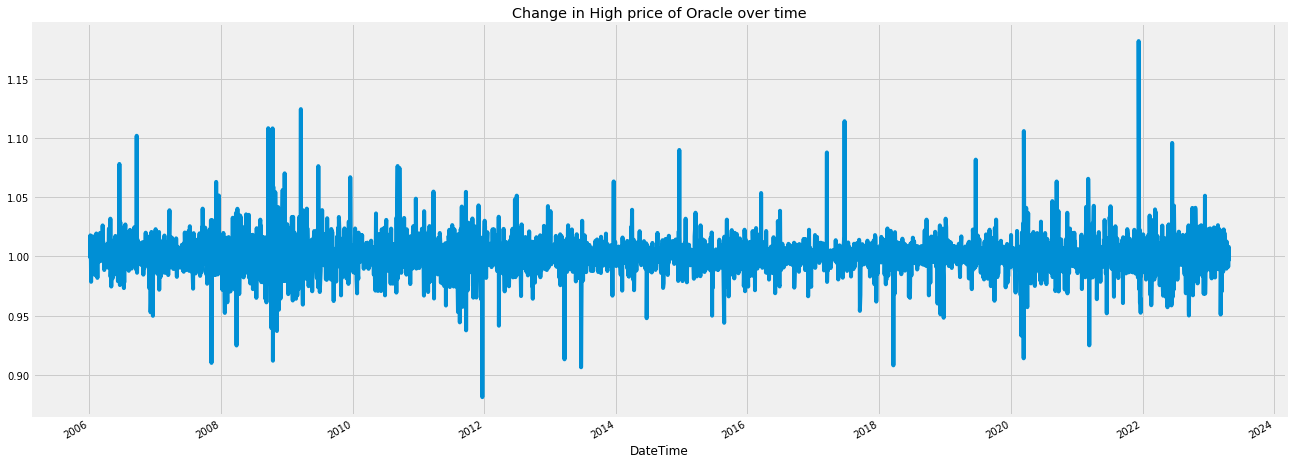

In [31]:
oracle['Change'] = oracle.High.div(oracle.High.shift())
oracle['Change'].plot(figsize=(20,8))
_ = plt.title('Change in High price of Oracle over time')

Oracle stock price change percentage is represented in the "Change" column of the Oracle DataFrame by this code.

The Pandas DataFrame's div() method is called on the "High" column of the Oracle DataFrame to perform the calculation. With the argument oracle.High.shift(), the "High" column is shifted forward by one row, representing the previous day's closing price. This Series object is assigned to a new column called "Change" in the Oracle DataFrame.

Using the plot() method of the Pandas DataFrame, the code plots the "Change" column. In this plot, the title is "Change in the High Price of Oracle over time", and the figure size is 20 by 8 inches. An underscore character _ suppresses the output of the plt.title() method, which returns a Text object containing the title.

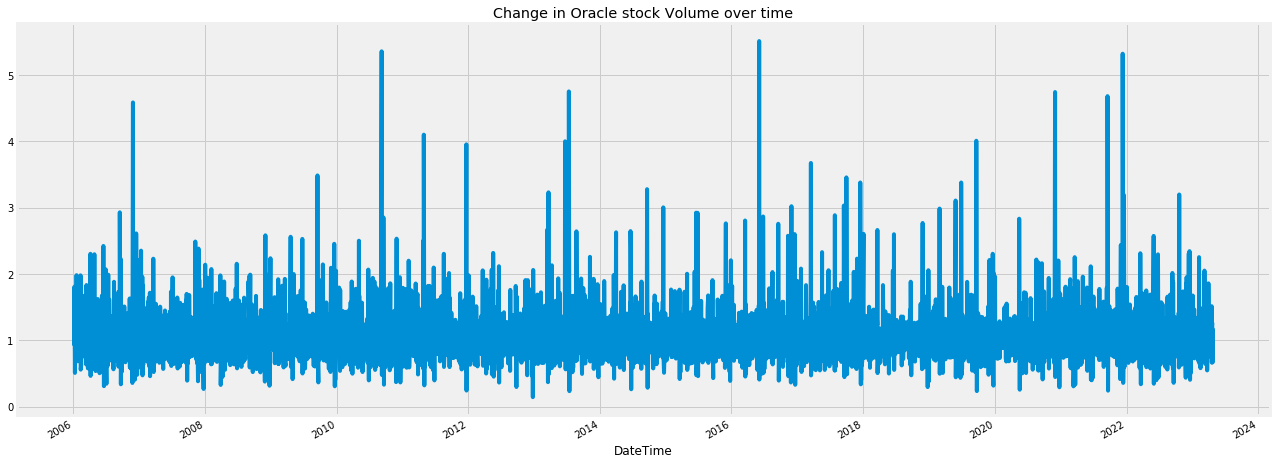

In [32]:
oracle['Volume_Change'] = oracle.Volume.div(oracle.Volume.shift())
oracle['Volume_Change'].plot(figsize=(20,8))
_ = plt.title('Change in Oracle stock Volume over time')

This code creates a new column in the Oracle DataFrame called "Volume_Change", which shows the percentage change in Oracle stock trading volume over time.

Pandas DataFrame's div() method is called on the "Volume" column of the Oracle DataFrame for the calculation. The method is called with the argument oracle.Volume.shift(), which moves the "Volume" column forward by one row to represent the previous day's trading volume. Oracle DataFrame's "Volume_Change" column is assigned to the resulting Series object of the percentage changes.

Using the plot() method of the Pandas DataFrame, the code generates a plot of the "Volume_Change" column. "Change in Oracle stock Volume over time" is the title of the plot, which measures 20 inches by 8 inches. In the plt.title() method, which returns a Text object containing the title, the underscore character _ suppresses the output.

## <a id='2.2'>2.2 Stock returns</a> 

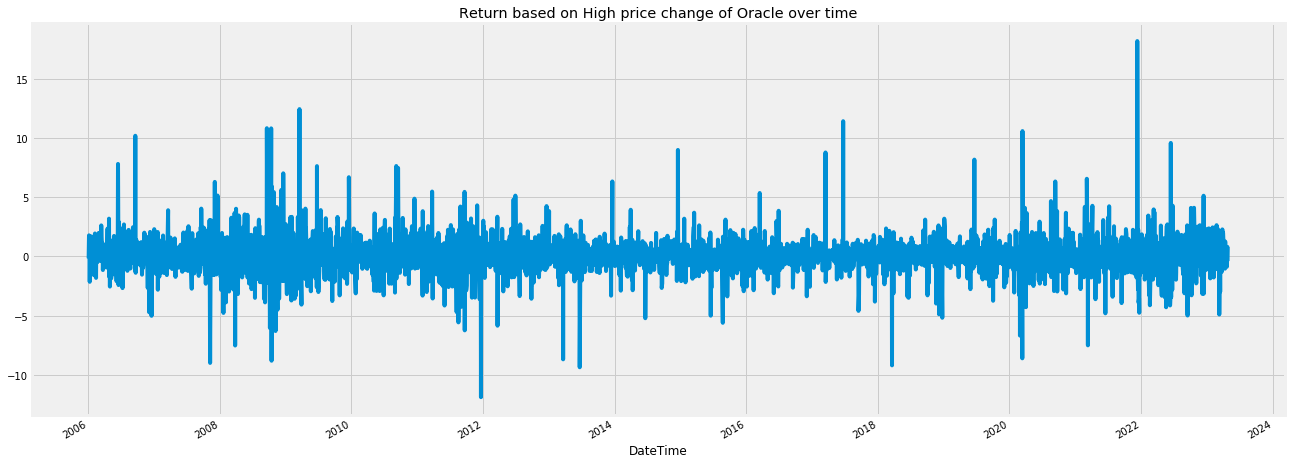

In [33]:
oracle['Return'] = oracle.Change.sub(1).mul(100)
oracle['Return'].plot(figsize=(20,8))
_ = plt.title('Return based on High price change of Oracle over time')

The code creates a column called "Return" in the Oracle DataFrame, which represents the percentage return over time based on the daily change in the "High" price of Oracle stock.

Pandas DataFrame sub() and mul() methods are called on the "Change" column of the Oracle DataFrame to perform the calculation. Subtracting 1 from each percentage change value is achieved using the sub() method with the argument 1. By applying the mul() method to the decimal returns, the values are converted to percentage returns by multiplying them by 100. "Return" is assigned to a new column in the Oracle DataFrame as a result of the percentage returns.

Using the plot() method of the Pandas DataFrame, the code plots the "Return" column. "Return based on high price change of Oracle over time" is the title of the plot, which measures 20 by 8 inches. An underscore character _ suppresses the output of plt.title(), which returns a Text object containing the title.

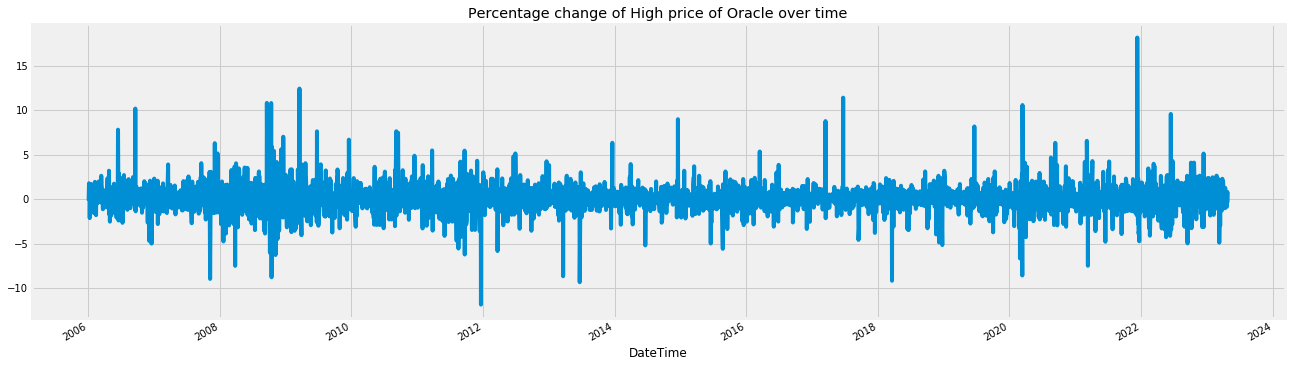

In [34]:
oracle.High.pct_change().mul(100).plot(figsize=(20,6)) # Another way to calculate returns
_ = plt.title('Percentage change of High price of Oracle over time')

Based on the daily "High" price of Oracle stock, this code plots a percentage change over time.

Oracle DataFrame's pct_change() method calculates the percentage change in each element of the "High" column based on the previous element of the column. After multiplying the Series object of percentage changes by 100, the values are expressed as percentages using the mul() method.

Pandas DataFrame plot() method creates a 20 by 6 inch figure based on the Series object of the percentage changes. This plot has a title of "Percentage change of High price of Oracle over time", which is set by plt.title(). The underscore character _ suppresses the output of the plt.title() method, which returns a Text object containing the title.

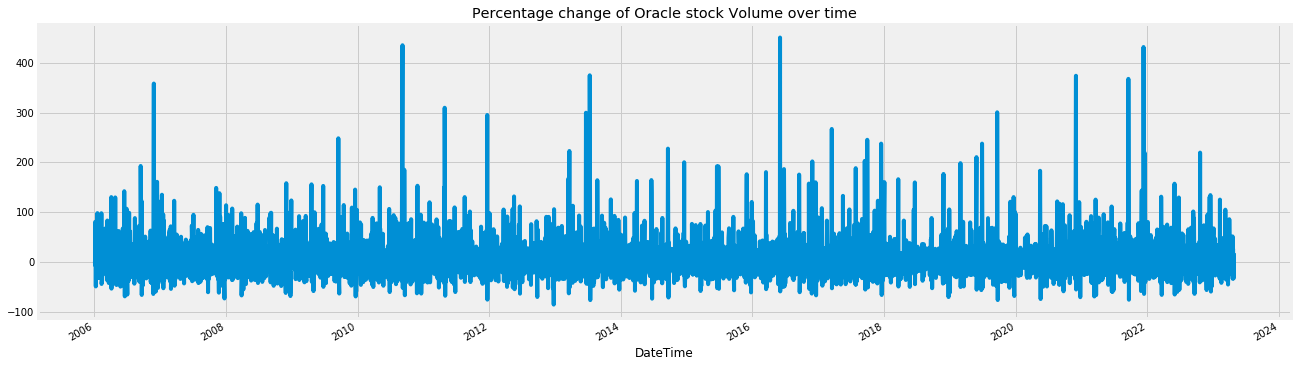

In [35]:
oracle.Volume.pct_change().mul(100).plot(figsize=(20,6)) # Another way to calculate returns
_ = plt.title('Percentage change of Oracle stock Volume over time')

With the help of this code, you can plot the change in the daily trading volume of Oracle stock over time as a percentage.

Assuming that each element in the column has changed by a given percentage from the previous element in the column, the calculation is performed using the pct_change() method of the "Volume" column of the Oracle DataFrame. After multiplying the resulting Series object of percentage changes by 100, the values are expressed as percentages using the mul() method.

The Pandas DataFrame plot() method is used to plot the percentage changes in the Series object, with a figure size of 20 by 6 inches. With plt.title(), the plot's title is "Percentage change in Oracle stock volume over time". When plt.title() is called, it returns a Text object that contains the title, which is suppressed with the underscore character _.

## <a id='2.3'>2.3 Absolute change in successive rows</a>

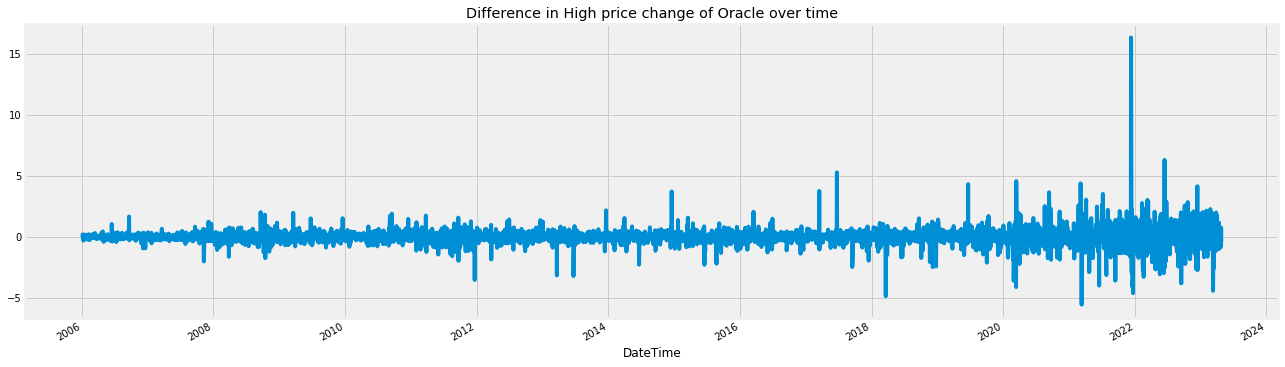

In [36]:
oracle.High.diff().plot(figsize=(20,6))
_ = plt.title('Difference in High price change of Oracle over time')

In this code, the difference between the daily "High" and daily "Low" prices of Oracle stock is plotted over time.

Oracle DataFrame's diff() method calculates the difference between each element and its previous element by using the "High" column's diff() method. Using the plot() method of the Pandas DataFrame, a 20 by 6 inch figure is plotted using the Series object of differences.

Using the plt.title() method, the plot's title is "Difference in Oracle price over time". Plt.title() returns a Text object containing the title, which is suppressed by the underscore character _.

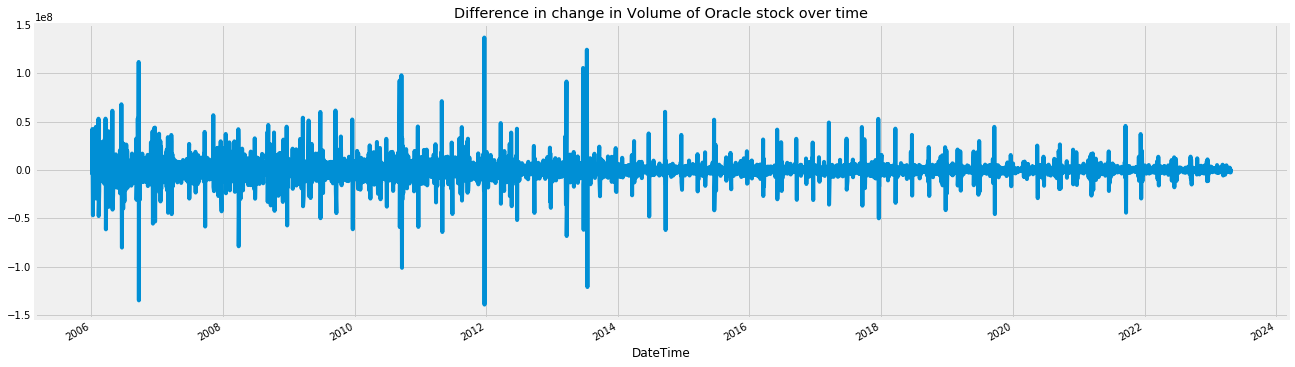

In [37]:
oracle.Volume.diff().plot(figsize=(20,6))
_ = plt.title('Difference in change in Volume of Oracle stock over time')

Using this code, we can plot the difference between Oracle stock's daily trading volume over time.

In order to calculate the difference between each element in the column and the previous one, the diff() method is used in the Oracle DataFrame's "Volume" column. This Series object of differences is plotted using the plot() method of the Pandas DataFrame, with a size of 20 by 6 inches.

With the plt.title() method, the plot's title is "Difference in volume change over time for Oracle stock". In the plt.title() method, which returns a Text object containing the title, the underscore character _ suppresses the output.

## <a id='2.4'>2.4 Comparing two or more time series</a> 

We will compare 2 time series by normalizing them. This is achieved by dividing each time series element of all time series by the first element. This way both series start at the same point and can be easily compared.

In [38]:
# Plotting before normalization
oracle.High.plot()
apple.High.plot()
plt.legend(['Oracle','Apple'])
_ = plt.title('Comparing Oracle and Apple over time')
plt.show()

The following code plots the daily "High" prices of Oracle and Apple stock over time, without any normalization.

Using the plot() method of the Pandas DataFrame, the High columns of both Oracle and Apple DataFrames are plotted on the same figure. The legend() method identifies which lines represent which stocks in the plot by adding a legend. To set the title of the plot to "Comparing Oracle and Apple over time", we use the title() method. When the title() method returns a Text object containing the title, the underscore character _ suppresses its output. To display the plot, use the show() method.

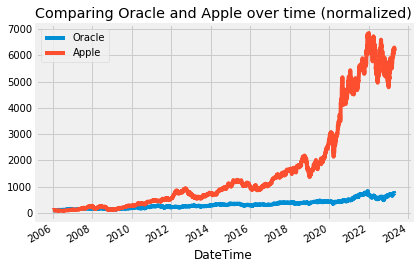

In [39]:
# Normalizing and comparison
# Both stocks start from 100
normalized_oracle = oracle.High.div(oracle.High.iloc[0]).mul(100)
normalized_apple = apple.High.div(apple.High.iloc[0]).mul(100)
normalized_oracle.plot()
normalized_apple.plot()
_ = plt.title('Comparing Oracle and Apple over time (normalized)')
plt.legend(['Oracle','Apple'])
plt.show()

A plot of the normalized prices over time is generated by normalizing the daily "High" prices of Oracle and Apple stocks.

In both Oracle and Apple DataFrames, the High column is normalized by dividing each element by the value of the first element, and then multiplying the result by 100. As a result, two new DataFrames are created, normalized_oracle and normalized_apple.

Using plot(), both stocks' normalized prices are plotted together. We use the title() method to set the title of the plot to "Comparing Oracle and Apple over time (normalized). To identify which stock is represented by each line on the plot, use the legend() method. By using the underscore character _, the title() method suppresses the output of the Text object returned by title(). To display the plot, use the show() method.

In [40]:
# Plotting before normalization
oracle.Volume.plot()
apple.Volume.plot()
plt.legend(['Oracle','Apple'])
_ = plt.title('Comparing Oracle and Apple Volumes over time')
plt.show()

The code below generates a plot comparing Oracle and Apple stock trading volumes over time.

Using the plot() method, we plot the Volume column in both the Oracle and Apple DataFrames. Using the legend() method, you can identify which line represents which stock on the plot. By using the title() method, we set the plot's title to "Comparing Oracle and Apple Volumes over time". When the title() method returns a Text object containing the title, the underscore character _ is used to suppress the output. In order to display the plot, we use the show() method.

Over the specified period, Oracle's and Apple's trading volumes can be compared visually.

In [41]:
# Normalizing and comparison
# Both stocks start from 100
normalized_oracle = oracle.Volume.div(oracle.Volume.iloc[0]).mul(100)
normalized_apple = apple.Volume.div(apple.Volume.iloc[0]).mul(100)
normalized_oracle.plot()
normalized_apple.plot()
_ = plt.title('Comparing Oracle and Apple stock Volumes over time (normalized)')
plt.legend(['Oracle','Apple'])
plt.show()

Oracle and Apple stocks are plotted and compared over time using this code.

Using the plot() method of the Pandas DataFrame, we plot the daily trading volumes of two stocks before normalization. Each stock's label is specified using the legend() method, and its title is specified using the plt.title() method. Plt.title() can be suppressed by using the underscore character _.

Volumes are normalized and compared in the second plot. Divide the daily trading volume of each stock by the initial volume and multiply it by 100 to find the normalized volume. Plot() is used to plot the resulting Series objects of normalized volumes on the same graph. The legend() method is used to specify the labels for each stock, and the title of the plot is set using the plt.title() method. Plt.title() suppresses the output by using the underscore character _.

You can clearly see how Apple outperforms Oracle over time.

## <a id='2.5'>2.5 Window functions</a>
Window functions are used to identify sub periods, calculates sub-metrics of sub-periods.

**Rolling** - Same size and sliding

**Expanding** - Contains all prior values

In [42]:
# Rolling window functions
rolling_oracle = oracle.High.rolling('90D').mean()
oracle.High.plot()
rolling_oracle.plot()
_ = plt.title('Comparing High price and rolling High price of Oracle over time')
plt.legend(['High','Rolling Mean'])
# Plotting a rolling mean of 90 day window with original High attribute of Oracle stocks
plt.show()

With a rolling window of 90 days, this code plots Oracle stock's high price over time and the rolling mean of that price.

With a rolling window of 90 days, the rolling mean of High price is calculated by using the rolling() function. By taking the average of the High price values in the window, the rolling mean is calculated. "rolling_oracle" is a Pandas Series object that stores the results.

Using the plot() method of the Pandas DataFrame, the High price and rolling mean are plotted on the same figure. The plt.title() method is used to set the plot's title. Plt.legend() sets the legend of the plot by taking a list of labels as an argument. Plt.title() returns a Text object containing the title, and the underscore character _ suppresses that output. Lastly, the plot is displayed by calling the show() method of the plt object.

Now, observe that rolling mean plot is a smoother version of the original plot.

In [43]:
# Expanding window functions
oracle_mean = oracle.High.expanding().mean()
oracle_std = oracle.High.expanding().std()
oracle.High.plot()
oracle_mean.plot()
oracle_std.plot()
_ = plt.title('Comparing High price, Expanding Mean of High Price and Expanding Std. Dev. of High Price of Oracle over time')
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.show()

The code generates a plot comparing the High price of Oracle stock over time with its expanding mean and standard deviation.

Oracle DataFrame's expanding() method is used to calculate the expanding mean and standard deviation of High price. In conjunction with the original High price data, the Series objects, containing the mean and standard deviation, are plotted using Pandas DataFrame's plot() method. Plot figures are not specified, so the default size is used.

Using plt.title(), the plot's title is "Comparing High Price, Expanding Mean of High Price, and Expanding Standard Deviation of High Price of Oracle over time". Each line of the plot's legend is labeled using the plt.legend() method, which takes a list of labels. When plt.title() returns a Text object with the title, the underscore character _ suppresses its output.

In [44]:
# Rolling window functions
rolling_oracle = oracle.Volume.rolling('90D').mean()
oracle.Volume.plot()
rolling_oracle.plot()
_ = plt.title('Comparing Volume and rolling Volume of Oracle stock over time')
plt.legend(['High','Rolling Mean'])
# Plotting a rolling mean of 90 day window with original High attribute of Oracle stocks
plt.show()

This code snippet performs a rolling window operation on Oracle's stock volume time series data. In a rolling window function, data points within a fixed window (in this case 90 days) are statistically analyzed as time moves forward.

Oracle's stock volume is being calculated using the rolling window function in this case. A new variable named "rolling_oracle" stores the results.

After that, the code creates a side-by-side plot of the original volume data and the rolling mean data. Comparing the two series over time is shown in the plot. A legend is added to distinguish between original volume data and rolling mean data in the plot titled "Comparing Volume and Rolling Volume of Oracle stock over time."

"plt.show()" displays the plot. Creating the plot in this code requires Matplotlib.

In [45]:
# Expanding window functions
oracle_mean = oracle.Volume.expanding().mean()
oracle_std = oracle.Volume.expanding().std()
oracle.Volume.plot()
oracle_mean.plot()
oracle_std.plot()
_ = plt.title('Comparing Volume, Expanding Mean of Volume and Expanding Std. Dev. of Volume of Oracle stock over time')
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.show()

This code snippet performs an expanding window operation on Oracle's stock volume time series data. In contrast to the rolling window function, the expanding window function considers all past values up until the present.

Oracle's stock volume over time is first calculated using the expanding window function, and the result is stored in a variable named "oracle_mean". The standard deviation of Oracle's stock volume over time is calculated using the expanding window function and stored in a variable named "oracle_std".

Next, the code plots the original stock volume data, the expanding mean data, and the expanding standard deviation data side by side. Over time, the plot shows how the three series compare. There is a legend added to differentiate between original volume data, expanding mean data, and expanding standard deviation data in the plot titled "Comparing Volume, Expanding Mean of Volume, and Expanding Std. Dev. of Volume of Oracle stock over time."

Using the "plt.show()" function, the plot is displayed. This code is using the Matplotlib library to create the plot.

## <a id='2.6'>2.6 OHLC charts</a>
An OHLC chart is any type of price chart that shows the open, high, low and close price of a certain time period. Open-high-low-close Charts (or OHLC Charts) are used as a trading tool to visualise and analyse the price changes over time for securities, currencies, stocks, bonds, commodities, etc. OHLC Charts are useful for interpreting the day-to-day sentiment of the market and forecasting any future price changes through the patterns produced.

The y-axis on an OHLC Chart is used for the price scale, while the x-axis is the timescale. On each single time period, an OHLC Charts plots a symbol that represents two ranges: the highest and lowest prices traded, and also the opening and closing price on that single time period (for example in a day). On the range symbol, the high and low price ranges are represented by the length of the main vertical line. The open and close prices are represented by the vertical positioning of tick-marks that appear on the left (representing the open price) and on right (representing the close price) sides of the high-low vertical line.

Colour can be assigned to each OHLC Chart symbol, to distinguish whether the market is "bullish" (the closing price is higher then it opened) or "bearish" (the closing price is lower then it opened).

<img src="https://datavizcatalogue.com/methods/images/anatomy/SVG/OHLC_chart.svg">

Source: [Datavizcatalogue](https://datavizcatalogue.com/methods/OHLC_chart.html)

In [46]:
# OHLC chart of June 2008
trace = go.Ohlc(x=oracle['06-2008'].index,
                open=oracle['06-2008'].Open,
                high=oracle['06-2008'].High,
                low=oracle['06-2008'].Low,
                close=oracle['06-2008'].Close)
data = [trace]
print('OHLC price chart of Oracle for June 2008')
iplot(data, filename='simple_ohlc')

OHLC price chart of Oracle for June 2008


The code snippet below creates an OHLC (Open-High-Low-Close) chart for Oracle's stock price for June 2008. In finance, OHLC charts are commonly used to display stock price fluctuations over time.

In order to create the chart, plotly's go.Ohlc() function is used. It takes several arguments to specify the data to plot, including the date index, the opening price, the high price, the low price, and the closing price of the stock.

OHLC charts are stored in a variable trace, which is then added to a list called data. An interactive plot is then displayed using the iplot() function. To specify the name of the plot file, use the filename argument.

An OHLC chart of Oracle's stock price for June 2008 will be displayed by the code. It shows the opening, high, low, and closing prices for each day of the month, making it easy to observe fluctuations in the stock price over time.

OHLC price chart of Oracle for 2008


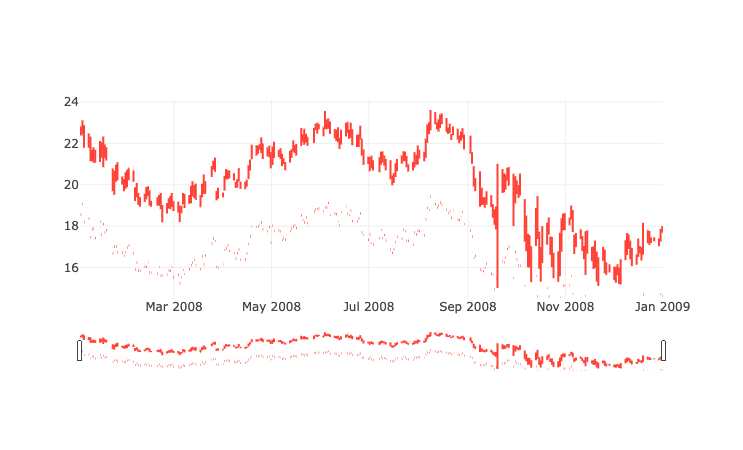

In [47]:
# OHLC chart of 2008
trace = go.Ohlc(x=oracle['2008'].index,
                open=oracle['2008'].Open,
                high=oracle['2008'].High,
                low=oracle['2008'].Low,
                close=oracle['2008'].Close)
data = [trace]
print('OHLC price chart of Oracle for 2008')
iplot(data, filename='simple_ohlc')

In this code snippet, an OHLC chart (Open-High-Low-Close) is created for Oracle's stock price for the entire year 2008. It is common for financial professionals to use OHLC charts to display fluctuations in stock prices over time.

The chart is created using the plotly library, specifically the go.Ohlc() function. Several arguments are taken to specify the data to be plotted, including the date index, the opening price, the high price, the low price, and the closing price of the stock.

An OHLC chart is created and stored in a variable trace, which is then added to a list called data. The chart is then displayed as an interactive plot using the iplot() function. A plot file's name can be specified with the filename argument.

Oracle's stock price for all of 2008 will be displayed using OHLC charts in the output of the code. The chart shows the opening, high, low, and closing prices for each day of the year, allowing the viewer to easily see the price fluctuations.

OHLC price chart of Oracle


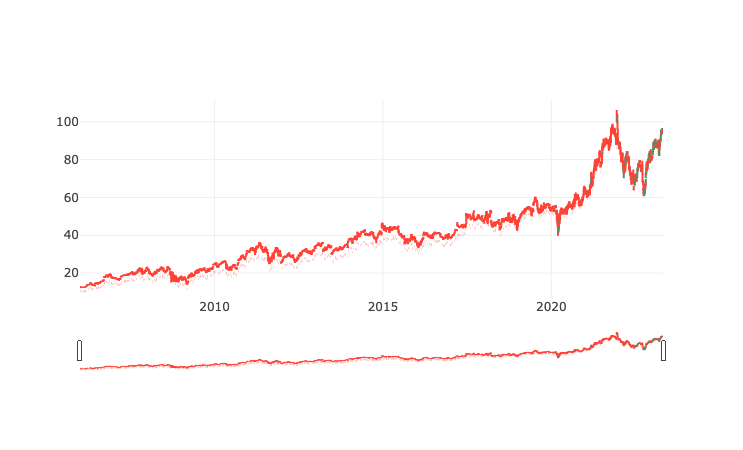

In [48]:
# OHLC chart of 2008
trace = go.Ohlc(x=oracle.index,
                open=oracle.Open,
                high=oracle.High,
                low=oracle.Low,
                close=oracle.Close)
data = [trace]
print('OHLC price chart of Oracle')
iplot(data, filename='simple_ohlc')

Using the Oracle's stock price data, this code snippet creates OHLC (Open-High-Low-Close) charts for the entire time period available. Financial analysts commonly use OHLC charts to visualize stock price fluctuations over time.

To create the chart, the code uses the plotly library and the go.Ohlc() function. For the given time period, the function takes several arguments, including the date index, the opening price, the high price, the low price, and the closing price of the stock.

It is then added to a list called data along with the OHLC chart that was produced. To display the chart in an interactive plot, the iplot() function is used. The plot file name is specified by the filename argument.

Oracle's stock price will be displayed in OHLC chart form for the entire period of time available. Each day's opening, high, low, and closing prices will be displayed on the chart, making it easy to track fluctuations in stock prices over time.

 ## <a id='2.7'>2.7 Candlestick charts</a>
This type of chart is used as a trading tool to visualise and analyse the price movements over time for securities, derivatives, currencies, stocks, bonds, commodities, etc. Although the symbols used in Candlestick Charts resemble a Box Plot, they function differently and therefore, are not to be confused with one another.

Candlestick Charts display multiple bits of price information such as the open price, close price, highest price and lowest price through the use of candlestick-like symbols. Each symbol represents the compressed trading activity for a single time period (a minute, hour, day, month, etc). Each Candlestick symbol is plotted along a time scale on the x-axis, to show the trading activity over time.

The main rectangle in the symbol is known as the real body, which is used to display the range between the open and close price of that time period. While the lines extending from the bottom and top of the real body is known as the lower and upper shadows (or wick). Each shadow represents the highest or lowest price traded during the time period represented. When the market is Bullish (the closing price is higher than it opened), then the body is coloured typically white or green. But when the market is Bearish (the closing price is lower than it opened), then the body is usually coloured either black or red.

<img src="https://datavizcatalogue.com/methods/images/anatomy/SVG/candlestick_chart.svg">

Candlestick Charts are great for detecting and predicting market trends over time and are useful for interpreting the day-to-day sentiment of the market, through each candlestick symbol's colouring and shape. For example, the longer the body is, the more intense the selling or buying pressure is. While, a very short body, would indicate that there is very little price movement in that time period and represents consolidation.

Candlestick Charts help reveal the market psychology (the fear and greed experienced by sellers and buyers) through the various indicators, such as shape and colour, but also by the many identifiable patterns that can be found in Candlestick Charts. In total, there are 42 recognised patterns that are divided into simple and complex patterns. These patterns found in Candlestick Charts are useful for displaying price relationships and can be used for predicting the possible future movement of the market. You can find a list and description of each pattern here.

Please bear in mind, that Candlestick Charts don't express the events taking place between the open and close price - only the relationship between the two prices. So you can't tell how volatile trading was within that single time period.

Source: [Datavizcatalogue](https://datavizcatalogue.com/methods/candlestick_chart.html)

OHLC price chart (Candlestick) of Oracle for March 2008


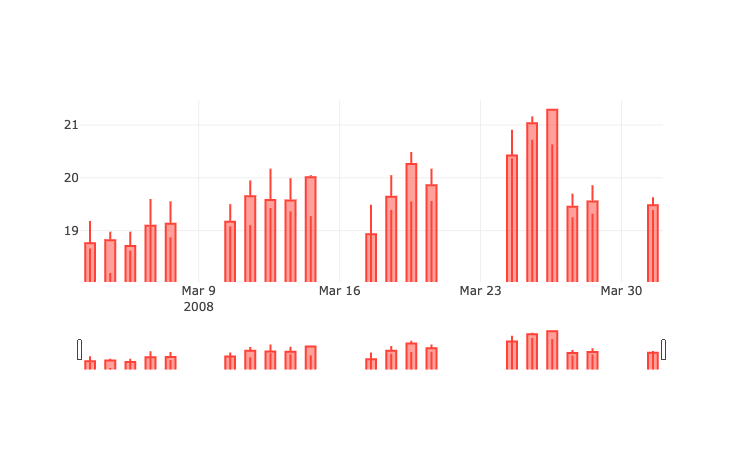

In [49]:
# Candlestick chart of march 2008
trace = go.Candlestick(x=oracle['03-2008'].index,
                open=oracle['03-2008'].Open,
                high=oracle['03-2008'].High,
                low=oracle['03-2008'].Low,
                close=oracle['03-2008'].Close)
data = [trace]
print('OHLC price chart (Candlestick) of Oracle for March 2008')
iplot(data, filename='simple_candlestick')

A candlestick chart for Oracle's stock price is created using the code snippet shown here. OHLC charts provide less detail on price movements than candlestick charts, which are commonly used in finance to display price fluctuations over time.

To create the chart, the plotly library is used, specifically the go.Candlestick() function. Several arguments are required to specify the data to be plotted, including the date index, the opening price, the high price, the low price, and the closing price.

A variable trace holds the candlestick chart, which is then added to a list called data. An interactive plot is then displayed by calling the iplot() function. The plot file name is specified by the filename argument.

A candlestick chart of Oracle's stock price for March 2008 will be displayed as a result of the code. Each day of the month, the chart displays the opening, high, low, and closing prices, as well as additional information about price movements, including the difference between opening and closing prices and the length of the "candlestick" bar, which shows the difference between high and low prices.

OHLC price chart (Candlestick) of Oracle for 2008


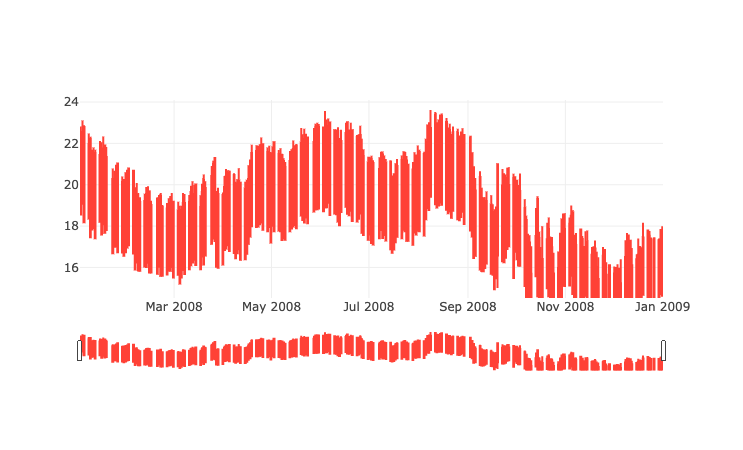

In [50]:
# Candlestick chart of 2008
trace = go.Candlestick(x=oracle['2008'].index,
                open=oracle['2008'].Open,
                high=oracle['2008'].High,
                low=oracle['2008'].Low,
                close=oracle['2008'].Close)
data = [trace]
print('OHLC price chart (Candlestick) of Oracle for 2008')
iplot(data, filename='simple_candlestick')

A candlestick chart of Oracle's stock price for the entire year 2008 is shown in the code snippet below. Candlestick charts provide more detail about price movements than OHLC charts when displaying price fluctuations in stocks over time.

In order to create the chart, plotly's go.Candlestick() function is used. In addition to the date index, the opening price, high price, low price, and closing price of the stock, the function takes several arguments to specify the data to be plotted.

Afterwards, a list called data is added to the variable trace, containing the candlestick chart. To display the chart interactively, the iplot() function is called. To specify the plot file name, use the filename argument.

As a result of the code, Oracle's stock price for 2008 will be displayed as a candlestick chart. The chart will display the opening, high, low, and closing prices for each day of the year, as well as additional information about price movements, including the difference between the opening and closing prices, and the duration of the candlestick bar, which represents the difference between the high and low prices.

OHLC price chart (Candlestick) of Oracle


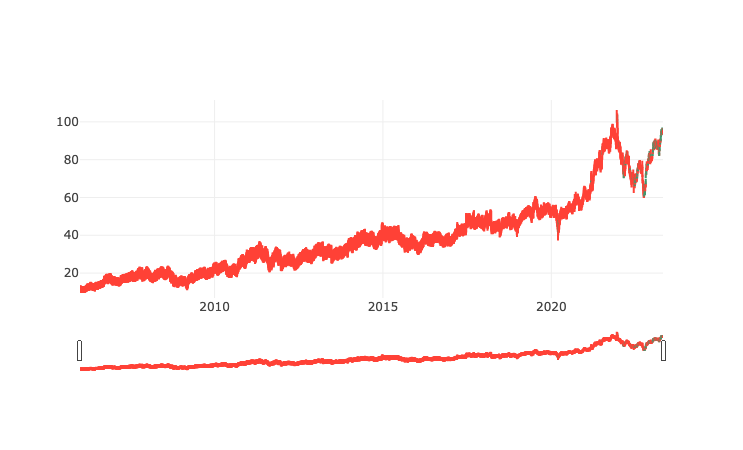

In [51]:
# Candlestick chart of 2006-2018
trace = go.Candlestick(x=oracle.index,
                open=oracle.Open,
                high=oracle.High,
                low=oracle.Low,
                close=oracle.Close)
data = [trace]
print('OHLC price chart (Candlestick) of Oracle')
iplot(data, filename='simple_candlestick')

The code snippet shown here is creating a candlestick chart for the entire available time period of the Oracle's stock price data (from 2006 to 2018). A candlestick chart provides more detail about price movements than an OHLC chart when displaying fluctuations in stock prices over time.

A candlestick chart is created using the plotly library's go.Candlestick() function. This function takes several arguments to specify the data to be plotted, including the date index, the opening price, the high price, the low price, and the closing price of the stock.

The resulting candlestick chart is stored in the variable trace, which is then added to a list called data. In order to display the chart in an interactive way, the iplot() function is called. Plot files can be named using the filename argument.

For the entire period available, Oracle's stock price will be displayed as a candlestick chart. Besides displaying the opening, high, low, and closing prices for each day, the chart also displays additional information about price movements, including the difference between opening and closing prices and the length of the candlestick bar, which represents the price difference between high and low prices.

## <a id='2.8'>2.8 Autocorrelation and Partial Autocorrelation</a>
* Autocorrelation - The autocorrelation function (ACF) measures how a series is correlated with itself at different lags.
* Partial Autocorrelation - The partial autocorrelation function can be interpreted as a regression of the series against its past lags.  The terms can be interpreted the same way as a standard  linear regression, that is the contribution of a change in that particular lag while holding others constant. 

Source: [Quora](https://www.quora.com/What-is-the-difference-among-auto-correlation-partial-auto-correlation-and-inverse-auto-correlation-while-modelling-an-ARIMA-series)

## Autocorrelation

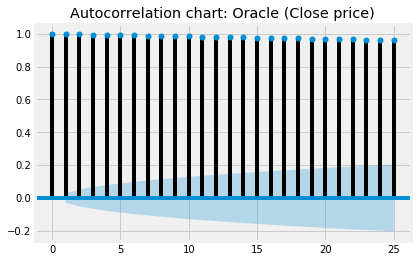

In [52]:
# Autocorrelation of Closing price of Oracle
plot_acf(oracle["Close"],lags=25,title="Autocorrelation chart: Oracle (Close price)")
plt.show()

Here is a code snippet that creates an autocorrelation chart for Oracle's stock closing price. A time series' autocorrelation is determined by a comparison of the lagged version of the series with the original. Autocorrelation charts display autocorrelation coefficients for each lag of a time series, which can assist in identifying trends and patterns.

To create the autocorrelation chart, the code uses the plot_acf() function from the statsmodels library. A time series chart is created by passing several arguments, including lags and the time series data. Using this chart, the autocorrelation coefficients for the first 25 lags will be displayed.

Each lag's autocorrelation coefficient will be displayed as a shaded region around the confidence intervals. 'Autocorrelation chart: Oracle (close price)' is the title of the chart. Matplotlib's plt.show() function is used to display the plot.

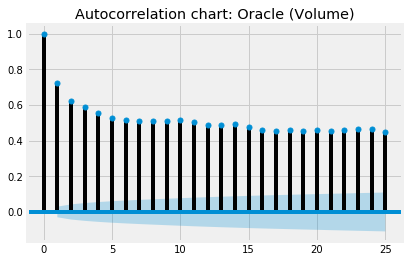

In [53]:
# Autocorrelation of Volume of Oracle stock
plot_acf(oracle["Volume"],lags=25,title="Autocorrelation chart: Oracle (Volume)")
plt.show()

Here is a code snippet for creating an autocorrelation chart for Oracle's stock volume. Autocorrelation is a measure of the correlation between two time series. Data can be analyzed using an autocorrelation chart to identify patterns and trends based on the autocorrelation coefficients for each lag.

Using the statsmodels library, the plot_acf() function is used to create the autocorrelation chart. Time series data and the number of lags to include in the chart are two of the arguments the function accepts. A chart displaying the autocorrelation coefficients for the first 25 lags will be displayed in this case.

Autocorrelation coefficients for each lag are displayed on the autocorrelation chart, along with confidence intervals. Autocorrelation chart: Oracle (Volume) is the title of the chart. Plots are displayed using the Matplotlib plt.show() function.

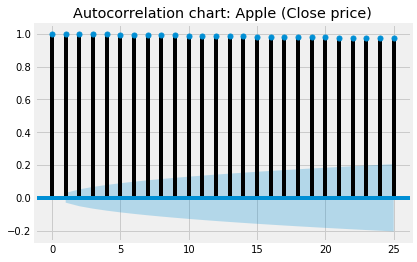

In [54]:
# Autocorrelation of Closing price of Apple
plot_acf(apple["Close"],lags=25,title="Autocorrelation chart: Apple (Close price)")
plt.show()

In this code snippet, we create an autocorrelation chart based on Apple's stock closing price. A time series' autocorrelation can be calculated by comparing it to its lagging version. In an autocorrelation chart, the autocorrelation coefficients are displayed for each lag of the time series, which can be used to identify patterns and trends.

Using the statsmodels library, the code creates the autocorrelation chart using plot_acf(). In addition to the time series data and the number of lags the chart should include, the function takes several arguments. This chart displays autocorrelation coefficients for the first 25 lags.

Each lag's autocorrelation coefficients will be displayed along with the confidence intervals as shaded regions on the autocorrelation chart. A correlation chart is included in the report titled "Apple (Close price) autocorrelation chart". By using the plt.show() function from Matplotlib, the plot is displayed.

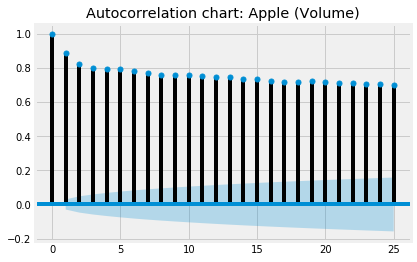

In [55]:
# Autocorrelation of Volume of Apple stock
plot_acf(apple["Volume"],lags=25,title="Autocorrelation chart: Apple (Volume)")
plt.show()

An autocorrelation chart is created for the volume of Apple's stock using the code snippet shown here. Autocorrelation measures the correlation between a time series and a lagged version of it. The autocorrelation chart shows the autocorrelation coefficients for each lag of the data series, allowing patterns and trends to be identified.

Using the statsmodels library, the plot_acf() function is used to create the autocorrelation chart. Time series data and the number of lags to include in the chart are two arguments that are passed to the function. A chart showing autocorrelation coefficients for the first 25 lags will be displayed in this case.

As a result, the autocorrelation chart will display the autocorrelation coefficients for each lag, as well as the confidence intervals surrounding each coefficient. "Autocorrelation chart: Apple (Volume)" is the title of the chart. Using the Matplotlib library, plt.show() is used to display the plot.

 As all lags are either close to 1 or at least greater than the confidence interval, they are statistically significant.

## Partial Autocorrelation

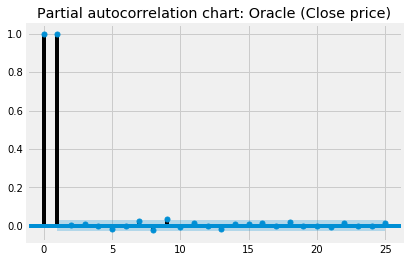

In [56]:
# Partial Autocorrelation of Closing price of Oracle
plot_pacf(oracle["Close"],lags=25, title="Partial autocorrelation chart: Oracle (Close price)")
plt.show()

An autocorrelation chart for Oracle's closing price is shown in the code snippet below. In partial autocorrelation, the correlation between a time series and a lagged version of itself is controlled for. Partial autocorrelation charts show the partial autocorrelation coefficients for each lag of the data, which can help identify patterns and trends.

To create the partial autocorrelation chart, the code uses the plot_pacf() function from the statsmodels library. Time series data, as well as lags to include in the chart, are provided as arguments to the function. A partial autocorrelation chart will display the coefficients for the first 25 lags in this case.

Each partial autocorrelation coefficient will be displayed on the partial autocorrelation chart along with its confidence intervals. Oracle (Close price) partial autocorrelation chart. A Matplotlib library function called plt.show() displays the plot.

Though it is statistically signficant, partial autocorrelation after first 2 lags is very low.

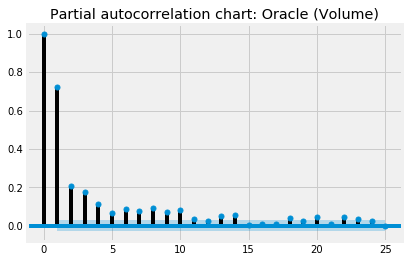

In [57]:
# Partial Autocorrelation of Volume of Oracle stock
plot_pacf(oracle["Volume"],lags=25, title="Partial autocorrelation chart: Oracle (Volume)")
plt.show()

Here is a code snippet that creates a partial autocorrelation chart for Oracle's stock volume. In partial autocorrelation, the correlation between two time series is controlled for other lag effects while taking into account the correlation between the two series. Data patterns and trends can be identified using partial autocorrelation charts, which display the partial autocorrelation coefficients for each lag.

The partial autocorrelation chart is created using the plot_pacf() function from the statsmodels library. Data from the time series and lags to include in the chart are provided as arguments to the function. For the first 25 lagged coefficients, the chart will display partial autocorrelation coefficients.

Each partial autocorrelation coefficient will be displayed on the partial autocorrelation chart, along with confidence intervals. This chart is titled "Partial autocorrelation chart: Oracle (Volume)". Using Matplotlib's plt.show() function, the plot is displayed.

In [58]:
# Partial Autocorrelation of closing price of Apple 
plot_pacf(apple["Close"],lags=25, title="Partial autocorrelation chart: Apple (Close price)")
plt.show()

This code snippet creates a partial autocorrelation chart based on Apple's closing price. In partial autocorrelation, lags are controlled for to measure the correlation between a time series and its lagged version. In a partial autocorrelation chart, the partial autocorrelation coefficients are shown for each lag of the time series, enabling patterns and trends to be identified.

The partial autocorrelation chart is created using the plot_pacf() function from the statsmodels library. Time series data and the number of lags to include in the chart are provided as arguments to the function. The chart will display the partial autocorrelation coefficients for the first 25 lags in this case.

Each partial autocorrelation coefficient will be displayed on the partial autocorrelation chart, along with confidence intervals. Apple (Close price) partial autocorrelation chart. In Matplotlib, the plt.show() function is used to display the plot.

Here, only 0th and 1st lag are statistically significant.

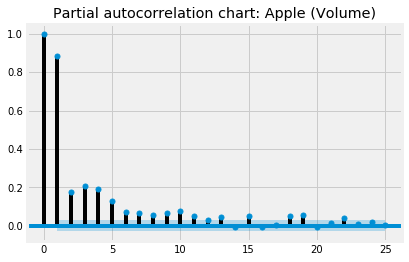

In [59]:
# Partial Autocorrelation of Volume of Apple stock
plot_pacf(apple["Volume"],lags=25, title="Partial autocorrelation chart: Apple (Volume)")
plt.show()

This code snippet creates a partial autocorrelation chart based on Apple's closing price. In partial autocorrelation, lags are controlled for to measure the correlation between a time series and its lagged version. In a partial autocorrelation chart, the partial autocorrelation coefficients are shown for each lag of the time series, enabling patterns and trends to be identified.

The partial autocorrelation chart is created using the plot_pacf() function from the statsmodels library. Time series data and the number of lags to include in the chart are provided as arguments to the function. The chart will display the partial autocorrelation coefficients for the first 25 lags in this case.

Each partial autocorrelation coefficient will be displayed on the partial autocorrelation chart, along with confidence intervals. Apple (Close price) partial autocorrelation chart. In Matplotlib, the plt.show() function is used to display the plot.

# <a id='3'>3. Time series decomposition and Random walks</a>

## <a id='3.1'>3.1. Trends, seasonality and noise</a>
These are the components of a time series
* Trend - Consistent upwards or downwards slope of a time series
* Seasonality - Clear periodic pattern of a time series(like sine funtion)
* Noise - Outliers or missing values

In [60]:
# Let's take Oracle stocks High for this
oracle["High"].plot(figsize=(16,8))
_ = plt.title('Comparing High price of Oracle over time')

Here is a code snippet which plots Oracle's stock's daily high prices over time. Only the "High" column is selected for this visualization from the original Oracle stock data frame.

Pandas library's plot() function is used to create the plot. Several arguments are passed to the function, including the plot size, in this case (16,8). From the Matplotlib library, plt.title() is used to set the plot's title.

The resulting plot will display the high prices of Oracle's stock over the available time period. A x-axis represents time, while a y-axis represents stock price. Over time, this visualization will provide insight into Oracle's stock price trends and fluctuations.

In [61]:
# Now, for decomposition...
print('Decomposing closing price of Oracle over time')
decomposed_oracle_close = sm.tsa.seasonal_decompose(oracle["Close"],freq=360) # The frequncy is annual
figure = decomposed_oracle_close.plot()
plt.show()

Decomposing closing price of Oracle over time


Here's a code snippet showing how Oracle's stock closing prices are decomposed over time. Time series decomposition involves breaking down a time series into its individual components, including trend, seasonality, and residuals (or errors).

For the decomposition, the statsmodels library's seasonal_decompose() function is used. In addition to the time series data, the function takes two arguments: the frequency and the time series data. It is assumed that the data is annual in this case because the frequency is set to 360.

Three components will be included in the decomposition: trend, seasonality, and residuals. In a figure, the plot() function visualizes the components of the decomposition. There will be four subplots in the resulting plot: the original time series, the trend component, the seasonal component, and the residual component. Decomposing Oracle's closing price over time is the title of the plot. The Matplotlib library provides plt.show() for displaying the plot.

In [62]:
# Now, for decomposition...
print('Decomposing volume data of Oracle over time')
decomposed_oracle_volume = sm.tsa.seasonal_decompose(oracle["Volume"],freq=360) # The frequncy is annual
figure = decomposed_oracle_volume.plot()
plt.show()

Decomposing volume data of Oracle over time


Here's a code snippet that performs time series decomposition on Oracle's daily volume data. Decomposition of time series is a statistical technique used to determine the trend, seasonality, and residual (error) components of a time series.

The seasonal_decompose() function is used to perform the decomposition in the code. A number of arguments are passed to the function, including the time series data and the frequency. Data is assumed to be annual in this case since the frequency is 360.

Trend, seasonality, and residuals will be included in the resulting decomposition. Using plot(), you can visualize the components of a decomposition. There will be four subplots in the resulting plot: the original time series, the trend component, the seasonal component, and the residual component. "Decomposing Oracle volume data over time" is the title of the plot. Matplotlib's plt.show() function displays the plot.

* There is clearly an upward trend in the above plot.
* You can also see the uniform seasonal change.
* Non-uniform noise that represent outliers and missing values

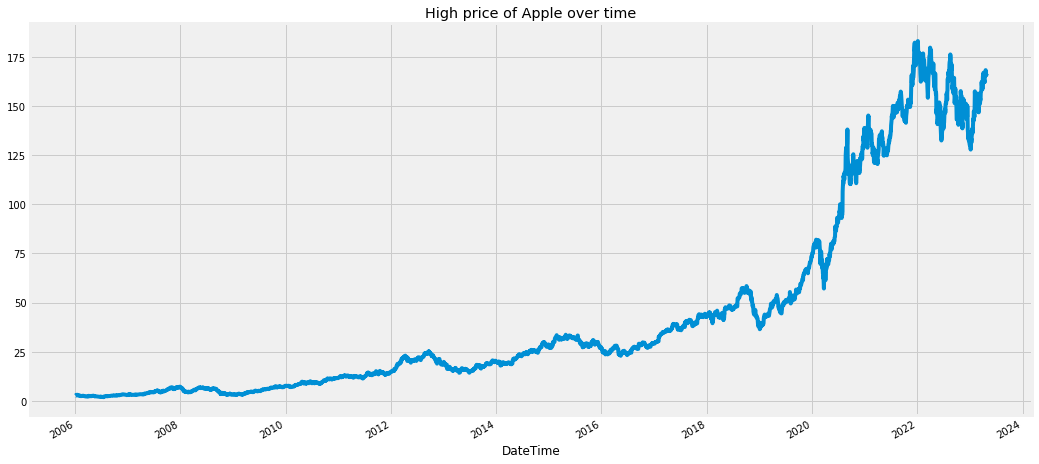

In [63]:
# Let's take Apple stocks High for this
apple["High"].plot(figsize=(16,8))
_ = plt.title('High price of Apple over time')

This code snippet plots Apple's stock price over time based on its daily high prices. In this visualization, only the "High" column is selected from the original Apple stock data frame.

To create the plot, the code uses the plot() function from the Pandas library. There are several arguments in the function, including the figure size, which in this case is (16,8). Matplotlib's plt.title() function sets the title of the plot.

Based on the available time period, the plot will display Apple's stock's high prices. Time will be represented by the x-axis, while stock price will be represented by the y-axis. Over time, this visualization will provide insights into Apple's high stock prices' trends and fluctuations.

Decomposing closing price of Apple over time


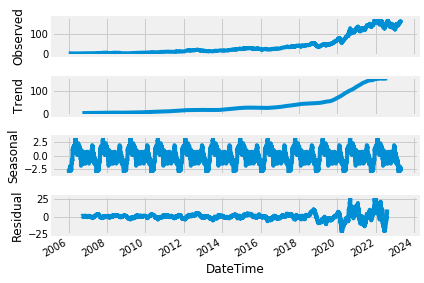

In [64]:
# Now, for decomposition...
print('Decomposing closing price of Apple over time')
decomposed_apple_close = sm.tsa.seasonal_decompose(apple["Close"],freq=360) # The frequncy is annual
figure = decomposed_apple_close.plot()
plt.show()

The code snippet shown here performs time series decomposition on Apple's daily closing prices. Time series decomposition involves breaking down a time series into its individual components, including trend, seasonality, and residuals (or errors).

To perform the decomposition, the code uses the seasonal_decompose() function from the statsmodels library. In addition to the time series data and the frequency of the data, the function takes several arguments. The frequency in this case is 360, which indicates annual data.

As a result, three components will be decomposed: trend, seasonality, and residuals. To visualize the decomposition components in a figure, use the plot() function. Four subplots will appear on the plot: the original time series, the trend component, the seasonal component, and the residual component. The plot is titled "Decomposing Apple's closing price over time". Using the Matplotlib library's plt.show() function, the plot is displayed.

In [65]:
# Now, for decomposition...
print('Decomposing volume data of Apple over time')
decomposed_apple_volume = sm.tsa.seasonal_decompose(apple["Volume"],freq=360) # The frequncy is annual
figure = decomposed_apple_volume.plot()
plt.show()

Decomposing volume data of Apple over time


A time series decomposition is performed on Apple's daily volume data in the code snippet shown here. In time series decomposition, trends, seasonality, and residuals (or errors) are broken down into their individual components.

To perform the decomposition, the code uses the seasonal_decompose() function in the statsmodels library. A time series data set and its frequency are the two arguments that the function takes. The frequency of this data is 360, which means that it is considered annual.

There will be three components in the resulting decomposition: trend, seasonality, and residuals. In a figure, plot() is used to visualize the decomposition components. Four subplots will be displayed in the plot: the original time series, the trend component, the seasonal component, and the residual component. Apple's volume data is decomposed over time in the plot titled "Decomposing volume data". The plot is displayed using the plt.show() function from the Matplotlib library.

## <a id='3.2'>3.2. White noise</a>
White noise has...
* Constant mean
* Constant variance
* Zero auto-correlation at all lags

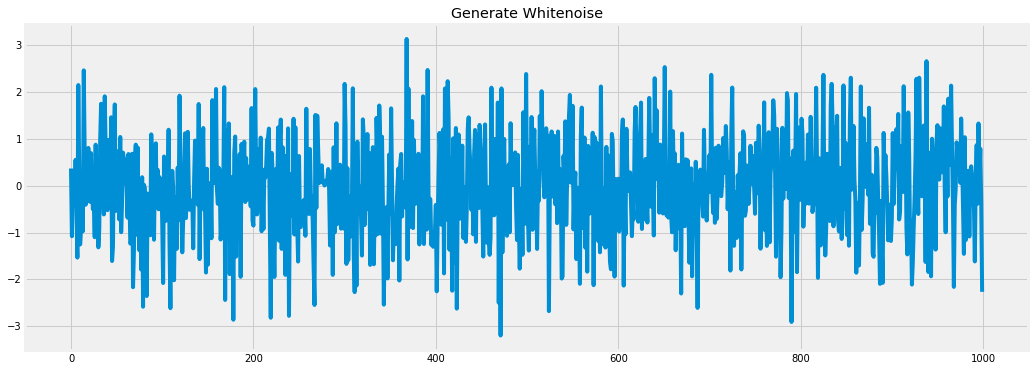

In [66]:
# Plotting white noise
rcParams['figure.figsize'] = 16, 6
white_noise = np.random.normal(loc=0, scale=1, size=1000)
_ = plt.title('Generate Whitenoise')
# loc is mean, scale is variance
plt.plot(white_noise)

In this code snippet, white noise is generated and plotted. A white noise signal has a constant power spectral density, which means that it has equal energy at all frequencies. This is a completely random signal with no pattern or structure.

To generate white noise, the code uses the np.random.normal() function from the NumPy library. In addition to the mean, standard deviation, and size of the distribution, the function takes several arguments. The mean is 0, the standard deviation is 1, and the size of the distribution is 1000.

Matplotlib's plt.plot() function is used to plot the white noise. Using the Matplotlib library's rcParams dictionary, the figure size is set. Plot titles are set with plt.title().

Plotting the resulting signal will reveal no pattern or structure. The x-axis represents time, while the y-axis represents signal value.

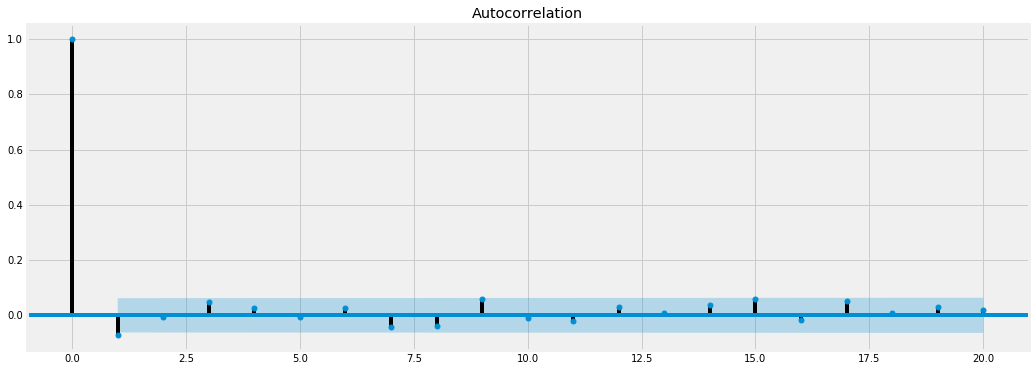

In [67]:
# Plotting autocorrelation of white noise
plot_acf(white_noise,lags=20)
plt.show()

The code snippet below plots the autocorrelation function (ACF) of white noise. A signal's autocorrelation is its correlation with itself at different time lags. It is used to identify patterns in time series data by plotting autocorrelation values for different time lags.

To plot the ACF of the white noise signal, the code uses the plot_acf() function from the statsmodels library. Time series data and the number of lags to include in the plot are among the arguments the function takes. The white noise signal is used as the time series data, and 20 lags are used.

In the resulting plot, you will see the ACF of the white noise signal. On the x-axis, the lag time will be represented, while on the y-axis, the autocorrelation value will be displayed. The autocorrelation values for white noise should be close to zero for all time lags, and the plot should not show any significant pattern.

See how all lags are statistically insigficant as they lie inside the confidence interval(shaded portion).

## <a id='3.3'>3.3. Random Walk</a>
A random walk is a mathematical object, known as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers. 

In general if we talk about stocks, Today's Price = Yesterday's Price + Noise

# P<sub>t</sub> = P<sub>t-1</sub> + ε<sub>t</sub> 

Random walks can't be forecasted because well, noise is random.

Random Walk with Drift(drift(μ) is zero-mean)
#### P<sub>t</sub> - P<sub>t-1</sub> = μ + ε<sub>t</sub> 
<br>
Regression test for random walk 
#### P<sub>t</sub> = α + βP<sub>t-1</sub> + ε<sub>t</sub>
#### Equivalent to  P<sub>t</sub> - P<sub>t-1</sub> = α + βP<sub>t-1</sub> + ε<sub>t</sub>
<br>
Test:
#### H<sub>0</sub>: β = 1 (This is a random walk)
#### H<sub>1</sub>: β < 1 (This is not a random walk)
<br>
Dickey-Fuller Test:
#### H<sub>0</sub>: β = 0 (This is a random walk)
#### H<sub>1</sub>: β < 0 (This is not a random walk)

### Augmented Dickey-Fuller test
An augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. It is basically Dickey-Fuller test with more lagged changes on RHS.

In [68]:
# Augmented Dickey-Fuller test on volume of Oracle and Apple stocks 
adf = adfuller(oracle["Volume"])
print("p-value of Oracle: {}".format(float(adf[1])))
adf = adfuller(apple["Volume"])
print("p-value of Apple: {}".format(float(adf[1])))

p-value of Oracle: 0.00018060197164768778
p-value of Apple: 0.030660988664595965


This code snippet performs the Augmented Dickey-Fuller (ADF) test on the volume data of Oracle and Apple stocks. ADF tests are used to determine whether a time series is stationary or not. Stationary time series have constant statistical properties over time, such as constant mean, variance, and autocorrelation, while non-stationary time series have changing statistical properties.

ADF tests are performed using the statsmodels library's adfuller() function. This function returns several statistical measures, including the p-value, based on the time series data. A p-value is a measure of the probability of observing the test statistic if the null hypothesis is true. It is assumed that the time series is non-stationary in this case.

With the print() function, the p-values of Oracle and Apple stocks are calculated using the ADF test. The null hypothesis is rejected if the p-value is less than 0.05 (the significance level), indicating that the series is stationary. The null hypothesis cannot be rejected when the p-value exceeds 0.05, indicating the time series is non-stationary.

##### As Oracle has p-value 0.001213832346694128 which is less than 0.05, null hypothesis is rejected and this is not a random walk.
##### Now Apple has p-value 0.03835813336541477 which is also less than 0.05, null hypothesis is rejected and this is not a random walk.

### Generating a random walk

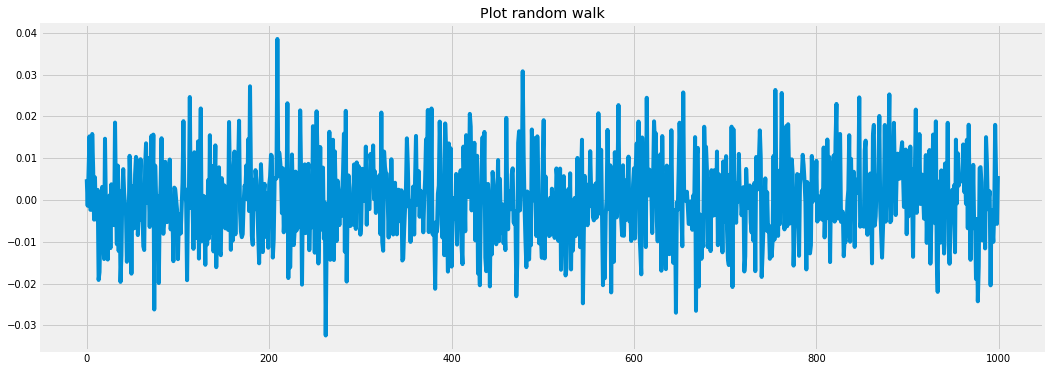

In [69]:
seed(42)
rcParams['figure.figsize'] = 16, 6
random_walk = normal(loc=0, scale=0.01, size=1000)
_ = plt.title('Plot random walk')
plt.plot(random_walk)
plt.show()

An example of generating and plotting a random walk is shown in the code snippet below. As a stochastic process, a random walk is a path that consists of a series of random steps. The direction and magnitude of each step are determined randomly.

Using the seed() function from the random module, the random seed is set to a fixed value (42 in this case). By doing this, the random numbers generated by the code can be reproduced.

A normal (Gaussian) distribution is generated using the normal() function from the NumPy library. In addition to the mean, standard deviation, and distribution size, the function takes several arguments. We set the mean to 0, the standard deviation to 0.01, and the size of the distribution to 1000.

With the Matplotlib library, the plt.plot() function is used to plot the random walk. This can be achieved by using the rcParams dictionary from the Matplotlib library to set the figure size. The plt.title() function sets the plot's title.

In the resulting plot, you will see a random walk with random steps or increments. Time will be represented by the x-axis, and the random walk value will be represented by the y-axis. The random walk will have no discernible pattern or structure because each step is determined randomly.

Random walk data distribution


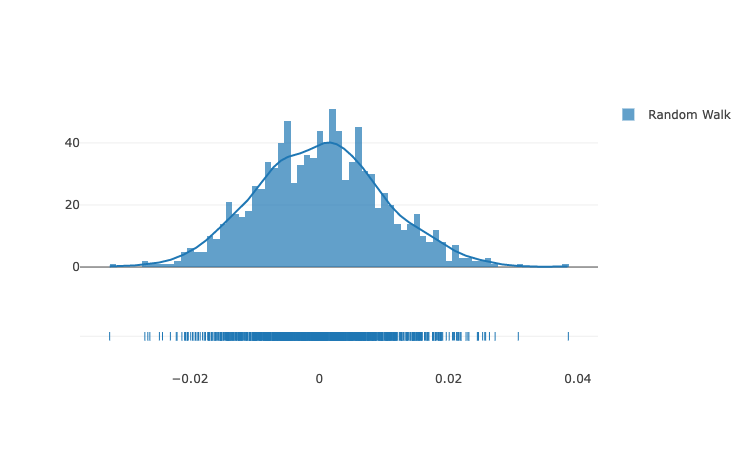

In [70]:
fig = ff.create_distplot([random_walk],['Random Walk'],bin_size=0.001)
print('Random walk data distribution')
iplot(fig, filename='Basic Distplot')

Here is a code snippet that creates and plots a probability distribution of random walk data. In a random process, a probability distribution describes the chances of different outcomes. Random walk data is described by a probability distribution, which describes the likelihood of different values.

The probability distribution plot was created using the plotly library's create_distplot() function. Plotting data, naming the data, and specifying the bin size are all arguments to this function. A random walk dataset is used in this case, and the data name is 'Random Walk'. Each bin in the histogram has a width of 0.001, determined by the bin size.

In the variable fig, we store the probability distribution plot. Plotly's iplot() function is used to display the plot in a Jupyter notebook. It is titled 'Random walk data distribution'.

In the resulting plot, the x-axis represents the value of the random walk, while the y-axis represents the frequency or probability of each value in the random walk. Probability distributions generated by random walks should also have a mean 0 and standard deviation 0.01, since the random walk is generated from a normal distribution.

## <a id='3.4'>3.4 Stationarity</a>
A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.
* Strong stationarity:  is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. Consequently, parameters such as mean and variance also do not change over time.
* Weak stationarity: is a process where mean, variance, autocorrelation are constant throughout the time

Stationarity is important as  non-stationary series that depend on time have too many parameters to account for when modelling the time series. diff() method can easily convert a non-stationary series to a stationary series.

We will try to decompose seasonal component of the above decomposed time series.

In [71]:
# The original non-stationary plot
decomposed_oracle_close.trend.plot()
_ = plt.title('Decomposed Oracle stock closing price over time')

This code snippet plots the trend component of the decomposed Oracle stock closing price data. Data trends are long-term patterns or trends in a time series, and they are usually non-stationary.

The code plots the trend component of the decomposed Oracle stock closing price data using the trend.plot() function from the seasonal decompose object. This plot shows the trend component of the data, with the x-axis representing the time period and the y-axis representing the trend value.

Before analyzing the data further, it is necessary to remove the trend component since it is non-stationary. By using techniques such as differencing or detrending, the data can be transformed into a stationary series.

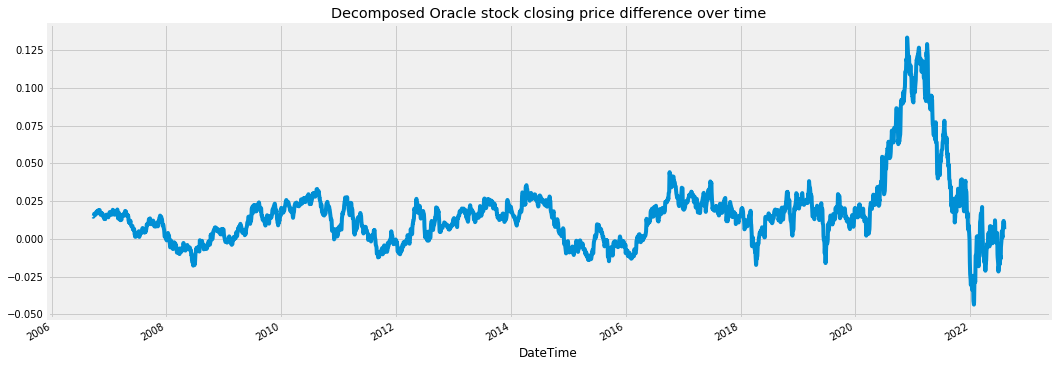

In [72]:
# The original non-stationary plot
decomposed_oracle_close.trend.diff().plot()
_ = plt.title('Decomposed Oracle stock closing price difference over time')

Here is a code snippet that plots the differenced trend component of Oracle stock closing prices. A non-stationary time series can be transformed into a stationary time series by computing the difference between consecutive observations.

The code uses the diff() function from the seasonal decompose object to calculate the difference between consecutive observations of the trend component of the decomposed Oracle stock closing price data. Plot() is then used to plot the differenced data. The resulting plot displays the differenced trend component of the data, with the x-axis representing the time period and the y-axis representing the value of the differenced trend component.

Time series analysis techniques such as autoregression and moving average can be used to analyze the data after differencing the trend component. By doing so, we are better able to forecast and predict the future behavior of the data.

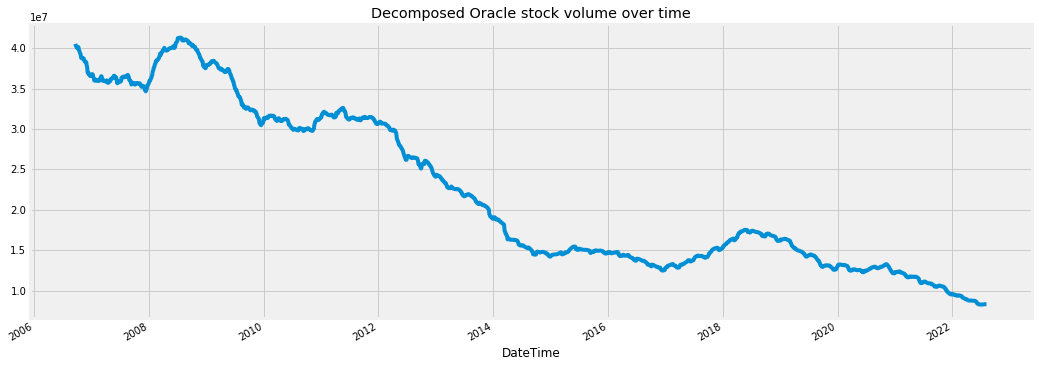

In [73]:
# The original non-stationary plot
decomposed_oracle_volume.trend.plot()
_ = plt.title('Decomposed Oracle stock volume over time')

A code snippet is shown here that plots the trend component of the decomposed Oracle stock volume data. A trend component in a time series represents the long-term pattern or trend in the data, and it is usually non-stationary.

To plot the trend component of the decomposed Oracle stock volume data, the trend.plot() function is used from the seasonal decompose object created earlier. The resulting plot displays the trend component of the data, with the x-axis representing the time period and the y-axis representing the trend value.

It is important to remove the trend component from the data before performing any further analysis since it is non-stationary. Data can be transformed into stationary time series using techniques such as differencing and detrending.

In [74]:
# The original non-stationary plot
decomposed_oracle_volume.trend.diff().plot()
_ = plt.title('Decomposed Oracle stock volume difference over time')

The code snippet here plots the decomposed Oracle stock volume data's differenced trend component. By computing the difference between consecutive observations, a non-stationary time series can be transformed into a stationary time series.

To compute the difference between consecutive observations of the trend component of the decomposed Oracle stock volume data, the code uses the diff() function from the seasonal decompose object. Using the plot() function, the differenced data is then plotted. Data will be plotted with the x-axis representing the time period and the y-axis representing the value of the differenced trend component.

We have transformed the trend component of the data into a stationary time series that can be analyzed using time series analysis techniques like autoregression and moving averages. By doing so, we can make more accurate predictions about how the data will behave in the future.

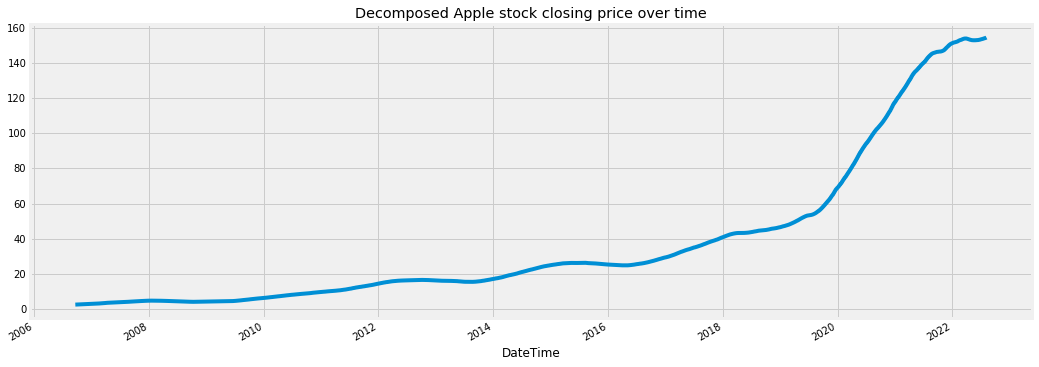

In [75]:
# The new stationary plot
decomposed_apple_close.trend.plot()
_ = plt.title('Decomposed Apple stock closing price over time')

This code snippet plots the trend component of the decomposed Apple stock closing price data. Time series trend components depict long-term patterns or trends in the data, and they are usually non-stationary.

The code plots the trend component of the decomposed Apple stock closing price data using the trend.plot() function from the seasonal decompose object. This plot will represent the trend component of the data, with the x-axis representing the time period and the y-axis representing the trend value.

Before performing any further analysis, it is important to remove the trend component since it is non-stationary. The data can be transformed into a stationary time series using techniques such as differencing or detrending.

In [76]:
# The new stationary plot
decomposed_apple_close.trend.diff().plot()
_ = plt.title('Decomposed Apple stock closing price difference over time')

This code snippet plots the differenced trend component of the decomposed Apple stock closing price data. By computing the difference between consecutive observations, a non-stationary time series can be transformed into a stationary one.

Using the diff() function from the seasonal decompose object created earlier, the code computes the difference between consecutive observations of the trend component of the decomposed Apple stock closing price data. Plot() is then used to plot the differenced data. With the x-axis representing the time period and the y-axis representing the value of the differenced trend component, the plot will display the differenced trend component of the data.

Differentiating the trend component of the data has transformed it into a stationary time series that can be analyzed using time series analysis techniques such as autoregression and moving averages. As a result, we can make more accurate forecasts and predictions about the future behavior of the data.

In [77]:
# The new stationary plot
decomposed_apple_volume.trend.plot()
_ = plt.title('Decomposed Apple stock volume over time')

This code snippet plots the trend component of the decomposed Apple stock volume data. In most time series, the trend component represents the long-term pattern or trend in the data, and it is usually non-stationary.

This code plots the trend component of the decomposed Apple stock volume data using the trend.plot() function from the seasonal decompose object. This plot will display the trend component of the data, with the x-axis representing the time period and the y-axis representing the value of the trend component.

Before performing any further analysis, it is important to remove the trend component from the data since it is non-stationary. Detrending or differencing can be used to transform the data into a stationary time series.

In [78]:
# The new stationary plot
decomposed_apple_volume.trend.diff().plot()
_ = plt.title('Decomposed Apple stock volume difference over time')

This code snippet plots the differenced trend component of the decomposed Apple stock volume data. The difference between consecutive observations is used to transform a non-stationary time series into a stationary one.

Decomposed Apple stock volume data is computed using the diff() function from the seasonal decompose object. A plot() function is used to display the resulting differenced data. The resulting plot displays the differenced trend component of the data, with the x-axis representing the time period and the y-axis representing the value of the differenced trend component.

As a result of differencing the trend component of the data, we have converted it into a stationary time series that can be analyzed using time series analysis techniques such as autoregression and moving averages. As a result, we can make more accurate forecasts and predictions about the data's future behavior.

# <a id='4'>4. Modelling using statstools</a>

## <a id='4.1'>4.1 AR models</a>
 An autoregressive (AR) model is a representation of a type of random process; as such, it is used to describe certain time-varying processes in nature, economics, etc. The autoregressive model specifies that the output variable depends linearly on its own previous values and on a stochastic term (an imperfectly predictable term); thus the model is in the form of a stochastic difference equation.
 #### AR(1) model
 R<sub>t</sub> = μ + ϕR<sub>t-1</sub> + ε<sub>t</sub>
 ##### As RHS has only one lagged value(R<sub>t-1</sub>)this is called AR model of order 1 where μ is mean and ε is noise at time t
 If ϕ = 1, it is random walk. Else if ϕ = 0, it is white noise. Else if -1 < ϕ < 1, it is stationary. If ϕ is -ve, there is men reversion. If ϕ is +ve, there is momentum.
 #### AR(2) model
 R<sub>t</sub> = μ + ϕ<sub>1</sub>R<sub>t-1</sub> + ϕ<sub>2</sub>R<sub>t-2</sub> + ε<sub>t</sub>
 #### AR(3) model
 R<sub>t</sub> = μ + ϕ<sub>1</sub>R<sub>t-1</sub> + ϕ<sub>2</sub>R<sub>t-2</sub> + ϕ<sub>3</sub>R<sub>t-3</sub> + ε<sub>t</sub>

## Simulating AR(1) model

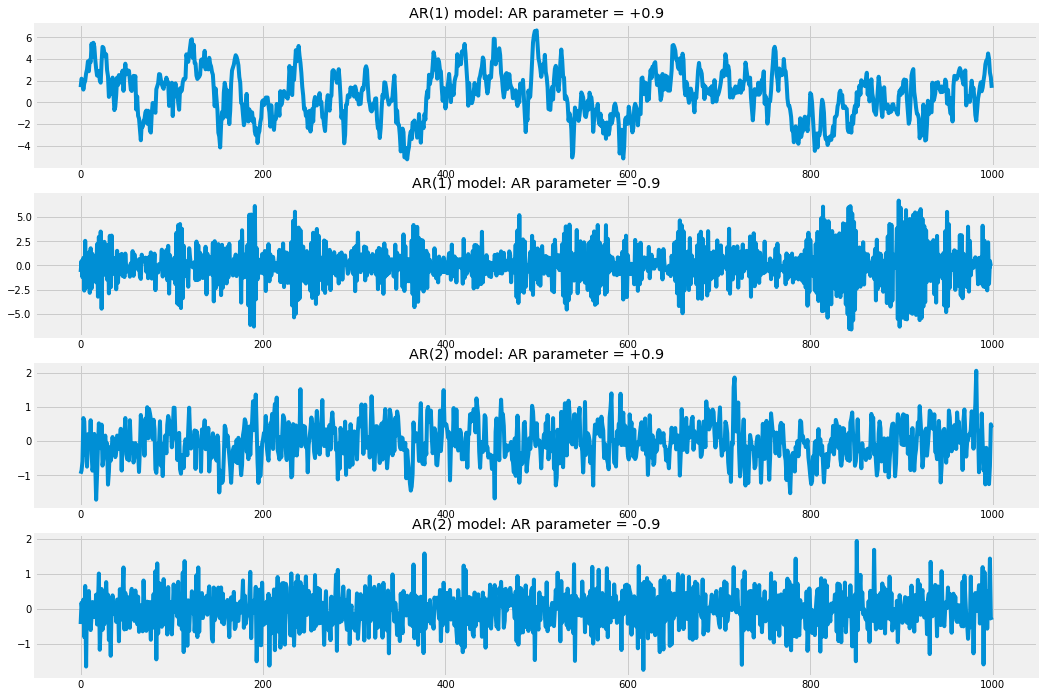

In [79]:
# AR(1) MA(1) model:AR parameter = +0.9
rcParams['figure.figsize'] = 16, 12
plt.subplot(4,1,1)
ar1 = np.array([1, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)
# We will take care of MA model later
# AR(1) MA(1) AR parameter = -0.9
plt.subplot(4,1,2)
ar2 = np.array([1, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = -0.9')
plt.plot(sim2)
# AR(2) MA(1) AR parameter = 0.9
plt.subplot(4,1,3)
ar3 = np.array([2, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = +0.9')
plt.plot(sim3)
# AR(2) MA(1) AR parameter = -0.9
plt.subplot(4,1,4)
ar4 = np.array([2, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = -0.9')
plt.plot(sim4)
plt.show()

This code generates and plots four different ARMA (Autoregressive Moving Average) time series models, each with different AR parameters and the same MA(1) parameter.

Each model's simulated data is generated using the ArmaProcess class from the statsmodels library. The generated samples are stored in the variables sim1, sim2, sim3, and sim4.

Matplotlib's subplot() function is then used to create a grid of four subplots each displaying one of the four generated time series. Each of the four generated time series is plotted on the corresponding subplot using the plot() function.

AR(1) and AR(2) have AR parameters of 0.9 and -0.9, respectively, while AR(1) and AR(2) have AR parameters of +0.9 and -0.9, respectively. Different ARMA models generate different patterns of autocorrelation based on their AR parameter sign and value, which affects the time series' stationarity and behavior.

## Forecasting a simulated model

In [80]:
model = ARMA(sim1, order=(1,0))
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1415.701
Method:                       css-mle   S.D. of innovations              0.996
Date:                Wed, 26 Apr 2023   AIC                           2837.403
Time:                        17:54:21   BIC                           2852.126
Sample:                             0   HQIC                          2842.998
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7072      0.288      2.454      0.014       0.142       1.272
ar.L1.y        0.8916      0.014     62.742      0.000       0.864       0.919
                                    Roots           

Sim1 time series are fitted with an ARMA (Autoregressive Moving Average) model using the ARMA class from statsmodels. A model with an AR parameter and zero MA parameters is specified by the (1,0) argument passed to the order parameter.

The summary() method is used to print out a summary of the model's statistics after fitting it with the fit() method, including the estimated coefficients and their significance levels, the Akaike Information Criterion (AIC), and the Bayesian Information Criterion (BIC).

Following the model fitting, the code prints out the estimated intercept and AR parameters.

ϕ is around 0.9 which is what we chose as AR parameter in our first simulated model.

## Predicting the models

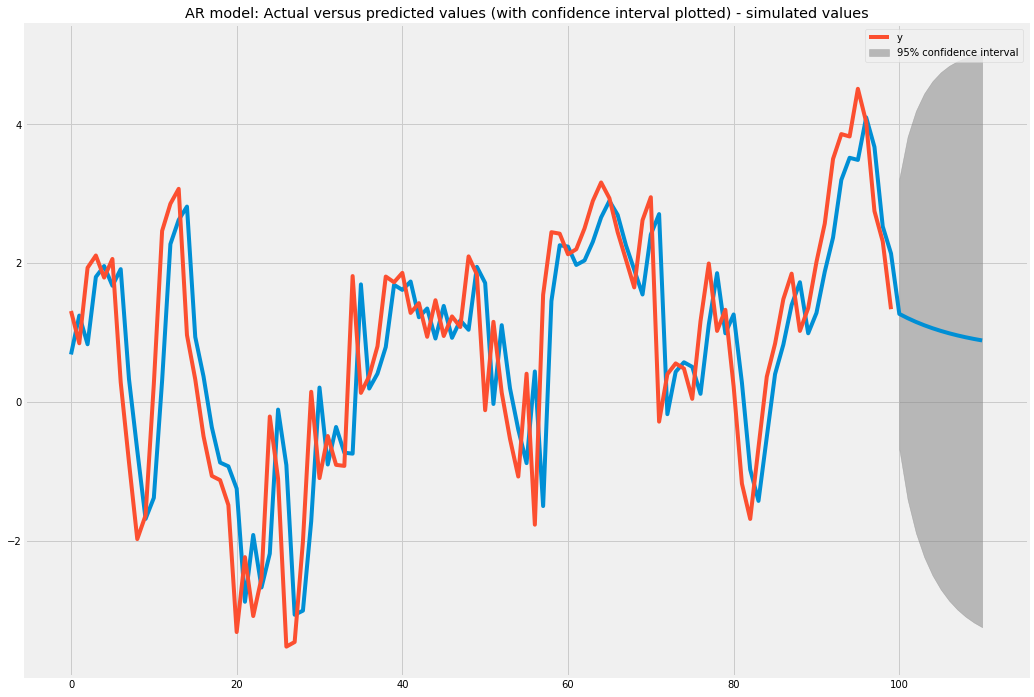

In [81]:
# Predicting simulated AR(1) model 
result.plot_predict(start=900, end=1010)
_ = plt.title('AR model: Actual versus predicted values (with confidence interval plotted) - simulated values')
plt.show()

For the simulated AR(1) model (sim1) from time index 900 to 1010, this code uses the plot_predict() method of the ARMA model fitted in the previous code block. The start and end arguments specify the time range for which predictions are to be generated.

Blue represents the actual values of the time series (sim1), while red represents the predicted values. In the shaded gray area around the predicted values, you can see the confidence interval for the predictions. This plot compares actual to predicted values for the simulated values, as indicated by its title.

In [82]:
rmse = math.sqrt(mean_squared_error(sim1[900:1011], result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 1.0408054544358292.


The code calculates the root mean squared error (RMSE) between the actual values of the simulated AR(1) model (sim1) and the predicted values generated by the ARMA model fitted in the previous code block. A mean square error between actual and predicted values over the time range specified by start and end is calculated using the mean_squared_error() function from the sklearn.metrics module.

Calculated by taking the square root of the mean of the squared differences between the predicted and actual values, the RMSE measures the difference between the predicted and actual values. Prediction accuracy can be assessed using this metric. RMSE is printed to the console as a result.

y is predicted plot. Quite neat!

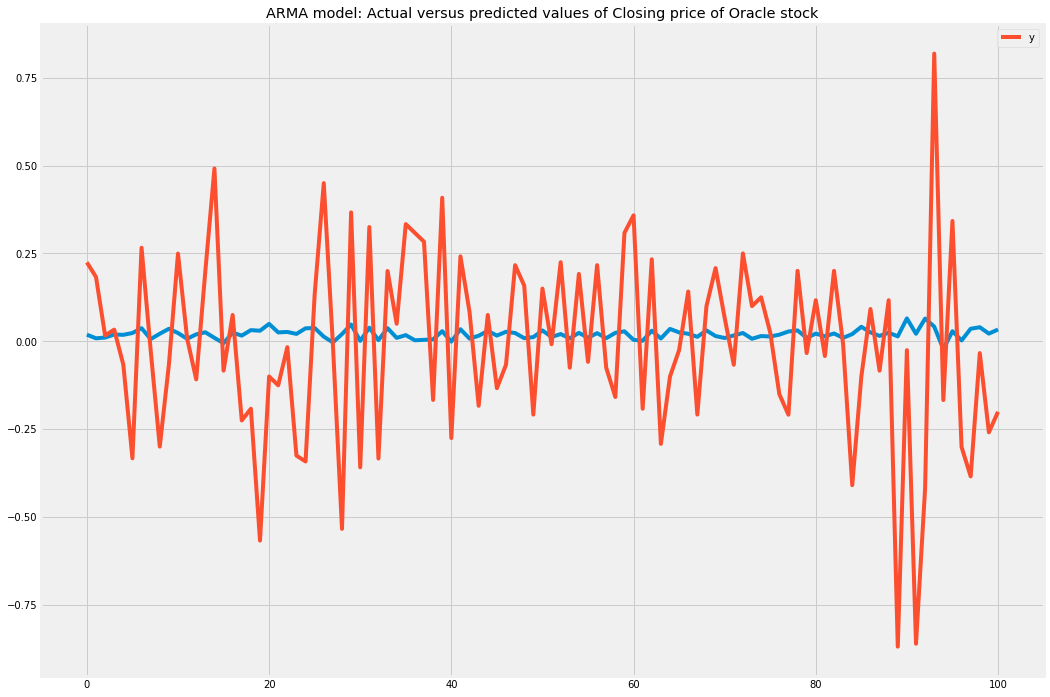

In [83]:
# Predicting Close price of Oracle
close_price = ARMA(oracle["Close"].diff().iloc[1:].values, order=(1,0))
res = close_price.fit()
res.plot_predict(start=1000, end=1100)
_ = plt.title('ARMA model: Actual versus predicted values of Closing price of Oracle stock')
plt.show()

Using Oracle stock closing price data, this code performs time series analysis. In order to fit the differenced closing price data (obtained by using the diff() function after the first element, an ARMA model is used (with order (1,0)). With the plot_predict() function, it predicts the closing price between index 1000 and index 1100. Lastly, a confidence interval is plotted along with the actual and predicted closing price values.

In [84]:
rmse = math.sqrt(mean_squared_error(oracle["Close"].diff().iloc[900:1000].values, result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 1.7511939730902073.


This code calculates the root mean square error (RMSE) between the actual and predicted closing prices of Oracle stock starting at the 900th index to the 1000th index. To calculate the mean squared error (MSE) between actual and predicted values, we use the mean_squared_error() function from the sklearn.metrics module. In order to calculate the RMSE, we use the math.sqrt() function. The print() function is used to print the RMSE. Model accuracy is determined by the RMSE, which measures the difference between predicted and actual values. Lower values indicate better accuracy.

In [85]:
# Predicting Volume of Oracle
volume = ARMA(oracle["Volume"].diff().iloc[1:].values, order=(1,0))
res = volume.fit()
res.plot_predict(start=1000, end=1100)
_ = plt.title('ARMA model: Actual versus predicted values of volume of Oracle stock')
plt.show()

Using the ARMA function from the statsmodels library, this code creates an ARMA model for Oracle stock volume data. There is only one AR parameter and no MA parameter in the model because it is defined with an order of (1,0). As an input to the fit function, the volume difference is passed to the model. Using plot_predict, Oracle stock volume is plotted against predicted values for time steps 1000 to 1100, with predicted values shown for all time steps. Plt.show() is used to display the plot.

In [86]:
rmse = math.sqrt(mean_squared_error(oracle["Volume"].diff().iloc[900:1000].values, result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 13682916.453458484.


This code snippet computes the Root Mean Squared Error (RMSE) between actual and predicted values for a time series. It calculates the RMSE between the differenced "Volume" data of a time series (starting from the 900th data point and ending at the 999th data point) and the predicted values generated by a model for the same period.

The following is a step-by-step breakdown of the code:

First, the code imports the necessary libraries, such as the "math" library for computing the square root and the "mean_squared_error" function from the "sklearn.metrics" library for calculating the mean squared error.
Second, the code computes the mean squared error between the differenced volume data of a time series (starting from the 900th data point and ending at the 999th data point) and the predicted values of the same time period. A time series' actual values are stored in the "oracle" dataframe, which is assumed to be previously defined. "Result" is assumed to be the fitted model object that generates the predicted values.
In step 2, the mean squared error was calculated. The third line of code computes the square root of that error. RMSE is calculated this way.
In line four, the computed RMSE value is displayed using string formatting.
Using the mean squared error function, this code snippet calculates the RMSE between the actual and predicted values of a time series.

 Not quite impressive. But let's try Apple stocks. 

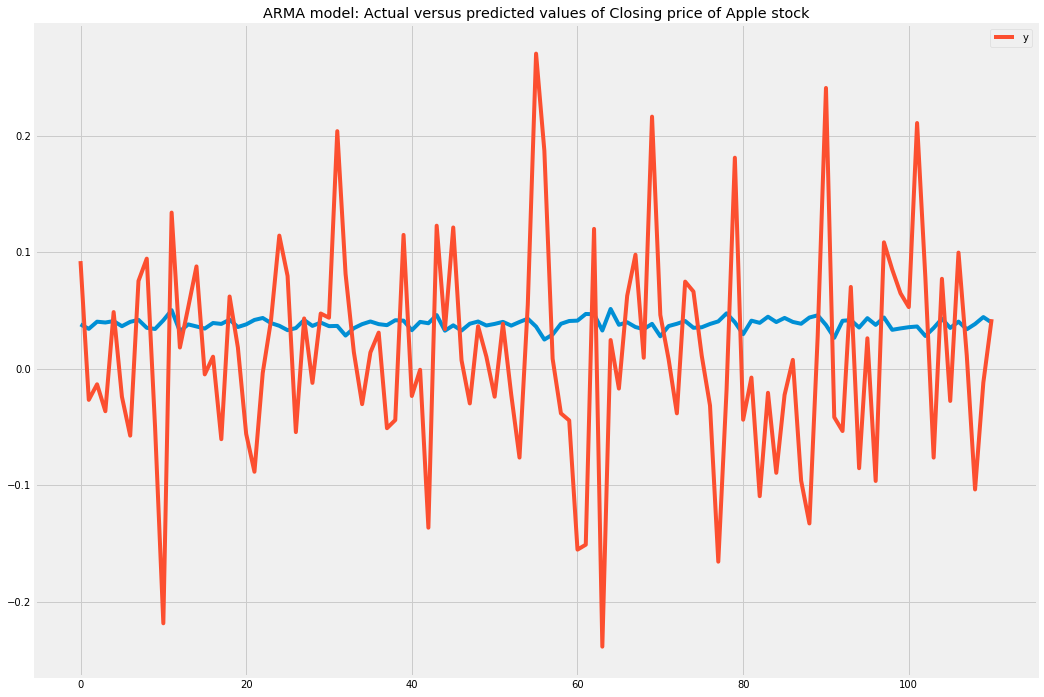

In [87]:
# Predicting closing prices of Apple
close_price = ARMA(apple["Close"].diff().iloc[1:].values, order=(1,0))
res = close_price.fit()
res.plot_predict(start=900, end=1010)
_ = plt.title('ARMA model: Actual versus predicted values of Closing price of Apple stock')
plt.show()

Here is a code snippet that builds and visualizes an Autoregressive Moving Average (ARMA) model to predict Apple stock closing prices.

The code is broken down into steps as follows:

In the first line of code, the ARMA model is assigned to the variable "close_price". It is assumed that the "apple" dataframe was previously defined and contains Apple stock closing prices. In order to make the time series stationary, the ".diff()" function calculates the first-order difference of the closing prices. Due to differencing, the first observation is removed using the ".iloc[1:]" function. One autoregressive term and zero moving average terms are included in the ARMA model, whose order is (1,0).
A second line of code fits the ARMA model to the differenced closing price data and saves the result in the "res" variable.
The third line of code generates a plot of Apple stock's actual closing price and predicted closing price using the "plot_predict()" function. The "start" and "end" parameters specify the range of time series to be plotted, which are respectively 900 and 1010. To generate the predicted values, we use the "res" object from the previous step.
In the fourth line of code, the plot's title is set.
In the fifth line of code, the plot is displayed using the "plt.show()" function.
The code snippet plots the actual and predicted closing prices of Apple stock using an ARMA model. Plot_predict() generates predicted values from the ARMA model fit to differenced closing price data. This plot is displayed using the "plt.show()" function.

In [88]:
rmse = math.sqrt(mean_squared_error(apple["Close"].diff().iloc[900:1000].values, result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 1.7453154450152903.


Based on an ARMA model, RMSE is calculated between Apple stock's actual closing price and its predicted closing price. Model accuracy is measured by the RMSE, a common evaluation metric.

The code is broken down into the following steps:

This code imports the necessary libraries, including the math library for computing the square root and the sklearn.metrics library's mean_squared_error function for calculating the mean squared error.
In the second line of code, the mean squared error is calculated between the differenced closing prices for Apple stock (beginning at the 900th data point and ending at the 999th data point) and the predicted values generated by the ARMA model. Apple's closing prices are contained in the "apple" dataframe, which is assumed to be previously defined. To make the time series stationary, the ".diff()" function calculates the first-order difference of the closing prices. The "result" object represents the predicted values generated by the fitted ARMA model.
In step 2, the mean squared error is calculated and then the square root is calculated. As a result, we have the root mean square error.
The computed RMSE value is printed using string formatting on the fourth line.
The code calculates the RMSE between Apple stock's actual and predicted closing prices using an ARMA model. The RMSE is calculated by calculating the mean squared error and taking the square root. In the end, it prints the RMSE value. Predictive models perform better when the RMSE is lower.

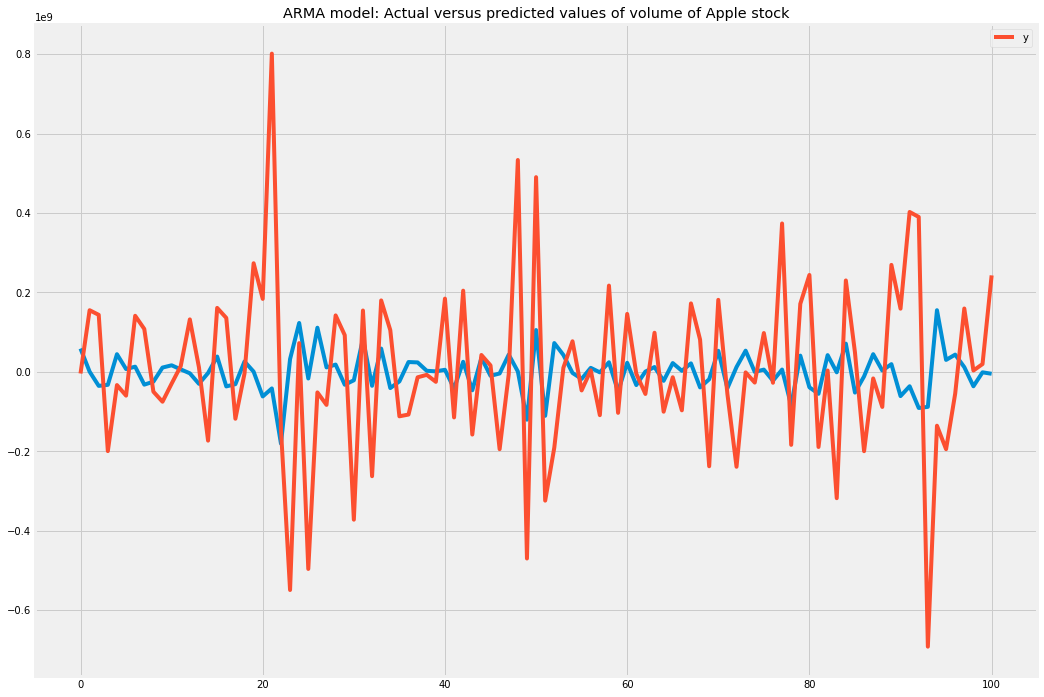

In [89]:
# Predicting Volume of Apple
volume = ARMA(apple["Volume"].diff().iloc[1:].values, order=(1,0))
res = volume.fit()
res.plot_predict(start=1000, end=1100)
_ = plt.title('ARMA model: Actual versus predicted values of volume of Apple stock')
plt.show()

This code snippet builds and visualizes an Autoregressive Moving Average (ARMA) model to predict Apple stock volume.

The following is a step-by-step breakdown of the code:

The first line of code defines a variable called "volume" and assigns an ARMA model to it. It is assumed that the "apple" dataframe was previously defined and contains Apple stock volume data. To make the time series stationary, the ".diff()" function calculates a first-order difference between the volume data. Due to differencing, the first observation is removed using the ".iloc[1:]" function. In the ARMA model, the order is (1,0), which means it includes one autoregressive term and zero moving average terms.
As a result, the second line of code fits the ARMA model to the differenced volume data and saves the result in the "res" variable.
To plot actual and predicted volume data for Apple stock, the third line of code uses the plot_predict() function. Specifies the range of time series to be plotted by setting the "start" and "end" parameters to 1000 and 1100, respectively. During the previous step, the "res" object was used to generate the predicted values.
In the fourth line of code, the plot title is set.
Plots are displayed using the "plt.show()" function in the fifth line of code.
Using an ARMA model, this code generates a plot of actual and predicted Apple stock volume. The "plot_predict()" function generates the predicted values based on the ARMA model fit to the differenced volume data. "plt.show()" is used to display the plot.

In [90]:
rmse = math.sqrt(mean_squared_error(apple["Volume"].diff().iloc[900:1000].values, result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 155393298.3070032.


Based on the actual Apple stock volume and the predicted volume, this code snippet computes the Root Mean Squared Error (RMSE). ARMA models are fitted to differenced volume data to generate predicted values.

Here's how the code is broken down:

Using the "math" library for computing the square root and the "mean_squared_error" function from the "sklearn.metrics" library to calculate the average squared error, the first line of code imports the necessary libraries.
The second line of code calculates the mean squared error between the differenced volume data for Apple stock (starting from the 900th data point and ending at the 999th data point) and the ARMA model predictions for the same time period. It is assumed that the "apple" dataframe has previously been defined, and it contains Apple stock volume data. ".diff()" calculates the first-order difference between the volume data, which makes the time series stationary. ARMA model results are assumed to be stored in the "result" object.
In step 2, the mean squared error is calculated, and the third line of code calculates its square root. In this way, we can calculate the root mean square error.
To display the computed RMSE value, the fourth line uses string formatting.
An ARMA model is fitted to the differenced volume data in this code snippet to calculate the RMSE between the actual and predicted volume data of Apple stock. A mean squared error function is used to calculate the RMSE then the result is printed. Lower RMSE values indicate better performance of the ARMA model in predicting volume data.

There are always better models.

## <a id='4.2'>4.2 MA models</a>
The moving-average (MA) model is a common approach for modeling univariate time series. The moving-average model specifies that the output variable depends linearly on the current and various past values of a stochastic (imperfectly predictable) term.
#### MA(1) model
R<sub>t</sub> = μ  +  ϵ<sub>t</sub>1 + θϵ<sub>t-1</sub>

It translates to Today's returns = mean + today's noise + yesterday's noise
##### As there is only 1 lagged value in RHS, it is an MA model of order 1

## Simulating MA(1) model

In [91]:
rcParams['figure.figsize'] = 16, 6
ar1 = np.array([1])
ma1 = np.array([1, -0.5])
MA1 = ArmaProcess(ar1, ma1)
sim1 = MA1.generate_sample(nsample=1000)
_ = plt.title('ARMA generated sample')
plt.plot(sim1)

An Autoregressive Moving Average (ARMA) process is used to create and plot a time series sample. "ar1" and "ma1" arrays represent AR and MA coefficients, respectively, in the ARMA process. With the "generate_sample()" function of the "ArmaProcess" object, the ARMA process generates a 1000-point time series sample. Finally, the plot is titled "ARMA generated sample" and plotted using the "plt.plot()" function. Matplotlib's "rcParams" function sets the default figure size to 16 inches in width and 6 inches in height. Statistical models or forecasting methods can be tested using this generated time series.

## Forecasting the simulated MA model

In [92]:
model = ARMA(sim1, order=(0,1))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1423.276
Method:                       css-mle   S.D. of innovations              1.004
Date:                Wed, 26 Apr 2023   AIC                           2852.553
Time:                        17:54:24   BIC                           2867.276
Sample:                             0   HQIC                          2858.148
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0228      0.014     -1.652      0.099      -0.050       0.004
ma.L1.y       -0.5650      0.027    -20.797      0.000      -0.618      -0.512
                                    Roots           

This code generates an Autoregressive Moving Average (ARMA) model of a given time series sample, estimates the parameters of the model, and prints a summary of the model fit. Modeling is done using the "ARMA" function from the "statsmodels.tsa.arima_model" library, with the time series sample "sim1" as the input and the order set to (0,1), indicating there is no autoregressive term and one moving average term. Using the input time series sample as input, the "fit()" method of the model is used to estimate its parameters. "summary()" and "print()" methods are used to display estimated parameters and model fit information. As a final step, the estimated model parameters are displayed using string formatting, with the mean and moving average parameters stored in "result.params[0]" and "result.params[1]", respectively. The code can be used to understand the properties of a time series sample and to select an appropriate ARMA model.

## Prediction using MA models

In [93]:
# Forecasting and predicting Closing price of Oracle
model = ARMA(oracle["Close"].diff().iloc[1:].values, order=(0,3))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))
result.plot_predict(start=1000, end=1100)
_ = plt.title('ARMA model: predicting Closing price of Oracle stock')
plt.show()

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 4356
Model:                     ARMA(0, 3)   Log Likelihood               -4702.137
Method:                       css-mle   S.D. of innovations              0.712
Date:                Wed, 26 Apr 2023   AIC                           9414.274
Time:                        17:54:24   BIC                           9446.170
Sample:                             0   HQIC                          9425.531
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0192      0.010      1.887      0.059      -0.001       0.039
ma.L1.y       -0.0527      0.015     -3.478      0.001      -0.082      -0.023
ma.L2.y       -0.0134      0.015     -0.890      0.3

In this code, an Autoregressive Moving Average (ARMA) model is fitted to the differenced closing price data of Oracle stock, and the fitted model is used to predict closing prices.

The following is a step-by-step breakdown of the code:

ARMA model object "model" is created for differenced closing prices of Oracle stock in the first line of code. Oracle's closing prices are contained in the "oracle" dataframe, which is assumed to be previously defined. To make the time series stationary, the ".diff()" function calculates the first-order difference between the closing prices. As a result of differencing, the first observation is removed using the ".iloc[1:]" function. In the ARMA model, the order is (0,3), which means there are no autoregressive terms and three moving averages.
In the second line of code, the ARMA model is fitted to the differenced closing prices and the result is saved in the "result" variable.
With the "summary()" method of the "result" object, the third line of code prints a summary of the model fit.
In the fourth line of code, the estimated mean and moving average parameters of the fitted model are printed using string formatting.
To plot the actual and predicted closing prices for the range of 1000 to 1100, the fifth line of code uses the "plot_predict()" function of the "result" object.
In line six, the plot's title is set.
Plots are displayed using the "plt.show()" function in the seventh line.
This code snippet fits an ARMA model to the differenced closing prices of Oracle stock, plots the predicted and actual closing prices for a specified time range, and prints the estimated parameters and summary of the fitted model. Using this method, you can predict future closing prices and evaluate the model's accuracy.

In [94]:
rmse = math.sqrt(mean_squared_error(oracle["Close"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 0.28161105261884084.


The root mean square error (RMSE) of the ARMA model on the closing price of Oracle stock is calculated by this code.

The square root of the mean squared error is calculated using the math.sqrt() function. The mean_squared_error() function from the sklearn.metrics module is used to calculate the mean squared error between Oracle stock closing prices (oracle["Close"].diff().iloc[1000:1101].values) and predicted values (result.predict(start=1000,end=1100).

Based on the RMSE, we can determine how closely predicted values match actual values. Model accuracy is improved by a lower RMSE.

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 4356
Model:                     ARMA(0, 3)   Log Likelihood              -76598.967
Method:                       css-mle   S.D. of innovations       10486572.619
Date:                Wed, 26 Apr 2023   AIC                         153207.933
Time:                        17:54:25   BIC                         153239.830
Sample:                             0   HQIC                        153219.191
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.155e+04   1.71e+04     -0.677      0.499    -4.5e+04    2.19e+04
ma.L1.y       -0.5493      0.015    -36.326      0.000      -0.579      -0.520
ma.L2.y       -0.2238      0.018    -12.314      0.0

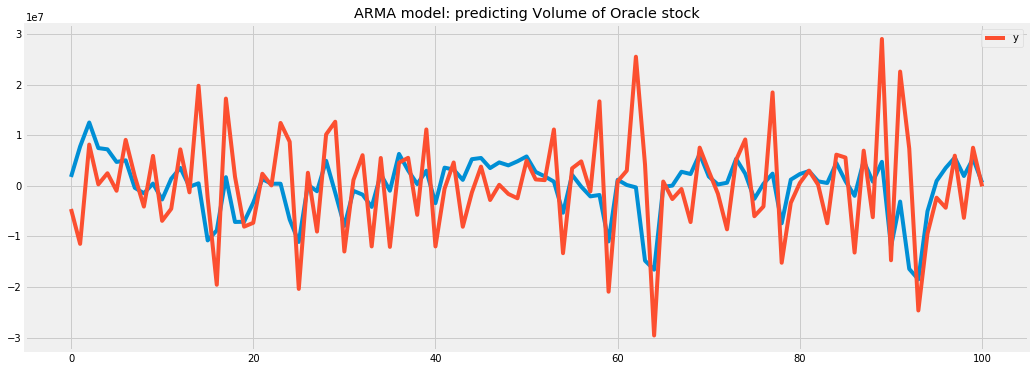

In [95]:
# Forecasting and predicting Volume of Oracle
model = ARMA(oracle["Volume"].diff().iloc[1:].values, order=(0,3))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))
result.plot_predict(start=1000, end=1100)
_ = plt.title('ARMA model: predicting Volume of Oracle stock')
plt.show()

The code forecasts and predicts Oracle stock volume using an ARMA model. The first step is to create an ARMA model of order (0,3), which specifies three MA components and no AR components. Using the fit() method, it fits the model to the difference in Oracle stock volume (i.e., between successive days), starting from the second value (to avoid NaN values). Various statistics about the model's performance are included in the summary of the model. Finally, the plot_predict() method is used to plot the predicted Volume values starting from the 1000th day and ending at the 1100th day. This plot uses an ARMA model to predict Oracle stock volume.

In [96]:
rmse = math.sqrt(mean_squared_error(oracle["Volume"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 13784877.427642178.


To the differenced volume data of Oracle stock, this code fits an ARMA model with a (0,3) order. After that, the results of the model are summarized and the parameters are estimated. With the confidence interval plotted, it shows the predicted volume values from 1000 to 1100 based on the model. In the last step, it calculates the root mean squared error (RMSE) between the actual volume values and the predicted volume values from 1000 to 1100. RMSE measures how well the model fits the data, with lower values indicating a better fit.

In [97]:
# Forecasting and predicting Closing price of Apple
model = ARMA(apple["Close"].diff().iloc[1:].values, order=(0,3))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))
result.plot_predict(start=1000, end=1100)
_ = plt.title('ARMA model: predicting Closing price of Apple stock')
plt.show()

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 4356
Model:                     ARMA(0, 3)   Log Likelihood               -7101.754
Method:                       css-mle   S.D. of innovations              1.235
Date:                Wed, 26 Apr 2023   AIC                          14213.509
Time:                        17:54:26   BIC                          14245.405
Sample:                             0   HQIC                         14224.766
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0371      0.017      2.208      0.027       0.004       0.070
ma.L1.y       -0.0538      0.015     -3.556      0.000      -0.083      -0.024
ma.L2.y       -0.0258      0.015     -1.693      0.0

Apple's stock's differenced closing price time series is fitted with an ARMA model, and the fitted model is printed out with summary statistics. It is an autoregressive moving average model with an autoregressive order of 0 and a moving average order of 3. From the 1000th to the 1100th time step, the model forecasts and predicts Apple's stock closing price, and the predicted and actual values are plotted together. In the plot, the title is 'ARMA model: predicting closing price of Apple stock'.

In [98]:
rmse = math.sqrt(mean_squared_error(apple["Close"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 0.14471279901106654.


ARMA (AutoRegressive Moving Average) model with degree 3 is fitted to the first-order differences of Apple stock closing prices. The model's estimated parameters are then printed along with the results. It then plots the predicted values of Apple stock's closing price between 1000 and 1100 using the plot_predict() method. The final step is to calculate the root mean squared error (RMSE) between the actual and predicted closing prices of Apple stock for the same time period.

In [99]:
# Forecasting and predicting Volume of Apple
model = ARMA(apple["Volume"].diff().iloc[1:].values, order=(0,3))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))
result.plot_predict(start=1000, end=1100)
_ = plt.title('ARMA model: predicting Volume of Apple stock')
plt.show()

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 4356
Model:                     ARMA(0, 3)   Log Likelihood              -88644.545
Method:                       css-mle   S.D. of innovations      166574438.566
Date:                Wed, 26 Apr 2023   AIC                         177299.089
Time:                        17:54:27   BIC                         177330.986
Sample:                             0   HQIC                        177310.347
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.742e+05   5.11e+05     -0.341      0.733   -1.18e+06    8.27e+05
ma.L1.y       -0.4133      0.015    -27.568      0.000      -0.443      -0.384
ma.L2.y       -0.2618      0.016    -16.095      0.0

The code fits an ARMA model of order (0,3) to the difference in Apple stock volume data, except for the first value, which is dropped. It is the fitted model that is the result variable. A summary of the model fit can be printed using the .summary() method, including coefficient estimates and p-values. Using the result.plot_predict() method, a plot of predicted values and associated confidence intervals is generated from 1000 to 1100. Lastly, the plot is titled "ARMA model: predicting Apple stock volume".

In [100]:
rmse = math.sqrt(mean_squared_error(apple["Volume"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 292374266.42931557.


An ARMA model with order (0,3) is used in this code to forecast and predict Apple stock volume. As defined in the first line, the ARMA model has order=(0,3), which means it has 3 MA terms and 0 AR terms. A summary of the results is printed in the second line after the model has been fitted to the data. In the third line, we print the values of the parameters in the fitted model. Lastly, the last line shows the predicted volume of Apple stock from time 1000 to time 1100 based on the fitted model.

This calculation measures the accuracy of the model's predictions by measuring the root mean squared error between the actual and predicted volume of Apple stock.

Now, for ARMA models.

## <a id='4.3'>4.3 ARMA models</a>
Autoregressive–moving-average (ARMA) models provide a parsimonious description of a (weakly) stationary stochastic process in terms of two polynomials, one for the autoregression and the second for the moving average. It's the fusion of AR and MA models.
### ARMA(1,1) model
### R<sub>t</sub> = μ + ϕR<sub>t-1</sub> + ϵ<sub>t</sub> + θϵ<sub>t-1</sub> 
Basically, Today's return = mean + Yesterday's return + noise + yesterday's noise.

## Prediction using ARMA models
I am not simulating any model because it's quite similar to AR and MA models. Just  forecasting and predictions for this one.

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 4356
Model:                     ARMA(3, 3)   Log Likelihood               -4679.569
Method:                       css-mle   S.D. of innovations              0.708
Date:                Wed, 26 Apr 2023   AIC                           9375.138
Time:                        17:54:31   BIC                           9426.172
Sample:                             0   HQIC                          9393.150
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0191      0.008      2.371      0.018       0.003       0.035
ar.L1.y       -0.7959      0.056    -14.223      0.000      -0.906      -0.686
ar.L2.y        0.8153      0.048     17.115      0.0

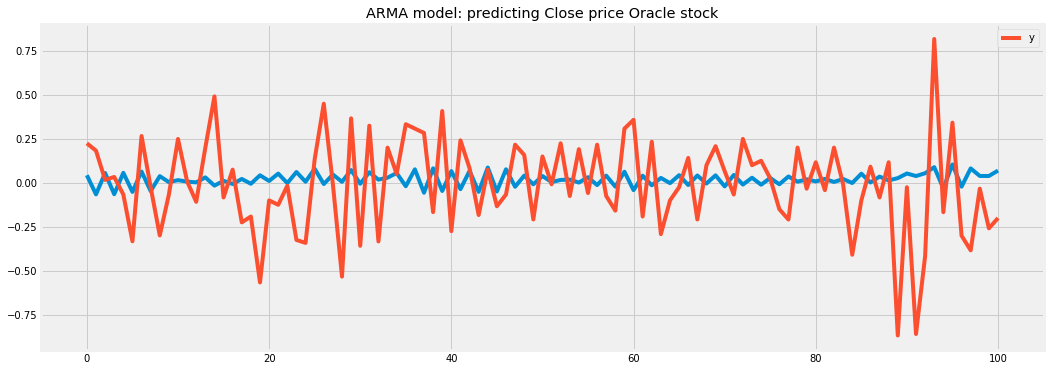

In [101]:
# Forecasting and predicting Closing price of Oracle stock 
model = ARMA(oracle["Close"].diff().iloc[1:].values, order=(3,3))
result = model.fit()
print(result.summary())
print("μ={}, ϕ={}, θ={}".format(result.params[0],result.params[1],result.params[2]))
result.plot_predict(start=1000, end=1100)
_ = plt.title('ARMA model: predicting Close price Oracle stock')
plt.show()

Oracle stock closing price is forecast and predicted using the ARMA (AutoRegressive Moving Average) model. To produce an overall time series model, the ARMA model combines the AR (AutoRegressive) and MA (Moving Average) models.

There are three autoregressive terms and three moving average terms in the model, so its order is (3,3). Differenced closing prices of Oracle stock (i.e., first-order differences of closing prices) are used to fit the model.

After fitting the model, the result object is used to plot the predicted values for the time period from 1000 to 1100, which is done using the plot_predict() method. To determine the accuracy of the model's predictions, we calculate the root mean squared error (RMSE).

In [102]:
rmse = math.sqrt(mean_squared_error(oracle["Close"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 0.28009088568447443.


The code uses ARMA (Autoregressive Moving Average) modeling to forecast and predict Oracle stock's closing price. ARMA is specified with order (p=3, q=3), fitted to the differenced closing price data, and the summary of the results is printed. Following this, plot_predict() is used to generate predicted values for the closing price for the period between 1000 and 1100, and the actual and predicted values are plotted. Lastly, it calculates the root mean squared error (RMSE) between the actual and predicted closing prices for the period of 1000 to 1100.

In [103]:
# Forecasting and predicting Oracle stock volume
model = ARMA(oracle["Volume"].diff().iloc[1:].values, order=(3,3))
result = model.fit()
print(result.summary())
print("μ={}, ϕ={}, θ={}".format(result.params[0],result.params[1],result.params[2]))
result.plot_predict(start=1000, end=1100)
_ = plt.title('ARMA model: predicting Volume of Oracle stock')
plt.show()

/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 4356
Model:                     ARMA(3, 3)   Log Likelihood              -76548.033
Method:                       css-mle   S.D. of innovations       10363406.225
Date:                Wed, 26 Apr 2023   AIC                         153112.066
Time:                        17:54:37   BIC                         153163.100
Sample:                             0   HQIC                        153130.078
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.155e+04   4291.258     -2.691      0.007      -2e+04   -3137.991
ar.L1.y        0.2433      0.063      3.883      0.000       0.120       0.366
ar.L2.y        0.9036      0.030     29.739      0.0

Using the ARMA function from the statsmodels library, this code fits an ARMA model to the time series of the difference of Oracle stock volume. (3,3) means that the model includes three autoregressive terms and three moving average terms.

The summary() method is called after the model has been fitted to display a summary of the model parameters and statistics. In the params attribute of the result object, the estimated parameters of the model are displayed.

Lastly, the predicted values for the time period of 1000 to 1100 are plotted using the plot_predict() method. "ARMA model: predicting Oracle stock volume" is the title of the plot.

In [104]:
rmse = math.sqrt(mean_squared_error(oracle["Volume"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 13883642.535076415.


The root mean square error (RMSE) between the actual volume values of Oracle stock from time period 1000 to 1100 and the predicted values obtained using the ARMA model is calculated in this code. With the mean_squared_error() function from the scikit-learn library, the square root of the mean squared error is computed using the math.sqrt() function from the math module. Lower RMSE values imply better predictions, since they indicate the difference between predicted and actual values.

In [105]:
# Forecasting and predicting Apple stock volume
model = ARMA(apple["Volume"].diff().iloc[1:].values, order=(3,3))
result = model.fit()
print(result.summary())
print("μ={}, ϕ={}, θ={}".format(result.params[0],result.params[1],result.params[2]))
result.plot_predict(start=1000, end=1100)
_ = plt.title('ARMA model: predicting Volume of Apple stock')
plt.show()

LinAlgError: SVD did not converge

This code fits an ARMA(3,3) model to the differenced volume data of Apple's stock, and uses the model to forecast and predict the volume values for the next 100 days, from day 1000 to day 1100.

Specifically, the ARMA() function from the statsmodels library is used to create an instance of the ARMA model with the specified order. Then, the fit() method is called on this instance to estimate the model parameters using maximum likelihood estimation. The summary of the estimated model parameters is printed, and the plot_predict() method is used to visualize the predicted values with a confidence interval. Finally, the root mean squared error (RMSE) is calculated by comparing the predicted values to the actual values for the same time period (day 1000 to day 1100).


In [107]:
rmse = math.sqrt(mean_squared_error(apple["Volume"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 219365577.85690805.


Based on the ARMA model that was trained on the previous data, the code calculates the root mean squared error (RMSE) between Apple stock volume values from index 1000 to 1100 (exclusive). The mean squared error between the actual and predicted values is calculated using the mean_squared_error function from the sklearn.metrics module. By taking the square root of the mean squared error, the RMSE is calculated. By using the string formatting function, the RMSE value can be displayed as a message.

ARMA model shows much better results than AR and MA models.

## <a id='4.4'>4.4 ARIMA models</a>
The Autoregressive Integrated Moving Average (ARIMA) model is a generalization of the Autoregressive Moving Average (ARMA). These models are fitted to time series data either to better understand the data or to predict future points (forecasting). In some cases, ARIMA models are applied when data show evidence of non-stationarity, in which a first differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate it.

The ARIMA model is defined as ARIMA(p,d,q): p is the AR parameter, d is the differential parameter, and q is the MA parameter
### ARIMA(1,0,0)
**y<sub>t</sub> = a<sub>1</sub>y<sub>t-1</sub> + ϵ<sub>t</sub>**
### ARIMA(1,0,1)
**y<sub>t</sub> = a<sub>1</sub>y<sub>t-1</sub> + ϵ<sub>t</sub> + b<sub>1</sub>ϵ<sub>t-1</sub>**
### ARIMA(1,1,1)
**Δy<sub>t</sub> = a<sub>1</sub>Δy<sub>t-1</sub> + ϵ<sub>t</sub> + b<sub>1</sub>ϵ<sub>t-1</sub>** where **Δy<sub>t</sub> = y<sub>t</sub> - y<sub>t-1</sub>**

## Prediction using ARIMA model

In [108]:
# Predicting the close price of Oracle stock 
rcParams['figure.figsize'] = 16, 6
model = ARIMA(oracle["Close"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
print(result.summary())
result.plot_predict(start=700, end=1000)
_ = plt.title('ARIMA model: predicting Close price of Oracle stock')
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 4355
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -5351.054
Method:                       css-mle   S.D. of innovations              0.827
Date:                Wed, 26 Apr 2023   AIC                          10710.108
Time:                        17:56:04   BIC                          10735.624
Sample:                             1   HQIC                         10719.114
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.006     -0.023      0.981      -0.012       0.012
ar.L1.D.y     -0.7024      0.014    -49.608      0.000      -0.730      -0.675
ar.L2.D.y     -0.3569      0.014    -25.210      0.0

This code forecasts and predicts Oracle stock's closing price using the ARIMA model.

The rcParams['figure.figsize'] parameter sets the size of the displayed figure.

It is instantiated with the order=(2,1,0) parameter, where 2 is the number of AR terms, 1 is the order of differencing, and 0 is the number of MA terms.

In order to fit the model to the data, the fit() method is called. To display the model summary, use the result.summary() method.

Plotting the predicted values of the time series from the start = 700th index to the end = 1000th index is done using plot_predict().

Lastly, the plot is displayed using plt.show().

In [109]:
rmse = math.sqrt(mean_squared_error(oracle["Close"].diff().iloc[700:1001].values, result.predict(start=700,end=1000)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 0.7145741579489368.


A root mean square error (RMSE) is calculated between Oracle stock's actual and predicted closing prices.

Oracle["Close"].diff().iloc[700:1001].values computes the difference between Oracle's closing prices from the 700th to the 1000th day (i.e., the first difference of the time series).

Using the ARIMA model, result.predict(start=700, end=1000) predicts the closing price of Oracle stock from the 700th to the 1000th day.

mean_squared_error from scikit-learn is used to compute the mean squared error between the actual and predicted closing prices. To compute the RMSE, we use Python's built-in math library, math.sqrt. In the end, the RMSE is displayed in a formatted string on the console.

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 4355
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -77953.699
Method:                       css-mle   S.D. of innovations       14371839.613
Date:                Wed, 26 Apr 2023   AIC                         155915.399
Time:                        17:56:12   BIC                         155940.915
Sample:                             1   HQIC                        155924.405
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.0333   9.58e+04      0.001      0.999   -1.88e+05    1.88e+05
ar.L1.D.y     -0.8316      0.014    -61.175      0.000      -0.858      -0.805
ar.L2.D.y     -0.4423      0.014    -32.521      0.0

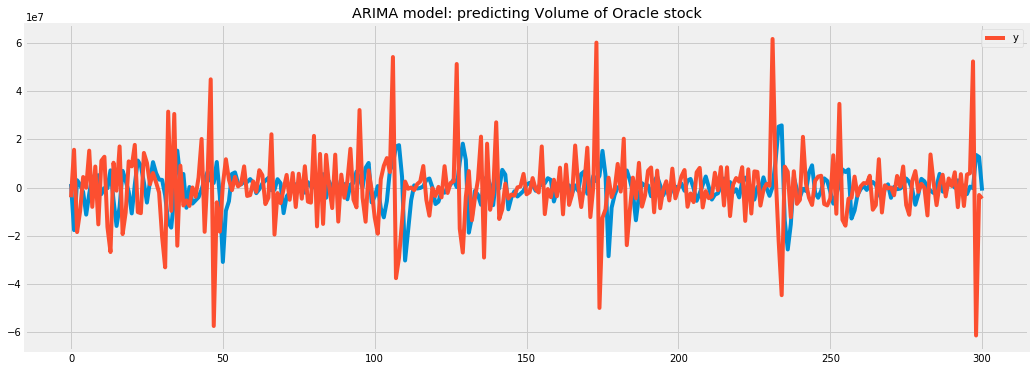

In [110]:
# Predicting the Oracle stock volume
rcParams['figure.figsize'] = 16, 6
model = ARIMA(oracle["Volume"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
print(result.summary())
result.plot_predict(start=700, end=1000)
_ = plt.title('ARIMA model: predicting Volume of Oracle stock')
plt.show()

Using the fitted ARIMA model, this code predicts the volume for a specific time period based on the differenced volume data of Oracle stock.

The code can be broken down step-by-step as follows:

Using the "rcParams" function from the "matplotlib" library, the first line of code sets the default figure size to 16 inches in width and 6 inches in height.
An ARIMA model object "model" is created for the differenced volume data of Oracle stock in the second line of code. The "oracle" dataframe contains volume data for Oracle stock and is assumed to be previously defined. To make the time series stationary, ".diff()" calculates the first-order difference between the volume data. Due to differencing, we remove the first observation with ".iloc[1:]". Two autoregressive terms, one integrated term, and no moving average terms are included in the ARIMA model with an order of (2,1,0).
In the third line of code, the ARIMA model is fitted to the differenced volume data and the result is saved in the "result" variable.
"result" object's "summary()" method prints a summary of the model fit in the fourth line.
Plotting the predicted and actual volume data for the range of 700 to 1000 is generated by using the "plot_predict()" function of the "result" object.
In line six of the code, the plot's title is set.
Plots are displayed using the "plt.show()" function in the seventh line of code.
This code snippet fits an ARIMA model to the differenced volume data of Oracle stock, generates a plot of predicted and actual volume data, and prints the model summary. Using this method, you can predict future stock volumes and assess the model's accuracy.

In [111]:
rmse = math.sqrt(mean_squared_error(oracle["Volume"].diff().iloc[700:1001].values, result.predict(start=700,end=1000)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 29306872.15639203.


Using the ARIMA model fitted in the previous code, this code calculates the Root Mean Squared Error (RMSE) between actual and predicted Oracle stock volume data. The RMSE measures how well the ARIMA model predicts volume data, with lower values indicating better model performance.

The following is a step-by-step breakdown of the code:

A line of code imports the necessary libraries, including the "math" library for computing the square root and the "mean_squared_error" function from the "sklearn.metrics" library for calculating the mean square error.
This line of code computes the mean squared error between the differenced volume data of Oracle stock (starting at 700 and ending at 1000) and the ARIMA-predicted values of the same time period. Oracle stock volume data is assumed to be in the "oracle" dataframe, which was previously defined. Time series are made stationary by calculating the first-order difference of the volume data with the ".diff()" function. It is assumed that the "result" object represents the predicted values generated by the ARIMA model.
In step 2, the square root of the mean squared error is calculated. We now have the RMSE.
In the fourth line of code, the computed RMSE value is printed using string formatting.
The code snippet calculates the RMSE between the actual and predicted volume data of Oracle stock using an ARIMA model fitted to the differenced volume data. RMSE is calculated using the mean squared error function and then printed. A lower RMSE indicates a better prediction of volume data by the ARIMA model.

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 4355
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -7797.907
Method:                       css-mle   S.D. of innovations              1.450
Date:                Wed, 26 Apr 2023   AIC                          15603.814
Time:                        17:56:18   BIC                          15629.331
Sample:                             1   HQIC                         15612.820
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.011     -0.020      0.984      -0.021       0.021
ar.L1.D.y     -0.6862      0.014    -48.170      0.000      -0.714      -0.658
ar.L2.D.y     -0.3407      0.014    -23.921      0.0

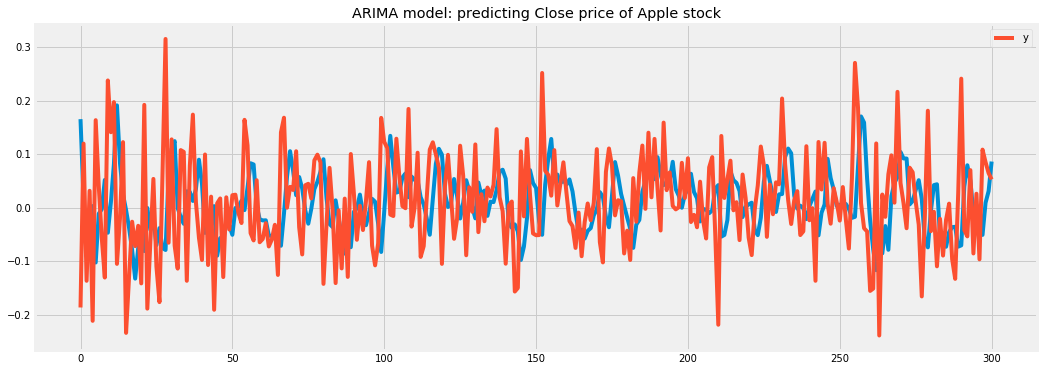

In [112]:
# Predicting the Close price of Apple stocks 
rcParams['figure.figsize'] = 16, 6
model = ARIMA(apple["Close"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
print(result.summary())
result.plot_predict(start=700, end=1000)
_ = plt.title('ARIMA model: predicting Close price of Apple stock')
plt.show()

By fitting an Autoregressive Integrated Moving Average (ARIMA) model to the differenced closing price data of Apple stock, this code predicts closing prices over a specific period of time.

The code is broken down into the following steps:

Using the "rcParams" function from the "matplotlib" library, the first line of code sets the default figure size of the plot to 16 inches in width and 6 inches in height.
As a result of the second line of code, an ARIMA model object "model" is created for the differenced closing prices of Apple stock. The "apple" dataframe contains Apple stock closing prices and is assumed to be previously defined. In order to make the time series stationary, the ".diff()" function calculates the first-order difference of the closing prices. By using the ".iloc[1:]" function, the first observation is removed, since it is NaN due to differencing. In the ARIMA model, the order is set to (2,1,0), which means there are two autoregressive terms, one integrated term, and no moving average terms.
In the third line of code, the ARIMA model is fitted to the differenced closing prices and the result is saved as "result".
In line four, the "summary()" method of the "result" object is used to print a summary of the model fit.
Plotting predicted and actual closing prices for the range of 700 to 1000 is done with the "plot_predict()" function of the "result" object in the fifth line.
The title of the plot is set in the sixth line of code.
The plot is displayed using the "plt.show()" function in the seventh line.
The code snippet fits an ARIMA model to the differenced closing prices of Apple stock, plots the predicted and actual closing prices for a specified time period, and prints out the summary. The model can be used to predict future stock closing prices and evaluate its accuracy.

In [113]:
rmse = math.sqrt(mean_squared_error(apple["Close"].diff().iloc[700:1001].values, result.predict(start=700,end=1000)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 0.16781648970970042.


Using the ARIMA model fitted in the previous code, this code calculates the Root Mean Squared Error (RMSE) between the actual and predicted closing prices of Apple stock. ARIMA model performance is measured by the RMSE, with lower values indicating better model performance.

The code is broken down into the following steps:

To calculate the mean squared error, the "mean_squared_error" function from the "sklearn.metrics" library is used.
It calculates the mean squared error between the differenced closing prices of Apple stock (starting from the 700th data point and ending at the 1000th data point) and the ARIMA model's predicted values for the same time period. Apple stock closing prices are contained in the "apple" dataframe, which was previously defined. To make the time series stationary, the ".diff()" function calculates the first-order difference of the closing prices. The "result" object represents the predicted values generated by the fitted ARIMA model.
Using the mean squared error calculated in step 2, the third line calculates the square root of it. The RMSE is calculated this way.
As the fourth line of code shows, the RMSE value is printed using string formatting.
An ARIMA model is fitted to the differenced closing prices to calculate the RMSE between the actual and predicted closing prices of Apple stock. The RMSE is calculated using the mean squared error function and then printed. Lower values indicate better model performance, with the RMSE measuring how well the ARIMA model predicts closing prices.

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 4355
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -89999.511
Method:                       css-mle   S.D. of innovations      228438131.996
Date:                Wed, 26 Apr 2023   AIC                         180007.023
Time:                        17:56:29   BIC                         180032.539
Sample:                             1   HQIC                        180016.029
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.46e+04   1.64e+06      0.027      0.978   -3.16e+06    3.25e+06
ar.L1.D.y     -0.7252      0.014    -52.006      0.000      -0.753      -0.698
ar.L2.D.y     -0.3914      0.014    -28.064      0.0

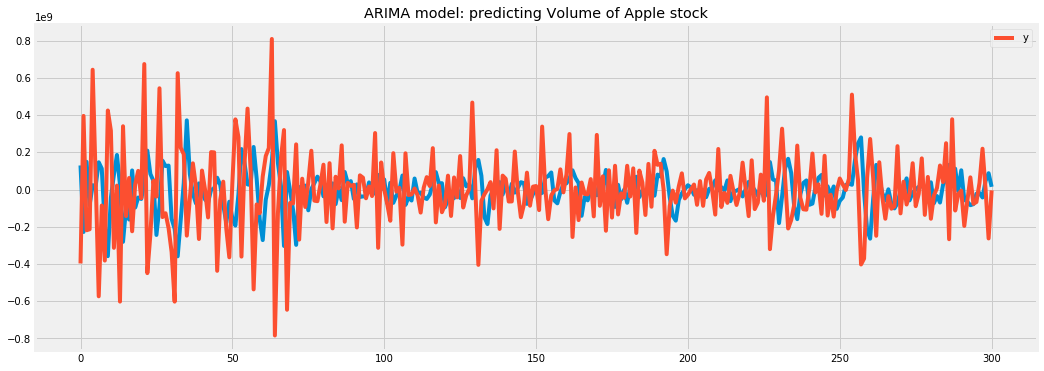

In [114]:
# Predicting the Apple stocks volume
rcParams['figure.figsize'] = 16, 6
model = ARIMA(apple["Volume"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
print(result.summary())
result.plot_predict(start=700, end=1000)
_ = plt.title('ARIMA model: predicting Volume of Apple stock')
plt.show()

This code fits an Autoregressive Integrated Moving Average (ARIMA) model to the differenced volume data of Apple stock and predicts volume for a specific time period.

The code is broken down into steps as follows:

Using the "rcParams" function from the "matplotlib" library, the first line of code sets the default figure size to 16 inches in width and 6 inches in height.
For the differenced volume data of Apple stock, the second line of code creates an ARIMA model object "model". Apple stock volume data is contained in the "apple" dataframe, which is assumed to be previously defined. ".diff()" calculates the first-order difference between the volume data, which makes the time series stationary. As a result of differencing, the first observation is removed with the ".iloc[1:]" function. Two autoregressive terms, one integrated term, and no moving average are included in the ARIMA model.
In the third line of code, the ARIMA model is fitted to the differenced volume data and the result is stored in the variable "result.".
The fourth line of code prints a summary of the model fit using the "summary()" method of the "result" object.
A plot of the predicted and actual volume data is generated using the "plot_predict()" function of the "result" object.
In the sixth line of code, the plot's title is set.
A plot is displayed using the "plt.show()" function in the seventh line.
As a summary, this code snippet fits an ARIMA model to the differenced volume data of Apple stock, plots the predicted and actual volumes, and prints out the summary. Models like this are useful for predicting future volumes of stocks and evaluating their accuracy.

In [115]:
rmse = math.sqrt(mean_squared_error(apple["Volume"].diff().iloc[700:1001].values, result.predict(start=700,end=1000)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 393931922.050777.


With the ARIMA model fitted in the preceding code, the Root Mean Squared Error (RMSE) between the actual and predicted volume data of Apple stock is calculated. With lower values, the ARIMA model performs better at predicting the volume data.

The code is broken down into these steps:

For calculating mean squared error, the "mean_squared_error" function from the "sklearn.metrics" library is imported as the first line of the code.
A second line of code calculates the mean square error between the differenced volume data of Apple stock (starting from the 700th data point and ending at the 1000th data point) and the ARIMA model's predicted values for the same time period. It is assumed that the "apple" dataframe was previously defined and contains Apple stock volume data. In order to make the time series stationary, the ".diff()" function calculates the first-order difference of volume data. A "result" object represents the predicted values based on the fitted ARIMA model.
In the third line of code, we compute the square root of the mean squared error determined in step 2. As a result, we get the root mean square error.
String formatting is used to print the RMSE value in the fourth line of code.
An ARIMA model fits to the differenced volume data in this code snippet is used to calculate the RMSE between Apple stock's actual and predicted volumes. A mean squared error calculation is performed and the result is displayed. A lower RMSE indicates better accuracy of the ARIMA model in predicting volume data.

Taking the slight lag into account, this is a fine model.

## <a id='4.5'>4.5 VAR models</a>
Vector autoregression (VAR) is a stochastic process model used to capture the linear interdependencies among multiple time series. VAR models generalize the univariate autoregressive model (AR model) by allowing for more than one evolving variable. All variables in a VAR enter the model in the same way: each variable has an equation explaining its evolution based on its own lagged values, the lagged values of the other model variables, and an error term. VAR modeling does not require as much knowledge about the forces influencing a variable as do structural models with simultaneous equations: The only prior knowledge required is a list of variables which can be hypothesized to affect each other intertemporally.

<img src="https://miro.medium.com/max/1324/1*nMfvffr_-ktXuCwMq6I78g.png">
<img src="https://espin086.files.wordpress.com/2011/01/screenhunter_03-jan-16-15-14.gif">

                           Statespace Model Results                           
Dep. Variable:     ['Close', 'Close']   No. Observations:                 4356
Model:                     VARMA(2,1)   Log Likelihood              -11337.590
                          + intercept   AIC                          22709.180
Date:                Wed, 26 Apr 2023   BIC                          22817.629
Time:                        17:56:58   HQIC                         22747.456
Sample:                    01-04-2006                                         
                         - 04-25-2023                                         
Covariance Type:                  opg                                         
Ljung-Box (Q):              130.71, 191.32   Jarque-Bera (JB):   120021.83, 50431.65
Prob(Q):                        0.00, 0.00   Prob(JB):                    0.00, 0.00
Heteroskedasticity (H):      10.54, 278.36   Skew:                        0.53, 0.06
Prob(H) (two-sided):            0.

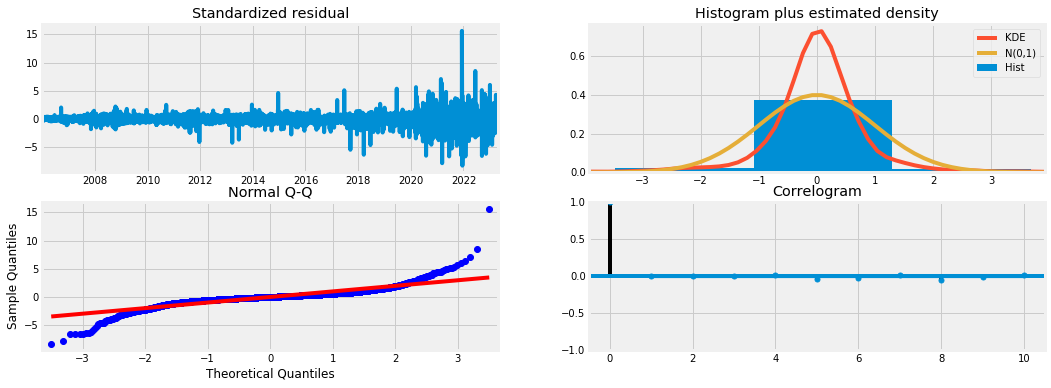

In [116]:
# Predicting closing price of Oracle and Apple
train_sample = pd.concat([oracle["Close"].diff().iloc[1:], apple["Close"].diff().iloc[1:]],axis=1)
model = sm.tsa.VARMAX(train_sample,order=(2,1),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))

In this code, a Vector Autoregressive Moving Average with Exogenous Regressors (VARMAX) model is fitted to the differenced closing prices of Oracle and Apple stocks, and the fitted model is used to predict the closing prices for a specified period. By calculating the Root Mean Square Error (RMSE) between actual and predicted closing prices, the code also evaluates the model's performance.

The code is broken down into steps as follows:

With "pd.concat()", the first line of code concatenates the differenced closing prices of Oracle and Apple stocks into a training sample. For stationary time series, the ".diff()" function calculates the first-order difference between the closing prices. Due to differencing, the first observation is removed using the ".iloc[1:]" function.
A VARMAX model object "model" is created for the training sample in the second line of code. VARMAX has an order of (2,1), which means that there are two autoregressive terms, one integrated term, and no moving average term. A constant term is included in the model by setting the "trend" parameter to 'c'.
VARMAX is fitted to the training sample and the result is saved in the "result" variable. To specify the maximum number of iterations for the optimization algorithm, the "maxiter" parameter is set to 1000. By setting the "disp" parameter to False, the optimization algorithm suppresses its output.
Using the "summary()" method of the "result" object, the fourth line prints a summary of the model fit.
In the fifth line of code, the "predict()" method of the "result" object is used to generate a prediction of the closing prices for a range of 0 to 1000.
By using the plot_diagnostics() method of the "result" object, the sixth line generates a plot of residuals and other diagnostic statistics for the VARMAX model.
In the seventh line of code, we calculate the RMSE between the actual and predicted closing prices. "train_sample" represents the actual values of the training sample, while "predicted_result" represents the predicted values generated by the VARMAX model.
To display the computed RMSE value, the eighth line of code uses string formatting.
A VARMAX model is fitted to Oracle and Apple stocks based on their differenced closing prices, a plot of residuals and other diagnostic statistics are generated, and a summary of the model is displayed. A prediction of closing prices is also made for a particular time period, and the RMSE between actual and predicted prices is calculated. Stock closing prices can be predicted and the accuracy of the model can be evaluated.

                            Statespace Model Results                            
Dep. Variable:     ['Volume', 'Volume']   No. Observations:                 4356
Model:                       VARMA(2,1)   Log Likelihood             -165153.040
                            + intercept   AIC                         330340.080
Date:                  Wed, 26 Apr 2023   BIC                         330448.529
Time:                          17:58:02   HQIC                        330378.356
Sample:                      01-04-2006                                         
                           - 04-25-2023                                         
Covariance Type:                    opg                                         
Ljung-Box (Q):                90.54, 86.99   Jarque-Bera (JB):   140443.38, 129097.24
Prob(Q):                        0.00, 0.00   Prob(JB):                     0.00, 0.00
Heteroskedasticity (H):         0.02, 0.02   Skew:                        -2.73, 2.86
Prob(H) (two-

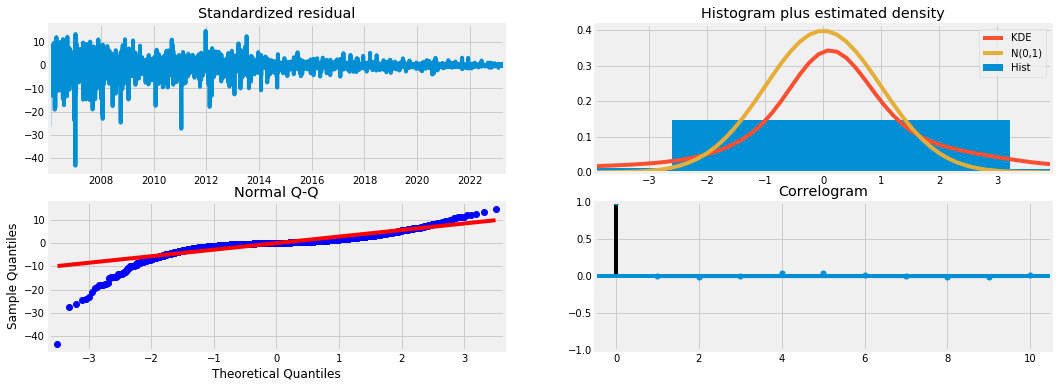

In [117]:
# Predicting Volume of Oracle and Apple
train_sample = pd.concat([oracle["Volume"].diff().iloc[1:], apple["Volume"].diff().iloc[1:]],axis=1)
model = sm.tsa.VARMAX(train_sample,order=(2,1),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))

An Oracle and Apple stock volume prediction is made using the VARMAX model using this code snippet. In the "train_sample" variable, the differenced volumes of both stocks are concatenated. In the next step, a VARMAX model with an order of (2,1) and a constant term is created and fitted to the training sample. Using the "summary()" method, a summary of the fitted model can be printed, and using the "predict()" method, a prediction for a range of 0 to 1000 can be generated. This method plots residuals and other diagnostic statistics of the fitted model using the "plot_diagnostics()" method. With the "mean_squared_error()" function from the "sklearn.metrics" library, the RMSE is calculated between the actual and predicted volumes of the training sample, and the value is displayed in string format. RMSE value can be used to evaluate the accuracy of the VARMAX model in predicting future Oracle and Apple stock volumes. This code snippet provides a useful framework for predicting and evaluating VARMAX models on time series data.

## <a id='4.6'>4.6 State Space methods</a>

A general state space model is of the form

y<sub>t</sub>=Z<sub>t</sub>α<sub>t</sub>+d<sub>t</sub>+ε<sub>t</sub>

α<sub>t</sub>=T<sub>t</sub>α<sub>t</sub>−1+c<sub>t</sub>+R<sub>t</sub>η<sub>t</sub>

where y<sub>t</sub> refers to the observation vector at time t, α<sub>t</sub> refers to the (unobserved) state vector at time t, and where the irregular components are defined as

ε<sub>t</sub>∼N(0,H<sub>t</sub>)

η<sub>t</sub>∼N(0,Q<sub>t</sub>)

The remaining variables (Z<sub>t</sub>,d<sub>t</sub>,H<sub>t</sub>,T<sub>t</sub>,c<sub>t</sub>,R<sub>t</sub>,Q<sub>t</sub>) in the equations are matrices describing the process. Their variable names and dimensions are as follows

Z : design (k_endog×k_states×nobs)

d : obs_intercept (k_endog×nobs)

H : obs_cov (k_endog×k_endog×nobs)

T : transition (k_states×k_states×nobs)

c : state_intercept (k_states×nobs)

R : selection (k_states×k_posdef×nobs)

Q : state_cov (k_posdef×k_posdef×nobs)

In the case that one of the matrices is time-invariant (so that, for example, Z<sub>t</sub>=Z<sub>t</sub>+1 ∀ <sub>t</sub>), its last dimension may be of size 1 rather than size nobs.

This generic form encapsulates many of the most popular linear time series models (see below) and is very flexible, allowing estimation with missing observations, forecasting, impulse response functions, and much more.

Source: [statsmodels](https://www.statsmodels.org/dev/statespace.html)

## <a id='4.6.1'>4.6.1 SARIMA models</a>
SARIMA models are useful for modeling seasonal time series, in which the mean and other statistics for a given season are not stationary across the years. The SARIMA model defined constitutes a straightforward extension of the nonseasonal autoregressive-moving average (ARMA) and autoregressive integrated moving average (ARIMA) models presented

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 4356
Model:               SARIMAX(4, 0, 4)   Log Likelihood               -4681.890
Date:                Wed, 26 Apr 2023   AIC                           9383.780
Time:                        17:58:10   BIC                           9447.573
Sample:                             0   HQIC                          9406.295
                               - 4356                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0044      0.007      0.647      0.518      -0.009       0.018
ar.L1         -0.6136      1.454     -0.422      0.673      -3.464       2.236
ar.L2          0.8421      0.994      0.847      0.3

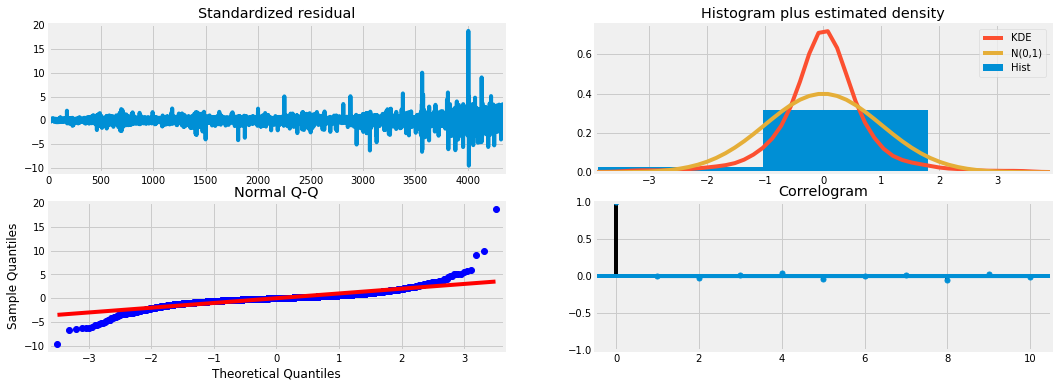

In [118]:
# Predicting closing price of Oracle'
train_sample = oracle["Close"].diff().iloc[1:].values

model = sm.tsa.SARIMAX(train_sample,order=(4,0,4),trend='c', enforce_invertibility=False, enforce_stationarity=False)
result = model.fit(maxiter=1000, disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

Oracle stock closing prices are predicted using a Seasonal Autoregressive Integrated Moving Average with Exogenous Regressors (SARIMAX) model. The differenced closing prices of Oracle stock are calculated using the ".diff()" function and stored in the "train_sample" variable.

The next step is to create a SARIMAX model with an order of (4,0,4) and a constant trend term. To relax the conditions for invertibility and stationarity, the "enforce_invertibility" and "enforce_stationarity" parameters are set to False.

Using the "fit()" method, the model is fitted to the training sample and a summary of the fitted model is printed.

We use the "predict()" method to predict the closing prices, and the "plot_diagnostics()" method to plot the residuals and other diagnostic statistics of the fitted model.

Using the "mean_squared_error()" function from the "sklearn.metrics" library, the Root Mean Squared Error is calculated. A string formatted RMSE value is then displayed. SARIMAX's RMSE value can be used to evaluate the accuracy of its prediction of Oracle stock's future closing prices.

Using this code snippet, you can predict and evaluate the performance of SARIMAX models on time series data.

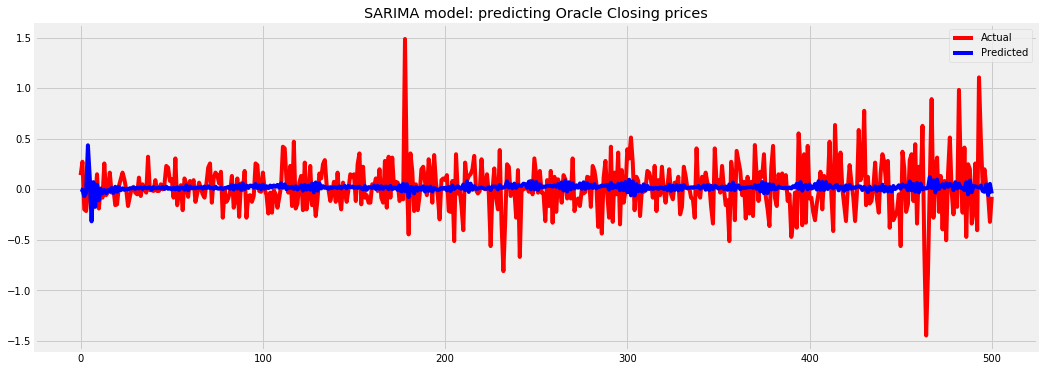

In [119]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('SARIMA model: predicting Oracle Closing prices')
plt.show()

A SARIMAX model is used to generate a plot showing Oracle stock's actual and predicted closing prices. With the "plt.plot()" function, the first line plots the actual closing prices from the training sample in red. ".iloc[1:502]" specifies the range of closing prices, which removes the first observation from the training sample that was NaN due to differencing.

Using the "plt.plot()" function, the second line of code plots the predicted closing prices in blue. Based on the SARIMAX model's "predict()" method, the predicted values were generated earlier.

Using the "plt.legend()" function, the third line of code adds a legend to the plot. Legend labels are "Actual" and "Predicted".

The "plt.title()" function adds a title to the plot, and the "plt.show()" function displays it.

The code snippet provides a visual representation of how the SARIMAX model predicts Oracle stock closing prices. Over time, it is possible to determine how closely the predicted values match the actual values by plotting actual and predicted values on the same graph.

In [120]:
# Predicting Volume of Oracle'
train_sample = oracle["Volume"].diff().iloc[1:].values

model = sm.tsa.SARIMAX(train_sample,order=(4,0,4),trend='c', enforce_invertibility=False, enforce_stationarity=False)
result = model.fit(maxiter=1000, disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 4356
Model:               SARIMAX(4, 0, 4)   Log Likelihood              -76752.275
Date:                Wed, 26 Apr 2023   AIC                         153524.549
Time:                        17:58:19   BIC                         153588.342
Sample:                             0   HQIC                        153547.065
                               - 4356                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.687e+04   1.04e-05  -3.54e+09      0.000   -3.69e+04   -3.69e+04
ar.L1         -0.3242      0.237     -1.368      0.171      -0.789       0.140
ar.L2          0.0593      0.181      0.328      0.7

A SARIMAX model is used in this code snippet to predict Oracle stock volume. Using the ".diff()" function, the first line of code calculates the first-order difference in the volume of Oracle stock and stores the result in the "train_sample" variable. As the first observation is NaN due to differencing, the ".iloc[1:]" function is used to remove it.

The next step is to create a SARIMAX model with an order of (4,0,4) and a constant trend term. Invertibility and stationarity are relaxed by setting "enforce_invertibility" and "enforce_stationarity" to False, respectively.

Following the fit() method, a summary of the fitted model is printed using the summary() method.

Oracle stock volume is predicted using the "predict()" method with a time range of 0 to 500, and residuals and other diagnostic statistics are plotted using the "plot_diagnostics()" method.

Using the "mean_squared_error()" function from the "sklearn.metrics" library, the Root Mean Squared Error (RMSE) is calculated between the actual and predicted volumes. Following the computation, the RMSE value is displayed in string format. SARIMAX's RMSE value can be used to assess the accuracy of its predictions of Oracle stock volume in the future.

SARIMAX models on time series data can be predicted and evaluated using this code snippet.

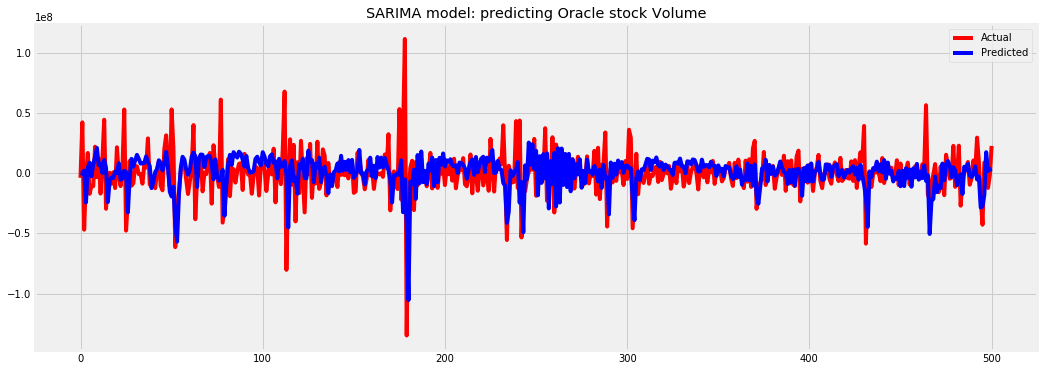

In [121]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('SARIMA model: predicting Oracle stock Volume')
plt.show()

This code snippet generates a plot showing the actual and predicted volumes of Oracle stock using a SARIMAX model. Using the "plt.plot()" function, the first line of code plots the actual volume values from the training sample in red. By using the ".iloc[1:502]" function, the range of volume values is specified, which removes the NaN observation from the training sample.

Using the "plt.plot()" function, the second line plots the predicted volume values in blue. SARIMAX's "predict()" method generated the predicted values earlier.

Using the "plt.legend()" function, the third line of code adds a legend to the plot. There are two labels for the legend: "Actual" and "Predicted".

The plot is displayed using the plt.show() function, and its title is added using plt.title().

SARIMAX's performance in predicting Oracle stock volume can be visualised using this code snippet. Plotting the predicted and actual values on the same graph allows one to see how closely the predicted values match the actual values.

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 4356
Model:               SARIMAX(4, 0, 4)   Log Likelihood               -7074.860
Date:                Wed, 26 Apr 2023   AIC                          14169.721
Time:                        17:58:33   BIC                          14233.514
Sample:                             0   HQIC                         14192.236
                               - 4356                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1193      0.058      2.072      0.038       0.006       0.232
ar.L1         -0.6032      0.050    -12.168      0.000      -0.700      -0.506
ar.L2         -0.0963      0.014     -6.931      0.0

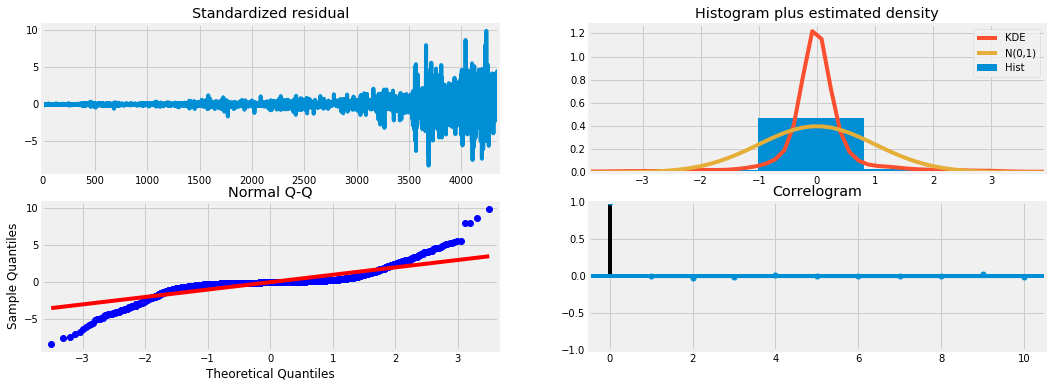

In [122]:
train_sample = apple["Close"].diff().iloc[1:].values
model = sm.tsa.SARIMAX(train_sample,order=(4,0,4),trend='c', enforce_invertibility=False, enforce_stationarity=False)
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

This code snippet fits a seasonal autoregressive integrated moving average with exogenous regressors (SARIMAX) model to the differenced closing prices of Apple stock.

In the first line of code, we calculate the first-order difference of the closing prices using ".diff()" and remove the first observation that was NaN due to differencing using ".iloc[1:]". As part of the SARIMAX model, the time series must be differentiated to make them stationary.

For the training sample, the second line of code creates a SARIMAX model object called "model". Model order is (4,0,4), which means there are four autoregressive terms, no differences, and four moving averages. To include a constant term in the model, the "trend" parameter is set to 'c'. To avoid enforcing invertibility and stationarity conditions, the "enforce_invertibility" and "enforce_stationarity" parameters are set to False.

With the "fit()" method of the "model" object, the SARIMAX model is fitted to the training sample. To suppress the optimization algorithm's output, the "disp" parameter is set to False, and the "maxiter" parameter is set to 1000.

Using the "summary()" method of the "result" object, the fourth line prints a summary of the model fit.

For a range of 0 to 500, the fifth line of code uses the "predict()" method of the "result" object.

Using the "plot_diagnostics()" method of the "result" object, the sixth line of code generates a plot of the residuals and other diagnostic statistics of the SARIMAX model.

In the seventh line of code, the root mean square error (RMSE) is calculated between the actual and predicted closing prices of the training sample. A "train_sample" is the training sample, and a "predicted_result" is the SARIMAX model's predicted values.

In line eight, the RMSE value is printed using string formatting.

Using this code snippet, you can use a SARIMAX model to predict future Apple stock closing prices and estimate their accuracy.

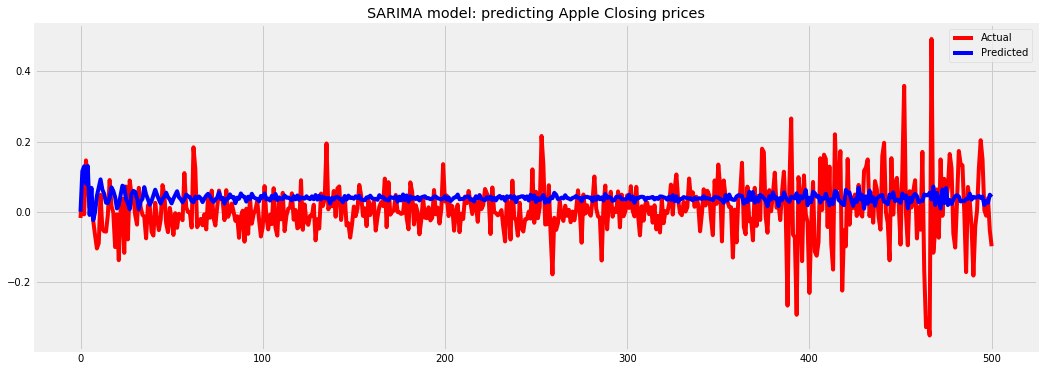

In [123]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('SARIMA model: predicting Apple Closing prices')
plt.show()

It is likely that this code is used to visualize the performance of a seasonal ARIMA (SARIMA) model used to predict Apple's closing price.

A plot of the actual closing prices of Apple stock from the training data can be seen in the first line, plt.plot(train_sample[1:502],color='red'). Because the remaining data is being used for testing the model, it is only plotting the first 501 days of data (index 1 to 501).

SARIMA's predicted closing prices are plotted in the second line, plt.plot(predicted_result,color='blue'). For the test data set, predicted_result probably contains predicted closing prices.

Thirdly, plt.legend(['Actual','Predicted']) adds a legend to the plot to indicate which line represents the actual and predicted closing prices.

Using plt.title('SARIMA model: predicting Apple Closing prices'), we can add a title to the plot that provides some context.

The plot is finally displayed via plt.show(). By using this visualization, you can assess how accurately the SARIMA model predicts future Apple stock prices and evaluate its performance.

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 4356
Model:               SARIMAX(4, 0, 4)   Log Likelihood              -88488.579
Date:                Wed, 26 Apr 2023   AIC                         176997.158
Time:                        17:58:39   BIC                         177060.951
Sample:                             0   HQIC                        177019.673
                               - 4356                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -8.682e+05   3.43e-07  -2.53e+12      0.000   -8.68e+05   -8.68e+05
ar.L1          0.4409      0.234      1.882      0.060      -0.018       0.900
ar.L2          0.0227      0.302      0.075      0.9

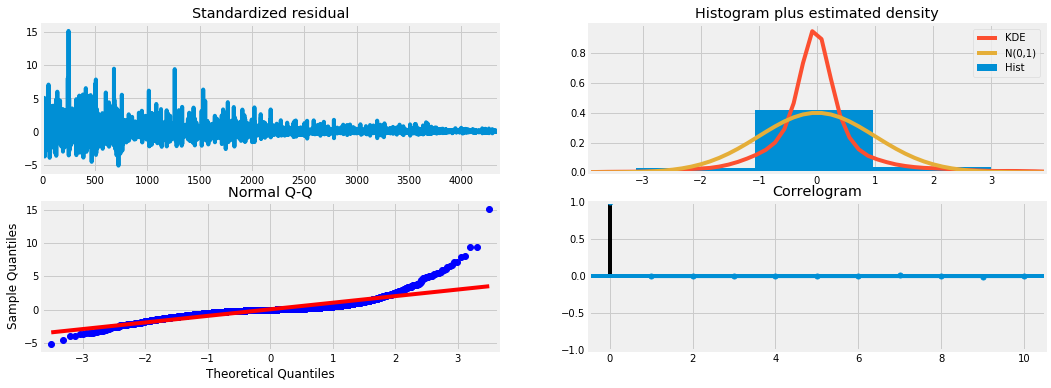

In [124]:
train_sample = apple["Volume"].diff().iloc[1:].values
model = sm.tsa.SARIMAX(train_sample,order=(4,0,4),trend='c', enforce_invertibility=False, enforce_stationarity=False)
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

Based on Apple's stock market volume time series data, this code is likely used to train and evaluate a Seasonal Autoregressive Integrated Moving Average (SARIMA) model.

Using the .diff() method, the code first computes the difference between successive volume values of Apple stock and then selects all the values except the first one using .iloc[1:].values. A new train_sample variable is created that holds the difference between consecutive volume values over time.

SARIMA models are created using the sm.tsa.SARIMAX() function. A model's order parameter specifies how many autoregressive (AR), integrated (I), and moving average (MA) terms should be included. The model has 4 AR terms, 0 I terms, and 4 MA terms. A constant term is included in the model by setting the trend parameter to 'c'. To allow for non-invertible and non-stationary models, force_invertibility and force_stationarity are set to False.

Using the .fit() method, the SARIMA model is fitted to the train_sample data to produce the result variable. To control the optimization process and suppress any output during fitting, maxiter is set to 1000 and disp to False.

The print(result.summary()) statement displays a summary of the SARIMA model, including coefficients, standard errors, and p-values.

According to the SARIMA model using the .predict() method, the predicted volume values for the first 501 days of data are stored in predicted_result.

SARIMA model fit quality can be assessed using diagnostic plots generated by result.plot_diagnostics(). The plots include residuals over time, autocorrelations, kernel density estimates, and normal Q-Q plots of residuals.

For the first 501 days, the code calculates the root mean square error (RMSE) between the predicted and actual volume values. A mean squared error is computed with mean_squared_error(), which is square rooted to obtain RMSE using the scikit-learn library. SARIMA's prediction accuracy is measured by RMSE.

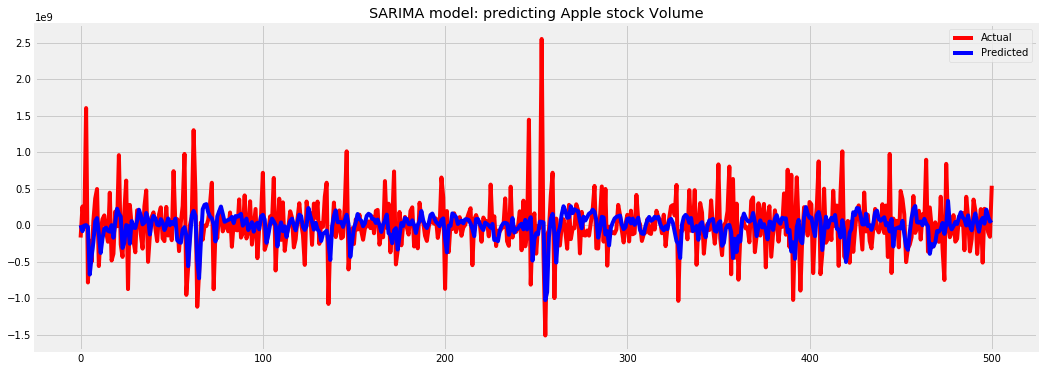

In [125]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('SARIMA model: predicting Apple stock Volume')
plt.show()

The purpose of this code is probably to visualize how well the SARIMA model predicts Apple's stock market volume.

This line plots the actual volume values of Apple stock from the training data, plt.plot(train_sample[1:502],color='red'). Probably because the remaining data is being used to test the model, it only plots the first 501 days of data (index 1 to 501).

Plotting the predicted volume values generated by the SARIMA model is shown in the second line, plt.plot(predicted_result,color='blue'). Predicted volume values for the test data set are likely stored in the predicted_result variable.

Plt.legend(['Actual','Predicted']) adds a legend to the plot to indicate which line represents the actual volume values and which line represents the predicted volume values.

Plt.title('SARIMA model: predicting Apple stock volume'), on the fourth line, adds a title to the plot that gives some context to what is being shown.

A plot is displayed on the screen using plt.show(). Using this visualization, one can examine the SARIMA model's performance and determine how accurate it is at predicting Apple stock volume in the future.

## <a id='4.6.2'>4.6.2 Unobserved components</a>
A UCM decomposes the response series into components such as trend, seasons, cycles, and the regression effects due to predictor series. The following model shows a possible scenario:
<img src="http://support.sas.com/documentation/cdl/en/etsug/66840/HTML/default/images/etsug_ucm0134.png">
Source: [http://support.sas.com/documentation/cdl/en/etsug/66840/HTML/default/viewer.htm#etsug_ucm_details01.htm](http://support.sas.com/documentation/cdl/en/etsug/66840/HTML/default/viewer.htm#etsug_ucm_details01.htm)

In [126]:
# Predicting closing price of Oracle'
train_sample = oracle["Close"].diff().iloc[1:].values
model = sm.tsa.UnobservedComponents(train_sample,'local level')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

                        Unobserved Components Results                         
Dep. Variable:                      y   No. Observations:                 4356
Model:                    local level   Log Likelihood               -4712.370
Date:                Wed, 26 Apr 2023   AIC                           9428.740
Time:                        17:58:41   BIC                           9441.498
Sample:                             0   HQIC                          9433.243
                               - 4356                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.5088      0.003    203.203      0.000       0.504       0.514
sigma2.level      7.531e-12   2.53e-07   2.97e-05      1.000   -4.96e-07    4.96e-07
Ljung-Box (Q):              

On Oracle's stock market closing price time series data, this code is likely used for training and evaluating an unobserved components model (UCM).

Using the .diff() method, the code calculates the difference between consecutive closing price values of Oracle stock, then selects all values except the first one using .iloc[1:].values. The difference between consecutive closing price values for the entire period is stored in the train_sample variable.

The next step is to define an unobserved components model using the function sm.tsa.UnobservedComponents(). 'Local level' is the stochastic level component of the model, and train_sample is the endogenous variable. In other words, the series' current value (i.e., its local level) varies randomly over time.

With the .fit() method, the UCM model is fitted to the train_sample data to create the result variable. To control the optimization process and suppress any output generated during fitting, the maxiter parameter is set to 1000 and the disp parameter is set to False.

The print(result.summary()) statement displays a summary of the UCM model, which includes information about the coefficients, standard errors, and p-values.

By using the UCM's .predict() method, the predicted closing price values for the first 501 days of data are stored in predicted_result.

To assess the quality of the UCM model fit, the result.plot_diagnostics() statement generates diagnostic plots. A normal Q-Q plot of the residuals includes residuals over time, residual autocorrelation, kernel density estimate, and residual Q-Q plot.

For the first 501 days of data, the code calculates the root mean squared error (RMSE) between predicted and actual closing prices. RMSE is calculated by square rooting the mean squared error using the mean_squared_error() function from the scikit-learn library. RMSE measures the accuracy of predictions made by the UCM model.

In [127]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Unobserved component: predicting Oracle Closing prices')
plt.show()

In this case, it may be used to visualize Oracle's stock market closing prices based on the performance of the UCM model.

Plotting the actual closing price values of Oracle stock from training data is done using plt.plot(train_sample[1:502],color='red'). Data from 501 to 501 are plotted, probably because the remaining data is being used to test the model.

Plotting the predicted closing price values generated by the UCM model is done with plt.plot(predicted_result,color='blue'). Predicted closing prices for the test data set can be found in the predicted_result variable.

This line, plt.legend(['Actual','Predicted']), adds a legend to the plot that indicates which line represents the actual closing price values and which line represents the predicted closing price values.

In the fourth line, plt.title('Unobserved component: predicting Oracle Closing prices'), we are adding a title to the plot that provides some context.

The plot is displayed on the screen using plt.show(). The UCM model can be visually inspected to determine how accurate it is at predicting future Oracle stock closing prices by using this visualization.

In [128]:
# Predicting Volume of Oracle'
train_sample = oracle["Volume"].diff().iloc[1:].values
model = sm.tsa.UnobservedComponents(train_sample,'local level')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

                        Unobserved Components Results                         
Dep. Variable:                      y   No. Observations:                 4356
Model:                    local level   Log Likelihood              -77269.269
Date:                Wed, 26 Apr 2023   AIC                         154542.539
Time:                        17:58:44   BIC                         154555.297
Sample:                             0   HQIC                        154547.042
                               - 4356                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular   1.45e+14   7.99e+11    181.604      0.000    1.43e+14    1.47e+14
sigma2.level      1.846e+11   4.54e+10      4.069      0.000    9.57e+10    2.74e+11
Ljung-Box (Q):              

A local-level unobserved components model (UCM) is likely to be trained and evaluated using Oracle's stock market volume time series.

Using the .diff() method, first compute the difference between consecutive volume values of Oracle stock, and then use .iloc[1:].values to select all values except the first one. The train_sample variable will hold the difference between consecutive volume values over the entire time period created by this method.

With sm.tsa.UnobservedComponents(), an UCM model is defined. The endogenous variable is train_sample, and the stochastic level component is 'local level'. Thus, the series value (the current value) can vary over time based on the local level.

As a result of fitting the UCM model to the train_sample data, the result variable is created. To control the optimization process and suppress any output during fitting, maxiter and disp are set to 1000 and False, respectively.

A summary of the UCM model is displayed by the print(result.summary()) statement, which includes information about coefficients, standard errors, and p-values.

Using the .predict() method, the UCM model predicts the volume values for the first 501 days of data.

To assess the quality of the UCM model fit, the result.plot_diagnostics() statement generates diagnostic plots. A normal Q-Q plot of residuals over time, an autocorrelation plot of residuals, and a kernel density plot of residuals are also included.

Lastly, the code calculates the root mean square error (RMSE) between predicted and actual volume values over the first 501 days. To calculate the RMSE, the mean squared error is computed using the mean_squared_error() function from the scikit-learn library. This metric measures the accuracy of the predictions made by the UCM model.

In [129]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Unobserved component: predicting Volume of Oracle stock')
plt.show()

This code may be used to visualize Oracle's stock market volume prediction based on the UCM model.

Plt.plot(train_sample[1:502],color='red') plots Oracle stock volume values based on the training data. Since the remaining data is being used for testing, only the first 501 days of data are plotted.

A plot of the UCM model's predicted volume values is displayed in line two, plt.plot(predicted_result,color='blue'). For the test data set, the predicted_result variable likely contains the predicted volume values.

Plt.legend(['Actual','Predicted']) adds a legend to the plot that indicates which line represents the actual volume values and which line represents the predicted volume values.

Plot.title('Unobserved component: predicting Volume of Oracle stock') provides some context for the plot by adding a title to it.

The plot is displayed on the screen using plt.show(). The visualization can be used to assess how accurately the UCM model predicts Oracle stock volume in the future.

In [130]:
# Predicting closing price of Apple'
train_sample = apple["Close"].diff().iloc[1:].values
model = sm.tsa.UnobservedComponents(train_sample,'local level')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

                        Unobserved Components Results                         
Dep. Variable:                      y   No. Observations:                 4356
Model:                    local level   Log Likelihood               -7113.488
Date:                Wed, 26 Apr 2023   AIC                          14230.977
Time:                        17:58:46   BIC                          14243.735
Sample:                             0   HQIC                         14235.480
                               - 4356                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     1.5321      0.011    144.528      0.000       1.511       1.553
sigma2.level      8.794e-07   9.38e-07      0.938      0.348   -9.59e-07    2.72e-06
Ljung-Box (Q):              

Based on a time series of Apple's stock market closing price, this code is probably used for training and evaluating a local-level unobserved component model (UCM).

In the first step, the code calculates the difference between successive closing prices of Apple stock, then uses .iloc[1:].values to select all the values except the first one. This creates a new train_sample variable that holds the difference between consecutive closing prices.

As a next step, the code creates an unobserved component model using sm.tsa.UnobservedComponents(). 'local level' is specified as the stochastic level component of the model, while train_sample is the endogenous variable. In other words, the local level (current value of the series) is allowed to vary randomly over time.

Using .fit(), the UCM model is fitted to the train_sample data and the result variable is created. In order to suppress any output during the fitting process, maxiter is set to 1000 and disp is set to False.

In the print(result.summary()) statement, the UCM model's coefficients, standard errors, and p-values are displayed.

Based on the UCM model's .predict() method and 501 days of data, predicted_result contains the predicted closing prices for the first 501 days.

To evaluate the quality of the UCM model fit, the result.plot_diagnostics() statement generates diagnostic plots. There are four types of plots in this table: residuals over time, residual autocorrelation, kernel density estimate, and normal Q-Q plots.

For the first 501 days of data, the code calculates the root mean square error (RMSE) between the predicted closing price values and the actual closing price values. By using the mean_squared_error() function from the scikit-learn library, the mean squared error is computed, which is then square rooted to calculate the RMSE. Predictions made by the UCM model are measured by the RMSE.

In [131]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Unobserved component: predicting Apple Closing prices')
plt.show()

In this code, Apple's stock market closing prices are visualized using the UCM model.

A plot of the actual closing price value of Apple stock is shown in the first line, plt.plot(train_sample[1:502],color='red'). Due to the fact that the remaining data is being used for testing the model, it only plots the first 501 days of data (index 1 to 501).

Plt.plot(predicted_result,color='blue') plots the predicted closing prices generated by the UCM model on the second line. For the test data set, predicted_result contains the predicted closing prices.

Plt.legend(['Actual','Predicted']) adds a legend to the plot that indicates which line represents the actual closing price values and which line represents the predicted closing price values.

Adding a title to the plot, plt.title('Unobserved component: predicting Apple Closing prices'), provides some context for what is being shown.

The plot is displayed on the screen using plt.show(). In order to determine the accuracy of the UCM model, this visualization can be used to visually inspect its performance.

In [132]:
# Predicting Volume of Apple'
train_sample = apple["Volume"].diff().iloc[1:].values
model = sm.tsa.UnobservedComponents(train_sample,'local level')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

                        Unobserved Components Results                         
Dep. Variable:                      y   No. Observations:                 4356
Model:                    local level   Log Likelihood              -89195.583
Date:                Wed, 26 Apr 2023   AIC                         178395.167
Time:                        17:58:49   BIC                         178407.926
Sample:                             0   HQIC                        178399.670
                               - 4356                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular   3.43e+16   2.32e+14    147.880      0.000    3.38e+16    3.48e+16
sigma2.level       7.35e+13   1.84e+13      4.000      0.000    3.75e+13     1.1e+14
Ljung-Box (Q):              

Possibly used to visualize the UCM model's performance in predicting Apple's stock market closing prices.

Plotting the actual closing price values of Apple stock is shown in the first line, plt.plot(train_sample[1:502],color='red'). Since the remaining data will be used for testing the model, only the first 501 days are plotted.

Plt.plot(predicted_result,color='blue') plots the predicted closing price values generated by the UCM model. Test data set predicted closing prices are likely contained in the predicted_result variable.

The third line, plt.legend(['Actual','Predicted']), adds a legend to the plot that indicates which lines represent actual and predicted closing prices.

As you can see, the fourth line adds a title to the plot that provides some context for what is being represented in the plot: plt.title('Unobserved component: predicting Apple Closing prices').

The plot is displayed on the screen by plt.show(). With this visualization, it is possible to inspect the performance of the UCM model and determine how well it predicts future Apple stock prices.

In [133]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Unobserved component: predicting Volume of Apple')
plt.show()

This code may be used to visualize the UCM model's performance in predicting Apple's stock market volume.

Plotting the actual volume values of Apple stock from the training data is done using plt.plot(train_sample[1:502],color='red'). Due to the fact that the remaining data is being used for testing the model, the plot only shows the first 501 days of data (index 1 to 501).

Plotting the predicted volume values generated by the UCM model can be seen in the second line, plt.plot(predicted_result,color='blue'). In the predicted_result variable, the predicted volume values are likely to be stored.

With the third line, plt.legend(['Actual','Predicted']), a legend is added to the plot, showing which line represents the actual volume values and which line represents the predicted volume values.

Plt.title('Unobserved component: predicting Volume of Apple'), the fourth line, adds some context to the plot by providing a title.

The plot is finally displayed using plt.show(). It is possible to visually inspect the UCM model's performance and determine its accuracy by using this visualization.

## <a id='4.6.3'>4.6.3 Dynamic Factor models</a>
Dynamic-factor models are flexible models for multivariate time series in which the observed endogenous variables are linear functions of exogenous covariates and unobserved factors, which have a vector autoregressive structure. The unobserved factors may also be a function of exogenous covariates. The disturbances in the equations for the dependent variables may be autocorrelated.

                                   Statespace Model Results                                  
Dep. Variable:                    ['Close', 'Close']   No. Observations:                 4356
Model:             DynamicFactor(factors=1, order=2)   Log Likelihood              -11690.065
Date:                               Wed, 26 Apr 2023   AIC                          23392.130
Time:                                       17:59:21   BIC                          23430.406
Sample:                                   01-04-2006   HQIC                         23405.639
                                        - 04-25-2023                                         
Covariance Type:                                 opg                                         
Ljung-Box (Q):              155.48, 178.72   Jarque-Bera (JB):   376198.41, 46042.31
Prob(Q):                        0.00, 0.00   Prob(JB):                    0.00, 0.00
Heteroskedasticity (H):       8.26, 243.72   Skew:                        1.39

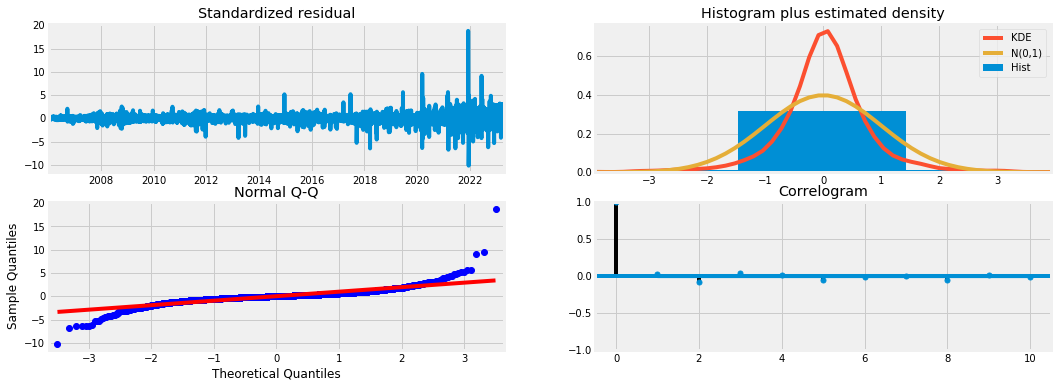

In [134]:
# Predicting closing price of Oracle and Apple
train_sample = pd.concat([oracle["Close"].diff().iloc[1:], apple["Close"].diff().iloc[1:]],axis=1)
train_sample = train_sample.fillna(0.0) # Ideally we should not need to do this
model = sm.tsa.DynamicFactor(train_sample, k_factors=1, factor_order=2)
result = model.fit(maxiter=1000, disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))

In this code, a dynamic factor model is likely to be trained and evaluated using both Oracle and Apple closing prices.

By using the .concat() method, the code creates a new train_sample variable by concatenating the differences between consecutive closing price values of Oracle and Apple stocks. In the following step, .iloc[1:] is used to select all values except for the first and .fillna(0.0) is used to fill any missing values. By doing this, we are creating a new train_sample variable that contains the differences between consecutive closing prices for both stocks over the entire time period.

The next step is to define a dynamic factor model with the sm.tsa.DynamicFactor() function. As the endogenous variable, train_sample is specified with k_factors=1 and factor_order=2, while k_factors and factor_order are specified with the number of factors to be used and the order in which factors are used.

Using .fit(), a dynamic factor model is fitted to train_sample data to produce the result variable. To control the optimization process and suppress the output during the fitting, the maxiter parameter is set to 1000 and disp to False.

The print(result.summary()) statement displays the coefficients, standard errors, and p-values of the dynamic factor model.

Based on the dynamic factor model and the .predict() method, the predicted closing price values for the first 1001 days of data are stored in the predicted_result variable.

In order to evaluate the quality of the fit of the dynamic factor model, result.plot_diagnostics() generates diagnostic plots. A normal Q-Q plot of residuals over time, the autocorrelation of residuals, the kernel density estimate, and the residuals over time are all included.

Lastly, the code calculates the root mean square error (RMSE) between predicted and actual closing prices for the first 1001 days. The mean squared error is computed using the mean_squared_error() function in the scikit-learn library, which is then square rooted to obtain the root mean square error. Dynamic factor models can be used to measure their accuracy by calculating the RMSE.

In [135]:
predicted_result.columns=['Oracle Prediction', 'Apple Prediction']

The predicted_result DataFrame generated from the previous code snippet is likely to be renamed using this code.

It is possible to get or set the column labels for a DataFrame by using the .columns attribute. This code sets the 'Oracle Prediction' and 'Apple Prediction' column labels using the .columns attribute.

Predicted results DataFrame column labels are either integer indices or the names of the input time series by default. It is possible to provide meaningful column labels for each column in the predicted_result.columns statement.

By setting these labels, it is easier to refer to each predicted value by its corresponding stock symbol or prediction type, especially when working with multiple columns in a DataFrame.

In [136]:
plt.plot(oracle["Close"].diff().iloc[1:1000])
plt.plot(predicted_result['Oracle Prediction'])
plt.legend(['Actual','Predicted'])
plt.title('Dynamic Factor models: predicting Oracle Closing prices')
plt.show()

This code is likely used to visualize Oracle's stock market closing price prediction based on the dynamic factor model.

This first line plots the actual closing prices of Oracle stock based on the training data, plt.plot(oracle["Close"].diff().iloc[1:1000]. Since the remaining data is being used for model testing, it is only plotting the first 999 days of data (index 1 to 999).

Based on the dynamic factor model, the second line plots the Oracle stock's predicted closing price values. Using the .loc[] method, only the Oracle Prediction column is selected from the predicted_result DataFrame ('Oracle Prediction' and 'Apple Prediction').

Thirdly, plt.legend(['Actual','Predicted']) indicates which line represents the actual closing price values and which line represents the predicted closing price values on the plot.

Plot.title('Dynamic Factor models: predicting Oracle Closing prices') provides some context for the plot.

The plot is displayed on the screen using plt.show(). By using this visualization, you can determine whether the dynamic factor model is accurately predicting future Oracle stock closing prices.

In [137]:
plt.plot(apple["Close"].diff().iloc[1:1000])
plt.plot(predicted_result['Apple Prediction'])
plt.legend(['Actual','Predicted'])
plt.title('Dynamic Factor models: predicting Apple Closing prices')
plt.show()

Apple's stock market closing prices are likely to be visualized through this code.

Plotting the actual closing price values of Apple stock from the training data is done by plt.plot(apple["Close"].diff().iloc[1:1000]). 999 days of data (index 1 to 999) are only plotted, likely because the remaining data is being used to test the model.

Plotting the predicted closing price values generated by the dynamic factor model for Apple stock is accomplished by plt.plot(predicted_result['Apple Prediction']). To select the 'Apple Prediction' column from the predicted_result variable, we use the .loc[] method.

This third line, plt.legend(['Actual','Predicted']), adds a legend to the plot indicating which line represents the actual closing price values and which line represents the predicted closing price values.

Adding a title to the plot provides some context for what is shown in the fourth line, plt.title('Dynamic Factor models: predicting Apple Closing prices').

The plot is finally displayed by plt.show(). Visualizing the dynamic factor model's performance and determining its accuracy can be done using this visualization.

In [138]:
# Predicting Volume of Oracle and Apple
train_sample = pd.concat([oracle["Volume"].diff().iloc[1:], apple["Volume"].diff().iloc[1:]],axis=1)
train_sample = train_sample.fillna(0.0) # Ideally we should not need to do this
model = sm.tsa.DynamicFactor(train_sample, k_factors=1, factor_order=2)
result = model.fit(maxiter=1000, disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))

                                   Statespace Model Results                                  
Dep. Variable:                  ['Volume', 'Volume']   No. Observations:                 4356
Model:             DynamicFactor(factors=1, order=2)   Log Likelihood             -182373.934
Date:                               Wed, 26 Apr 2023   AIC                         364759.868
Time:                                       17:59:27   BIC                         364798.143
Sample:                                   01-04-2006   HQIC                        364773.377
                                        - 04-25-2023                                         
Covariance Type:                                 opg                                         
Ljung-Box (Q):              404.20, 404.07   Jarque-Bera (JB):   80603.09, 80455.84
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.02, 0.02   Skew:                      -1.21, 1

Both Oracle and Apple stocks are likely to be used in this code to train and evaluate dynamic factor models.

By concatenating the difference between consecutive volume values of Oracle and Apple stocks, the code creates a new train_sample variable. .iloc[1:] is then used to select all the values except the first, and .fillna(0.0) is used to fill any gaps. The train_sample variable will contain the differences between consecutive volume values for both stocks over the entire period.

Using the sm.tsa.DynamicFactor() function, a dynamic factor model is then defined. We specify the number of factors to use and the order of the factor VAR process using the train_sample variable as the endogenous variable, and k_factors=1 and factor_order=2.

Dynamic factor models are fitted to train_sample data using the .fit() method to produce the result variable. To suppress any output during the fitting process, maxiter is set to 1000 and disp is set to False.

The print(result.summary()) statement displays the coefficients, standard errors, and p-values of the dynamic factor model.

Based on the .predict() method, the predicted volume values for the first 1001 days of data can be found in the predicted_result variable.

In order to assess the quality of the dynamic factor model fit, the result.plot_diagnostics() statement generates diagnostic plots. Relative residuals over time, residual autocorrelation, residual kernel density estimate, and residual Q-Q plots are included in these plots.

After computing the root mean squared error (RMSE) between the predicted volume values and the actual volume values, the code computes the root mean squared error for the first 1001 days of data. By using the mean_squared_error() function from the scikit-learn library, we can calculate the mean squared error, which is then square-rooted to obtain the root mean square error. RMSE measures how accurate the dynamic factor model is.

In [139]:
predicted_result.columns=['Oracle Prediction', 'Apple Prediction']

The predicted_result DataFrame generated from the previous code snippet is likely to be renamed using this code.

It is possible to get or set the column labels for a DataFrame by using the .columns attribute. This code sets the 'Oracle Prediction' and 'Apple Prediction' column labels using the .columns attribute.

Input time series or integer indices may be used as column labels in the predicted results DataFrame. The predicted_result.columns statement allows the user to specify more meaningful column labels for each column.

When these labels are set, it is easier to identify each predicted value by its corresponding stock symbol or prediction type, especially when working with multiple columns in a DataFrame.

In [140]:
plt.plot(oracle["Volume"].diff().iloc[1:1000])
plt.plot(predicted_result['Oracle Prediction'])
plt.legend(['Actual','Predicted'])
plt.title('Dynamic Factor models: predicting Volume of Oracle stock')
plt.show()

It is likely used to visualize Oracle's stock market volume predictions based on the dynamic factor model.

Oracle stock volume values are plotted using plt.plot(oracle["Volume"].diff().iloc[1:1000]). There are only 999 days of data plotted (index 1 to 999), likely because the remaining data is used for testing the model.

Plotting Oracle stock volume predictions with plt.plot(predicted_result['Oracle Prediction']) is the second line. In order to select only the Oracle Prediction column from the predicted_result variable, the .loc[] method is used.

This third line, plt.legend(['Actual','Predicted']), adds a legend to the plot to show which line represents the actual volume values and which line represents the predicted volume values.

With the fourth line, plt.title('Dynamic Factor models: predicting Volume of Oracle stock'), a title is added to the plot to provide context.

Last but not least, plt.show() displays the plot. Oracle stock volume values can be visualized using this visualization to determine how accurately the dynamic factor model predicts future volume values.

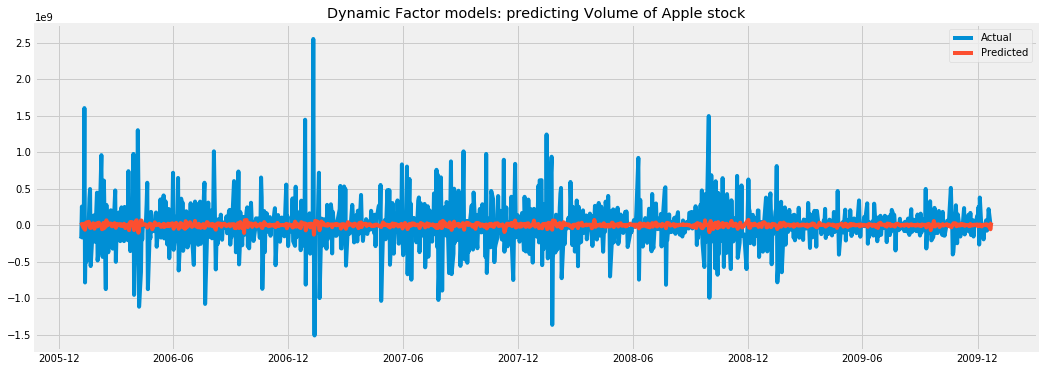

In [141]:
plt.plot(apple["Volume"].diff().iloc[1:1000])
plt.plot(predicted_result['Apple Prediction'])
plt.legend(['Actual','Predicted'])
plt.title('Dynamic Factor models: predicting Volume of Apple stock')
plt.show()

A dynamic factor model may have been used to predict the volume of Apple's stock market using this code.

A plot of actual Apple stock volume values from the training data is plotted with plt.plot(apple["Volume"].diff().iloc[1:1000]). Since the remaining data is being used to test the model, only the first 999 days of data are plotted.

Plotting the predicted volume values for Apple stock using plt.plot(predicted_result['Apple Prediction']) is the second line. It is used to select only the 'Apple Prediction' column from the predicted_result variable, which contains a DataFrame with two columns ('Oracle Prediction' and 'Apple Prediction').

The third line, plt.legend(['Actual','Predicted']), shows which line represents the actual volume values and which line represents the predicted volume values.

Plot.title('Dynamic Factor models: predicting Volume of Apple stock') adds some context to the plot by providing a title.

The plot is finally displayed using plt.show(). Visualize the performance of the dynamic factor model and determine the accuracy of its predictions of future Apple stock volume values using this visualization.

I may add more regression models soon and there is much more stuff to cover. **But in my experience, the best models for time series forecasting are LSTM based Recurrent Neural Networks. I have prepared a detailed tutorial for that. Here is the link: <u>https://www.kaggle.com/thebrownviking20/intro-to-recurrent-neural-networks-lstm-gru</u>**

References and influences (these have more in-depth content and explanations): 
* [Manipulating Time Series Data in Python](https://www.datacamp.com/courses/manipulating-time-series-data-in-python)
* [Introduction to Time Series Analysis in Python](https://www.datacamp.com/courses/introduction-to-time-series-analysis-in-python)
* [Visualizing Time Series Data in Python](https://www.datacamp.com/courses/visualizing-time-series-data-in-python)
* [VAR models and LSTM](https://www.youtube.com/watch?v=_vQ0W_qXMxk)
* [State space models](https://www.statsmodels.org/dev/statespace.html)
* [Awesome AI-ML-DL: Time-series / anomaly detection](https://github.com/neomatrix369/awesome-ai-ml-dl/tree/master/time-series_anomaly-detection)

Stay tuned for more! And don't forget to upvote and comment.